#  Time Series Analysis of Country-wise COVID-19 Prediction using ML


    
 

In [40]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

Import the data (we have to update this on a daily basis)

In [41]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-15-2020.csv')


In [42]:
confirmed_df.head(200)

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
0              NaN    Afghanistan  33.939110   67.709953        0        0   
1              NaN        Albania  41.153300   20.168300        0        0   
2              NaN        Algeria  28.033900    1.659600        0        0   
3              NaN        Andorra  42.506300    1.521800        0        0   
4              NaN         Angola -11.202700   17.873900        0        0   
..             ...            ...        ...         ...      ...      ...   
195   Sint Maarten    Netherlands  18.042500  -63.054800        0        0   
196            NaN    Netherlands  52.132600    5.291300        0        0   
197            NaN    New Zealand -40.900600  174.886000        0        0   
198            NaN      Nicaragua  12.865416  -85.207229        0        0   
199            NaN          Niger  17.607789    8.081666        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   5/8/21   5/9/21  5/10/21  \
0          0        0        0        0  ...    61755    61842    62063   
1          0        0        0        0  ...   131666   131723   131753   
2          0        0        0        0  ...   123900   124104   124288   
3          0        0        0        0  ...    13406    13423    13429   
4          0        0        0        0  ...    28477    28740    28875   
..       ...      ...      ...      ...  ...      ...      ...      ...   
195        0        0        0        0  ...     2260     2260     2263   
196        0        0        0        0  ...  1553469  1560022  1565880   
197        0        0        0        0  ...     2642     2644     2644   
198        0        0        0        0  ...     6989     6989     6989   
199        0        0        0        0  ...     5313     5319     5322   

     5/11/21  5/12/21  5/13/21  5/14/21  5/15/21  5/16/21  5/17/21  
0      62403    62718    63045    63355    63412    63484    63598  
1     131803   131845   131890   131939   131978   132015   132032  
2     124483   124682   124889   125059   125194   125311   125485  
3      13447    13470    13470    13510    13510    13510    13555  
4      29146    29405    29695    30030    30354    30637    30787  
..       ...      ...      ...      ...      ...      ...      ...  
195     2268     2272     2272     2277     2282     2282     2292  
196  1571398  1577754  1583767  1589282  1593728  1598164  1600993  
197     2643     2644     2645     2645     2646     2651     2653  
198     7086     7086     7086     7086     7086     7086     7086  
199     5324     5325     5326     5326     5330     5333     5339  

[200 rows x 486 columns]

In [43]:
latest_data.head(200)

FIPS Admin2 Province_State     Country_Region          Last_Update  \
0     NaN    NaN            NaN        Afghanistan  2020-12-16 05:28:04   
1     NaN    NaN            NaN            Albania  2020-12-16 05:28:04   
2     NaN    NaN            NaN            Algeria  2020-12-16 05:28:04   
3     NaN    NaN            NaN            Andorra  2020-12-16 05:28:04   
4     NaN    NaN            NaN             Angola  2020-12-16 05:28:04   
..    ...    ...            ...                ...                  ...   
195   NaN    NaN            NaN              Egypt  2020-12-16 05:28:04   
196   NaN    NaN            NaN        El Salvador  2020-12-16 05:28:04   
197   NaN    NaN            NaN  Equatorial Guinea  2020-12-16 05:28:04   
198   NaN    NaN            NaN            Eritrea  2020-12-16 05:28:04   
199   NaN    NaN            NaN            Estonia  2020-12-16 05:28:04   

           Lat      Long_  Confirmed  Deaths  Recovered   Active  \
0    33.939110  67.709953      48952    1995      38336   8621.0   
1    41.153300  20.168300      50000    1028      25876  23096.0   
2    28.033900   1.659600      93065    2623      61307  29135.0   
3    42.506300   1.521800       7382      79       6706    597.0   
4   -11.202700  17.873900      16362     372       8990   7000.0   
..         ...        ...        ...     ...        ...      ...   
195  26.820553  30.802498     122609    6966     105450  10193.0   
196  13.794200 -88.896500      42132    1212      38260   2660.0   
197   1.650800  10.267900       5195      85       5061     49.0   
198  15.179400  39.782300        711       0        564    147.0   
199  58.595300  25.013600      18682     157      11669   6856.0   

          Combined_Key  Incident_Rate  Case_Fatality_Ratio  
0          Afghanistan     125.749001             4.075421  
1              Albania    1737.438321             2.056000  
2              Algeria     212.229844             2.818460  
3              Andorra    9554.131884             1.070171  
4               Angola      49.783565             2.273561  
..                 ...            ...                  ...  
195              Egypt     119.812103             5.681475  
196        El Salvador     649.563589             2.876673  
197  Equatorial Guinea     370.281935             1.636189  
198            Eritrea      20.048347             0.000000  
199            Estonia    1408.326480             0.840381  

[200 rows x 14 columns]

In [44]:
cols = confirmed_df.keys()


Get all the dates of the covid-19 pandemic 

In [45]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [46]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

Getting daily increases and moving averages

In [47]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


# recoveries
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)


# active 
world_active_avg = moving_average(total_active, window)

In [48]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

Future forcasting

In [49]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

Convert integer into datetime for better visualization

In [50]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [51]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.05, shuffle=False) 

Model for predicting # of confirmed cases. I am using support vector machine, bayesian ridge , and linear regression in this example. We will show the results in the later section. 

In [52]:
# # use this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly', degree=3)
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [53]:
# svm_search.best_params_

In [54]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 30318426.7099905
MSE: 925750031103806.4


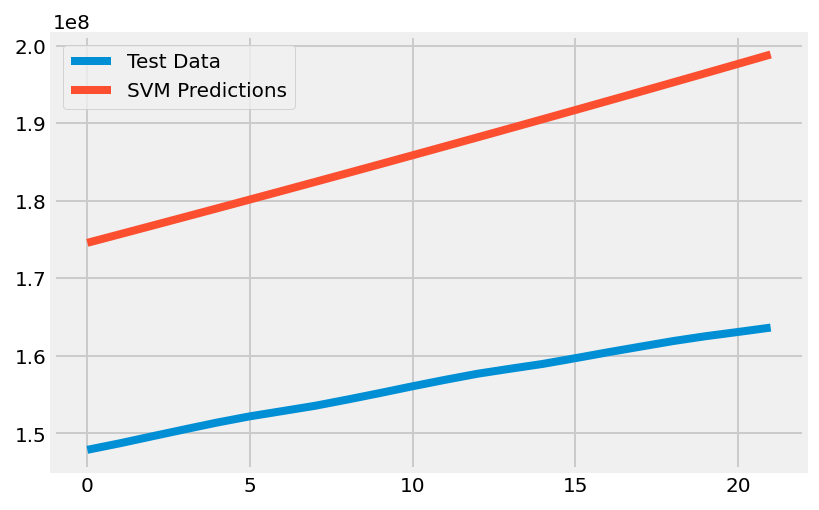

In [55]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [56]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [57]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 12123759.639175145
MSE: 157704996190049.0


In [58]:
print(linear_model.coef_)

[[-1.34745261e+07  3.66560576e+05 -3.10796885e+03  1.32106461e+01
  -1.43394255e-02]]


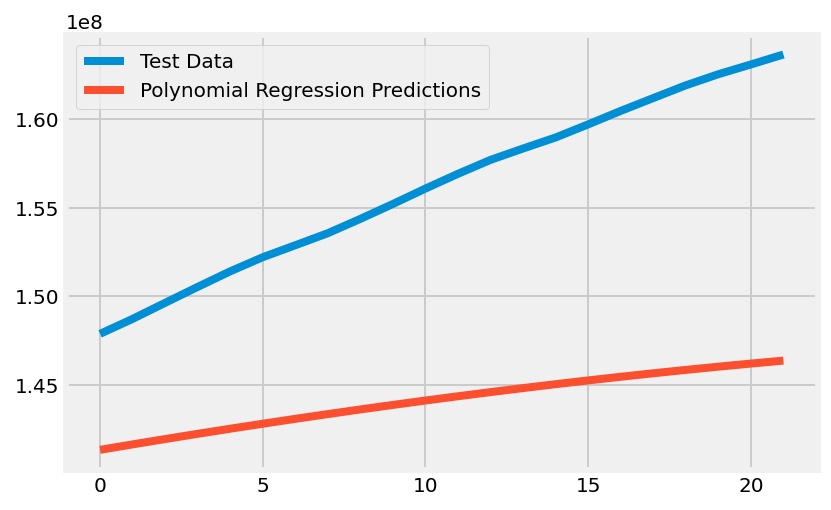

In [59]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [60]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.2s finished


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [61]:
bayesian_search.best_params_

{'tol': 0.001,
 'normalize': False,
 'lambda_2': 1e-05,
 'lambda_1': 0.001,
 'alpha_2': 0.001,
 'alpha_1': 0.0001}

In [62]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 10858706.820137203
MSE: 126881048791553.27


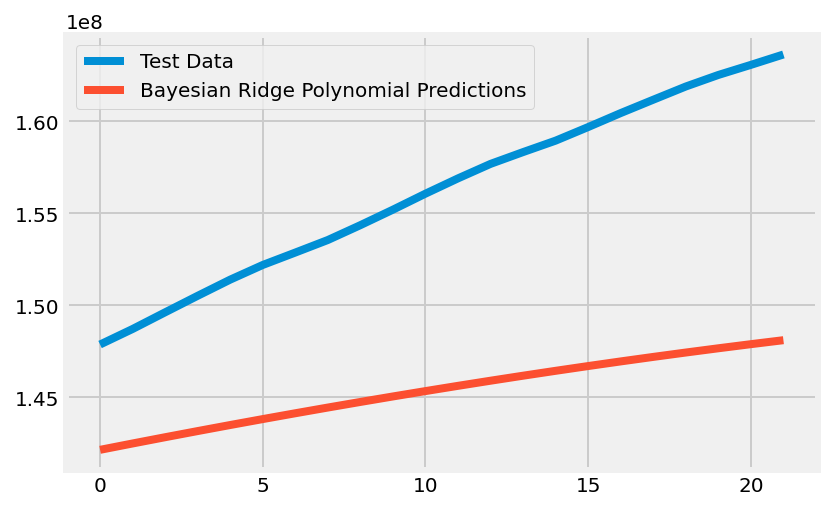

In [63]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [64]:
time = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
time1 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
time2 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
time3 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-15-2020.csv')


In [65]:
time.head(500)

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
270            NaN             Vietnam  14.058324  108.277199        0   
271            NaN  West Bank and Gaza  31.952200   35.233200        0   
272            NaN               Yemen  15.552727   48.516388        0   
273            NaN              Zambia -13.133897   27.849332        0   
274            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/8/21  5/9/21  \
0          0        0        0        0        0  ...   61755   61842   
1          0        0        0        0        0  ...  131666  131723   
2          0        0        0        0        0  ...  123900  124104   
3          0        0        0        0        0  ...   13406   13423   
4          0        0        0        0        0  ...   28477   28740   
..       ...      ...      ...      ...      ...  ...     ...     ...   
270        2        2        2        2        2  ...    3245    3412   
271        0        0        0        0        0  ...  301437  301751   
272        0        0        0        0        0  ...    6462    6482   
273        0        0        0        0        0  ...   92057   92092   
274        0        0        0        0        0  ...   38414   38419   

     5/10/21  5/11/21  5/12/21  5/13/21  5/14/21  5/15/21  5/16/21  5/17/21  
0      62063    62403    62718    63045    63355    63412    63484    63598  
1     131753   131803   131845   131890   131939   131978   132015   132032  
2     124288   124483   124682   124889   125059   125194   125311   125485  
3      13429    13447    13470    13470    13510    13510    13510    13555  
4      28875    29146    29405    29695    30030    30354    30637    30787  
..       ...      ...      ...      ...      ...      ...      ...      ...  
270     3489     3571     3658     3740     3816     4112     4212     4359  
271   302249   302777   303270   303270   303270   303658   303827   304074  
272     6485     6492     6498     6507     6523     6538     6543     6568  
273    92112    92152    92211    92262    92356    92409    92436    92460  
274    38433    38448    38466    38491    38535    38554    38560    38572  

[275 rows x 486 columns]

In [66]:
time1.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/8/21  5/9/21  5/10/21  5/11/21  \
0        0        0        0        0  ...    2683    2686     2698     2710   
1        0        0        0        0  ...    2411    2412     2416     2420   
2        0        0        0        0  ...    3321    3328     3335     3343   
3        0        0        0        0  ...     127     127      127      127   
4        0        0        0        0  ...     630     633      636      639   

   5/12/21  5/13/21  5/14/21  5/15/21  5/16/21  5/17/21  
0     2713     2721     2730     2733     2742     2745  
1     2423     2426     2427     2429     2432     2435  
2     3350     3355     3360     3366     3374     3381  
3      127      127      127      127      127      127  
4      645      649      651      655      659      677  

[5 rows x 486 columns]

In [67]:
time2.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/8/21  5/9/21  5/10/21  5/11/21  \
0        0        0        0        0  ...   54040   54222    54382    54503   
1        0        0        0        0  ...  116126  117089   118041   119061   
2        0        0        0        0  ...   86280   86420    86554    86703   
3        0        0        0        0  ...   12962   12995    13021    13070   
4        0        0        0        0  ...   24713   24717    24772    25145   

   5/12/21  5/13/21  5/14/21  5/15/21  5/16/21  5/17/21  
0    54534    54619    54634    54663    54686    55010  
1   120072   121122   122105   123081   124312   125419  
2    86857    87003    87137    87251    87359    87476  
3    13104    13104    13155    13155    13155    13211  
4    25187    25629    25650    25703    25715    25995  

[5 rows x 486 columns]

In [68]:
time3.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2020-12-16 05:28:04  33.93911   
1   NaN    NaN            NaN        Albania  2020-12-16 05:28:04  41.15330   
2   NaN    NaN            NaN        Algeria  2020-12-16 05:28:04  28.03390   
3   NaN    NaN            NaN        Andorra  2020-12-16 05:28:04  42.50630   
4   NaN    NaN            NaN         Angola  2020-12-16 05:28:04 -11.20270   

       Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
0  67.709953      48952    1995      38336   8621.0  Afghanistan   
1  20.168300      50000    1028      25876  23096.0      Albania   
2   1.659600      93065    2623      61307  29135.0      Algeria   
3   1.521800       7382      79       6706    597.0      Andorra   
4  17.873900      16362     372       8990   7000.0       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     125.749001             4.075421  
1    1737.438321             2.056000  
2     212.229844             2.818460  
3    9554.131884             1.070171  
4      49.783565             2.273561

In [69]:
time = time[time['Country/Region']=='India']

In [70]:
time = time.tail()

In [71]:
time.head()

Province/State Country/Region        Lat      Long  1/22/20  1/23/20  \
147            NaN          India  20.593684  78.96288        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...    5/8/21    5/9/21   5/10/21  \
147        0        0        0        0  ...  22296081  22662575  22992517   

      5/11/21   5/12/21   5/13/21   5/14/21   5/15/21   5/16/21   5/17/21  
147  23340938  23703665  24046809  24372907  24684077  24965463  25228996  

[1 rows x 486 columns]

# Worldwide Overview 
Here we are Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate (CFR), and recovery rate worldwide. This gives us a big picture of the ongoing covid-19 pandemic. 
 <a id='world_wide_graphs'></a>

In [72]:
# helper method for flattening the data, so it can be displayed on a bar graph 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

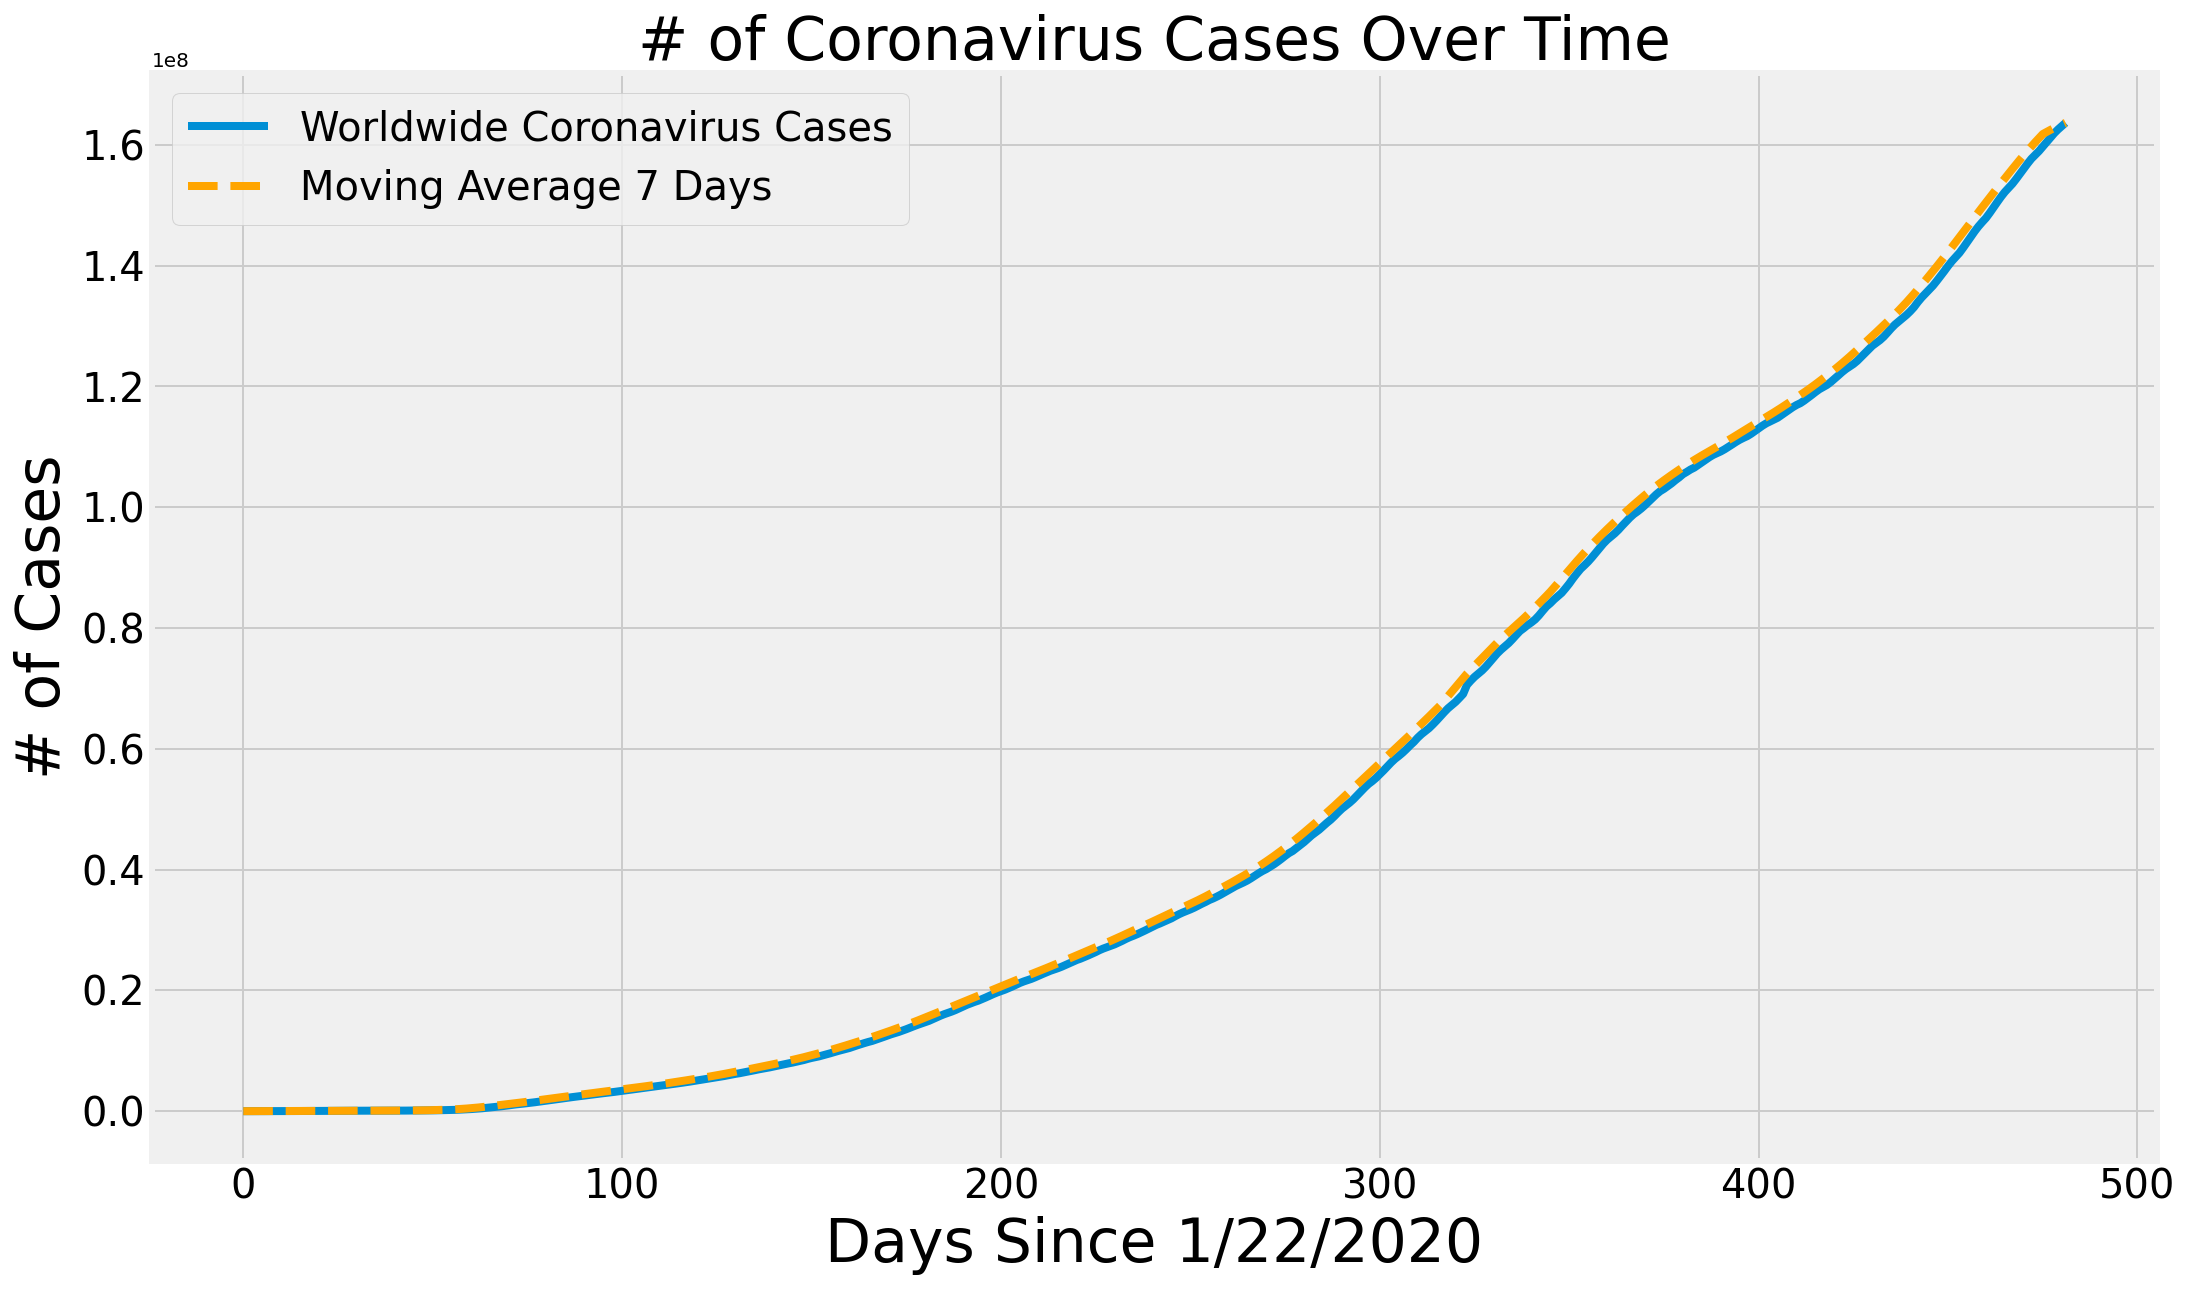

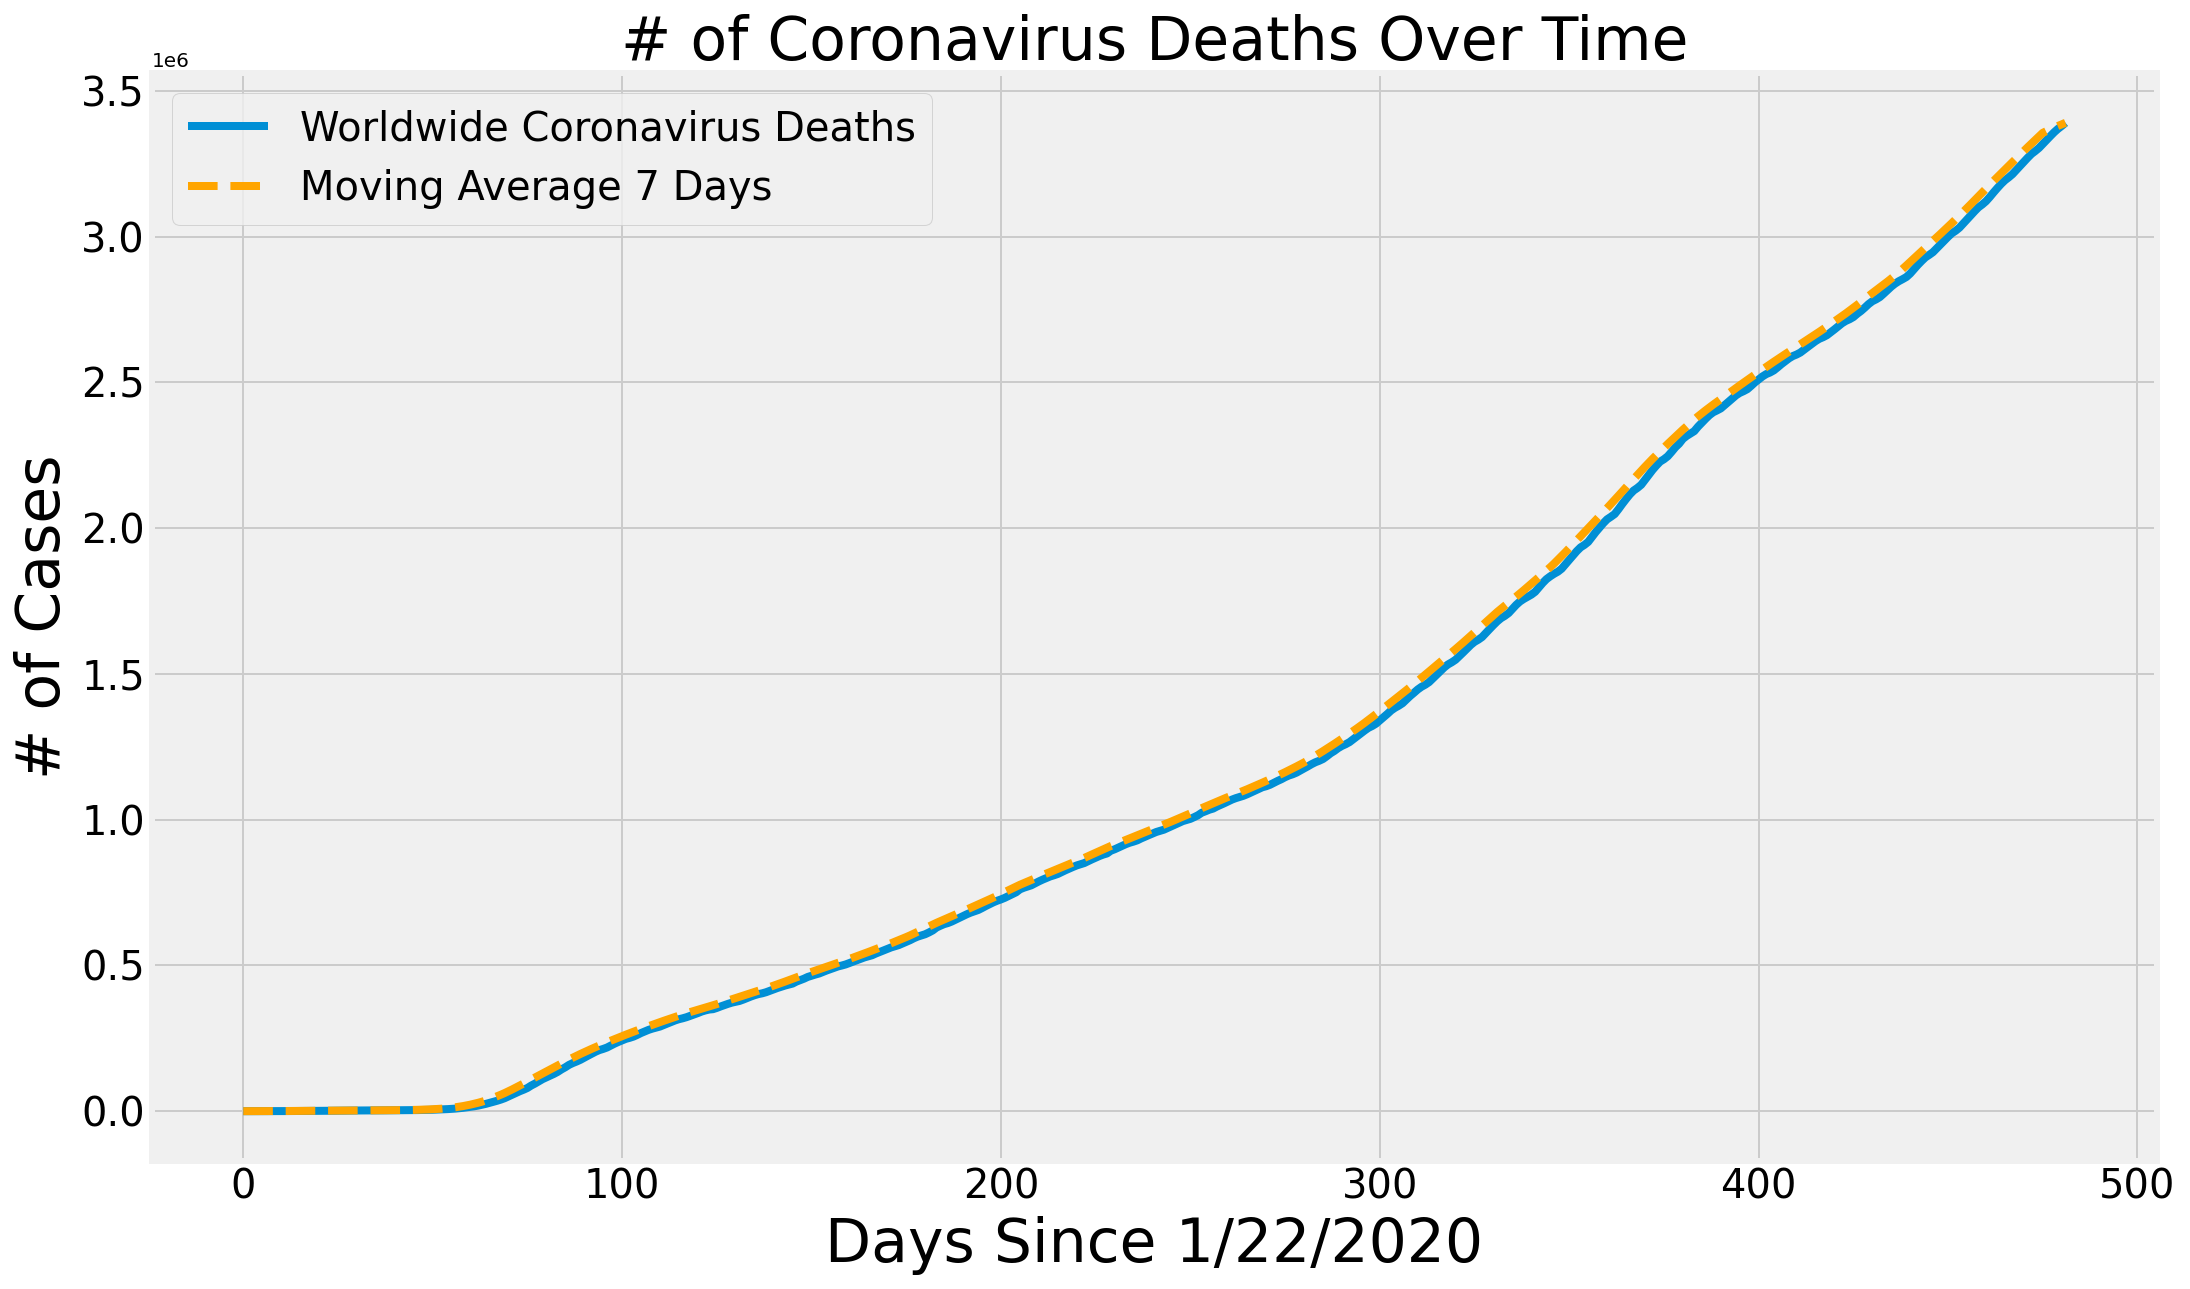

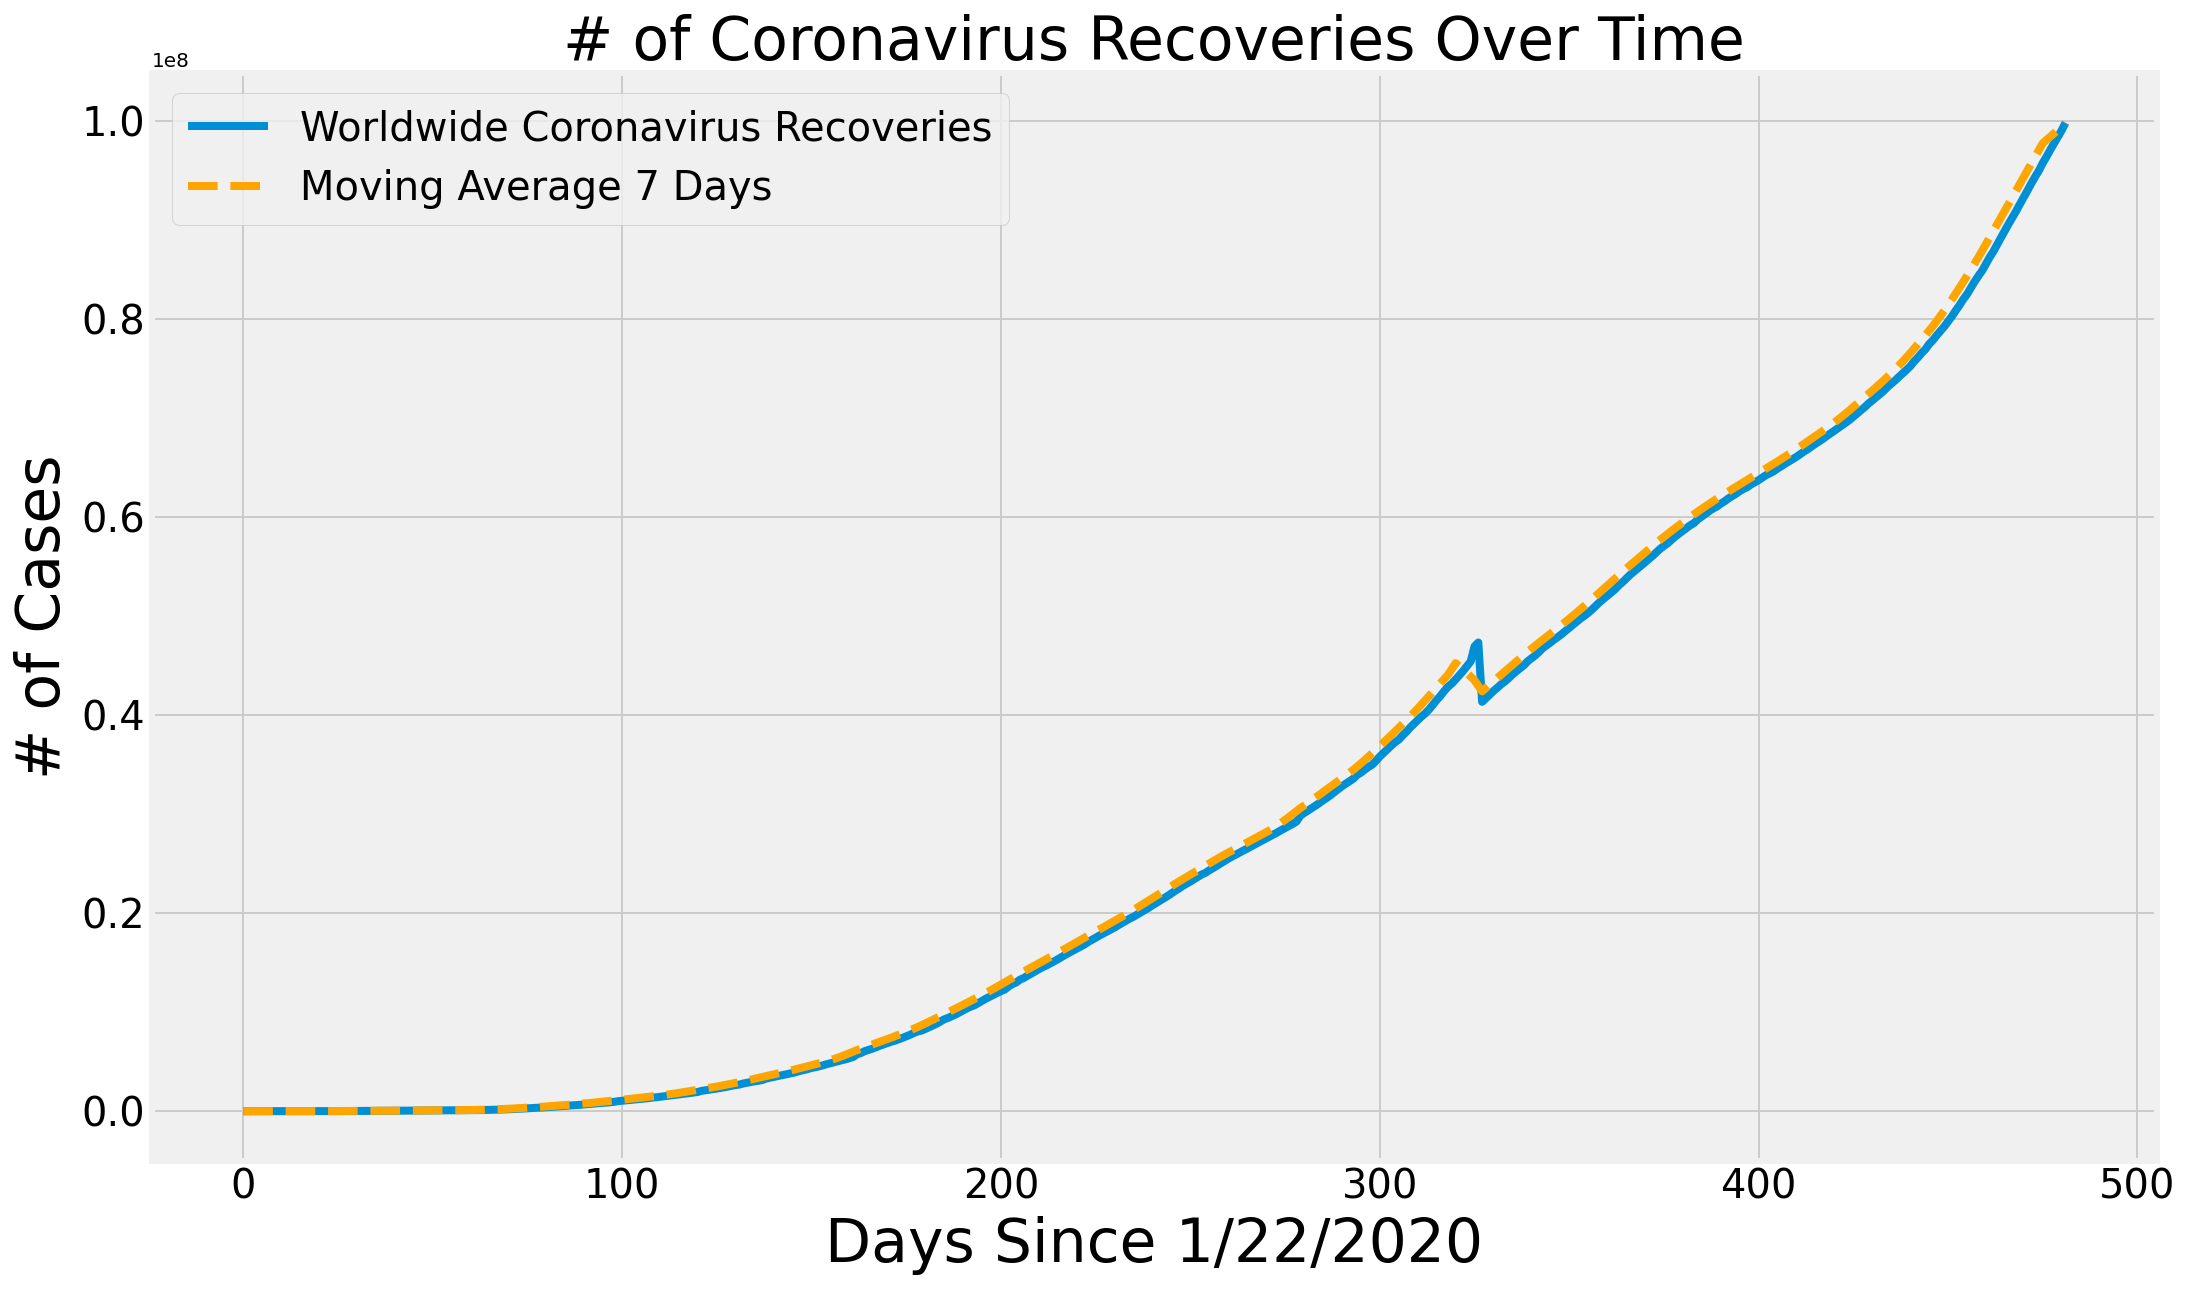

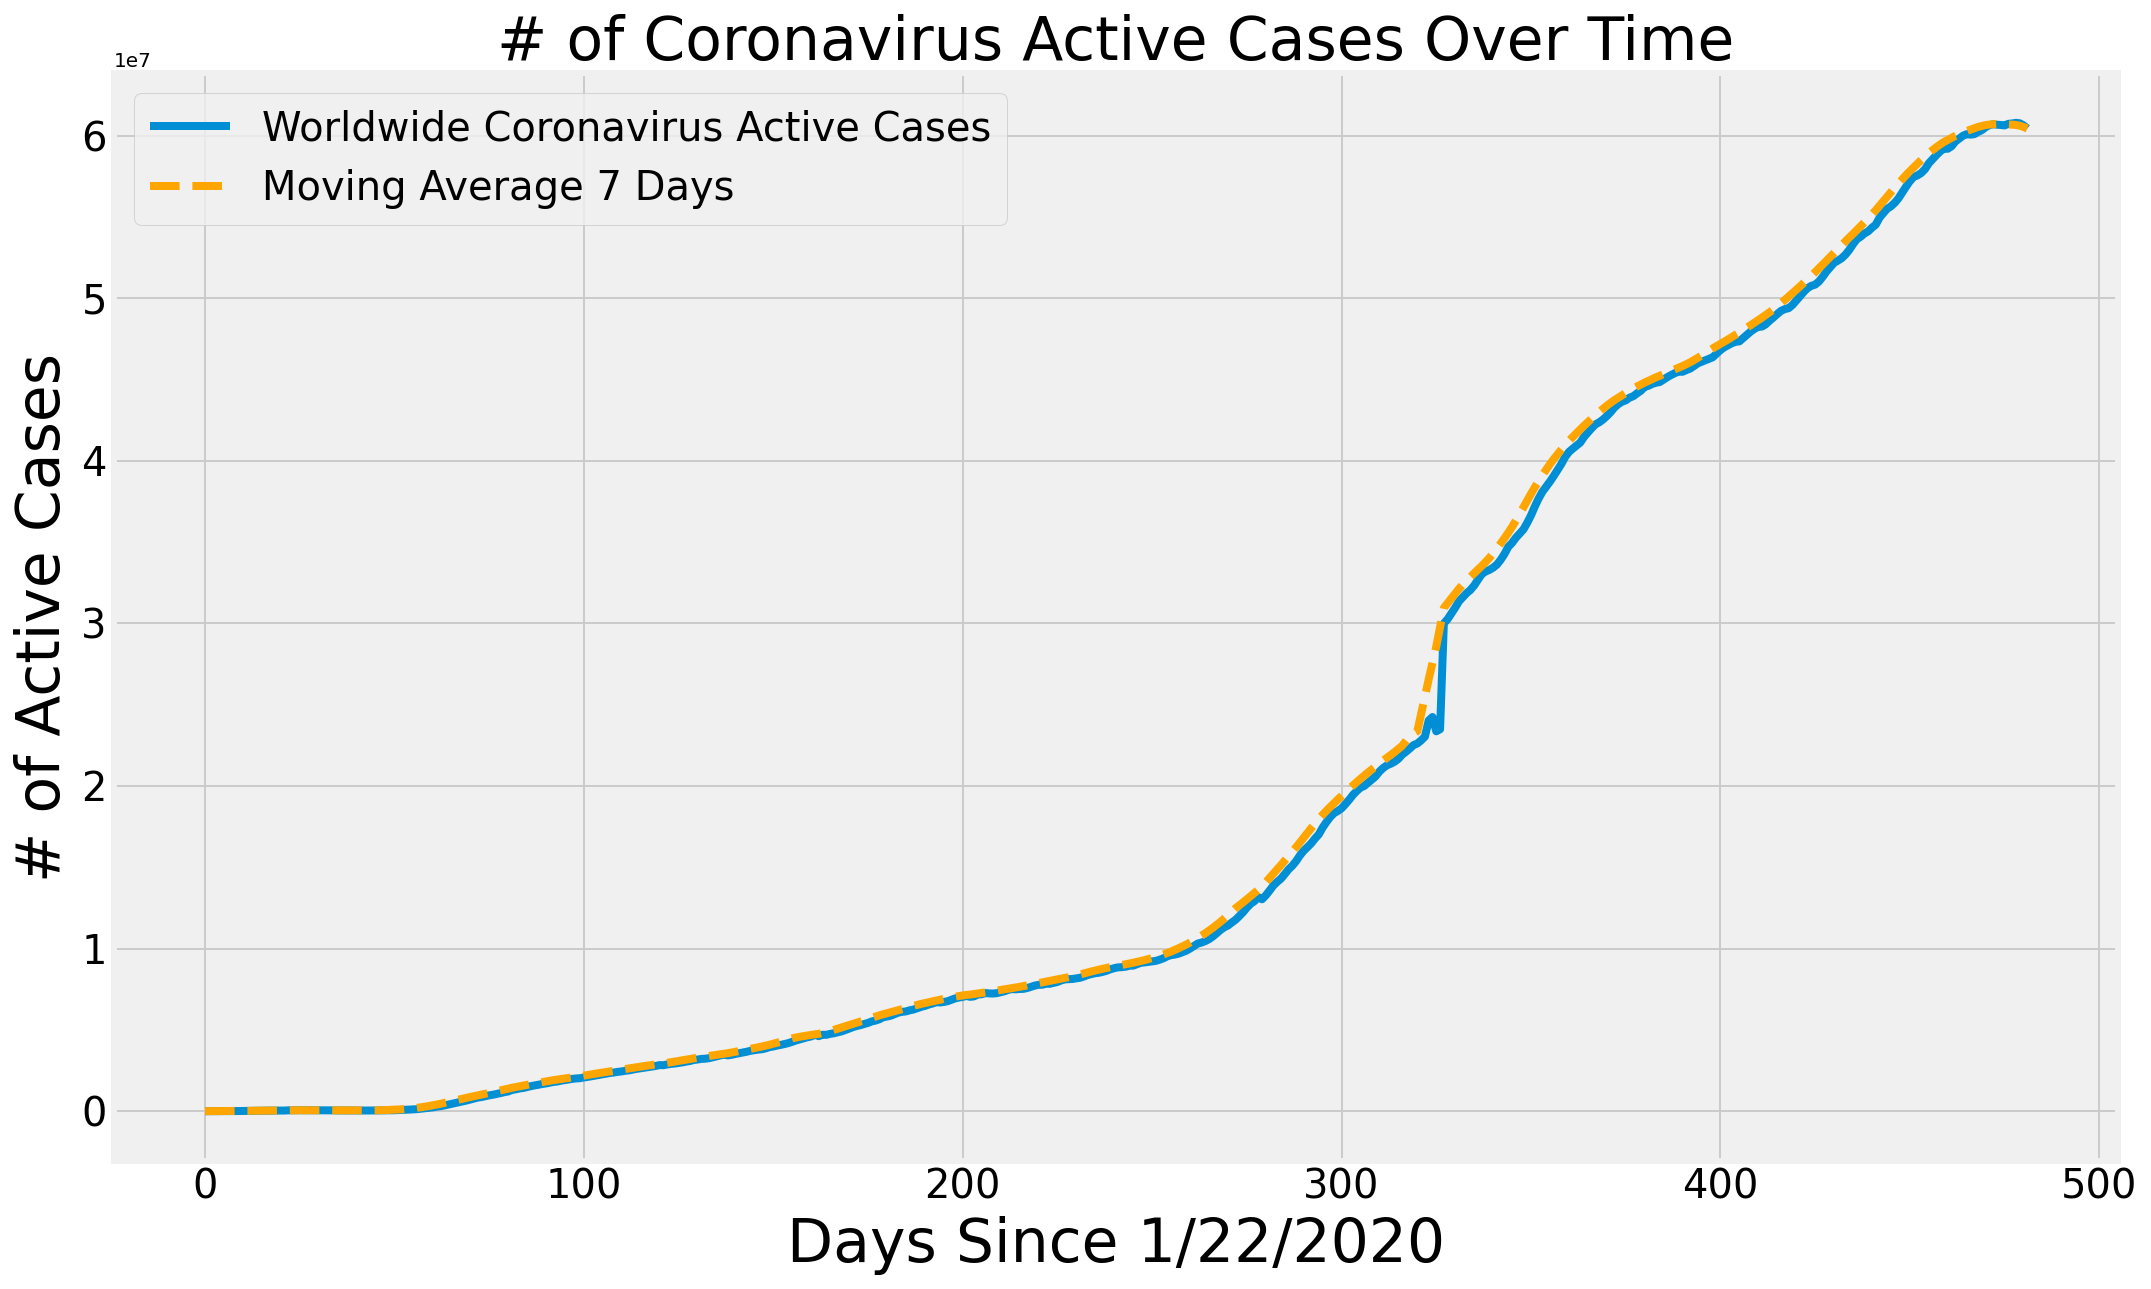

In [73]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, world_recovery_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Recoveries', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_active)
plt.plot(adjusted_dates, world_active_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.legend(['Worldwide Coronavirus Active Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

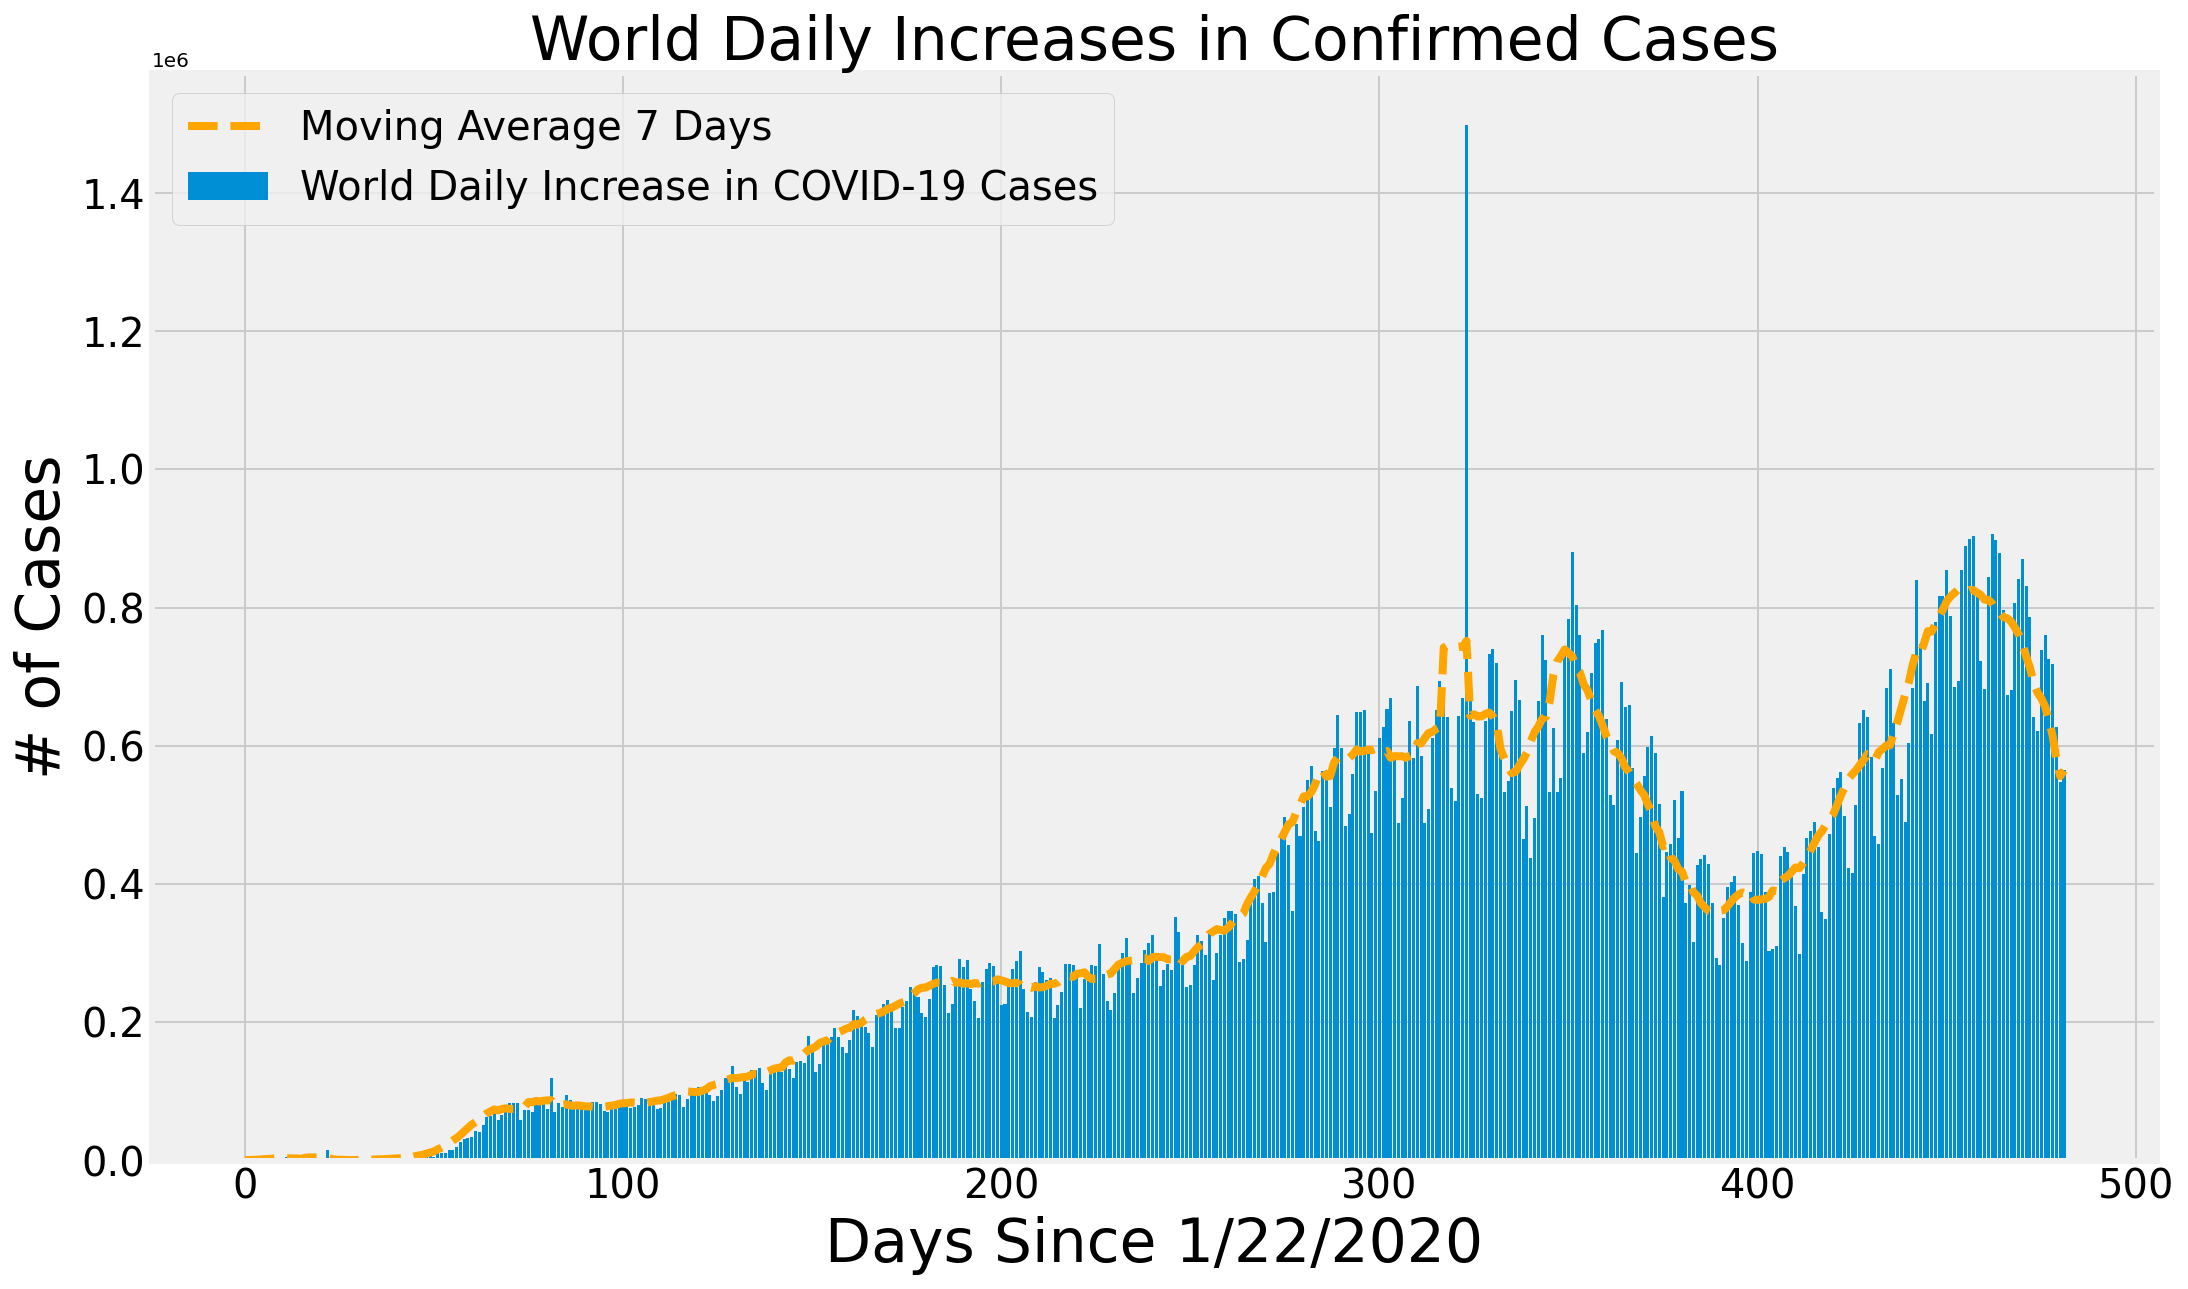

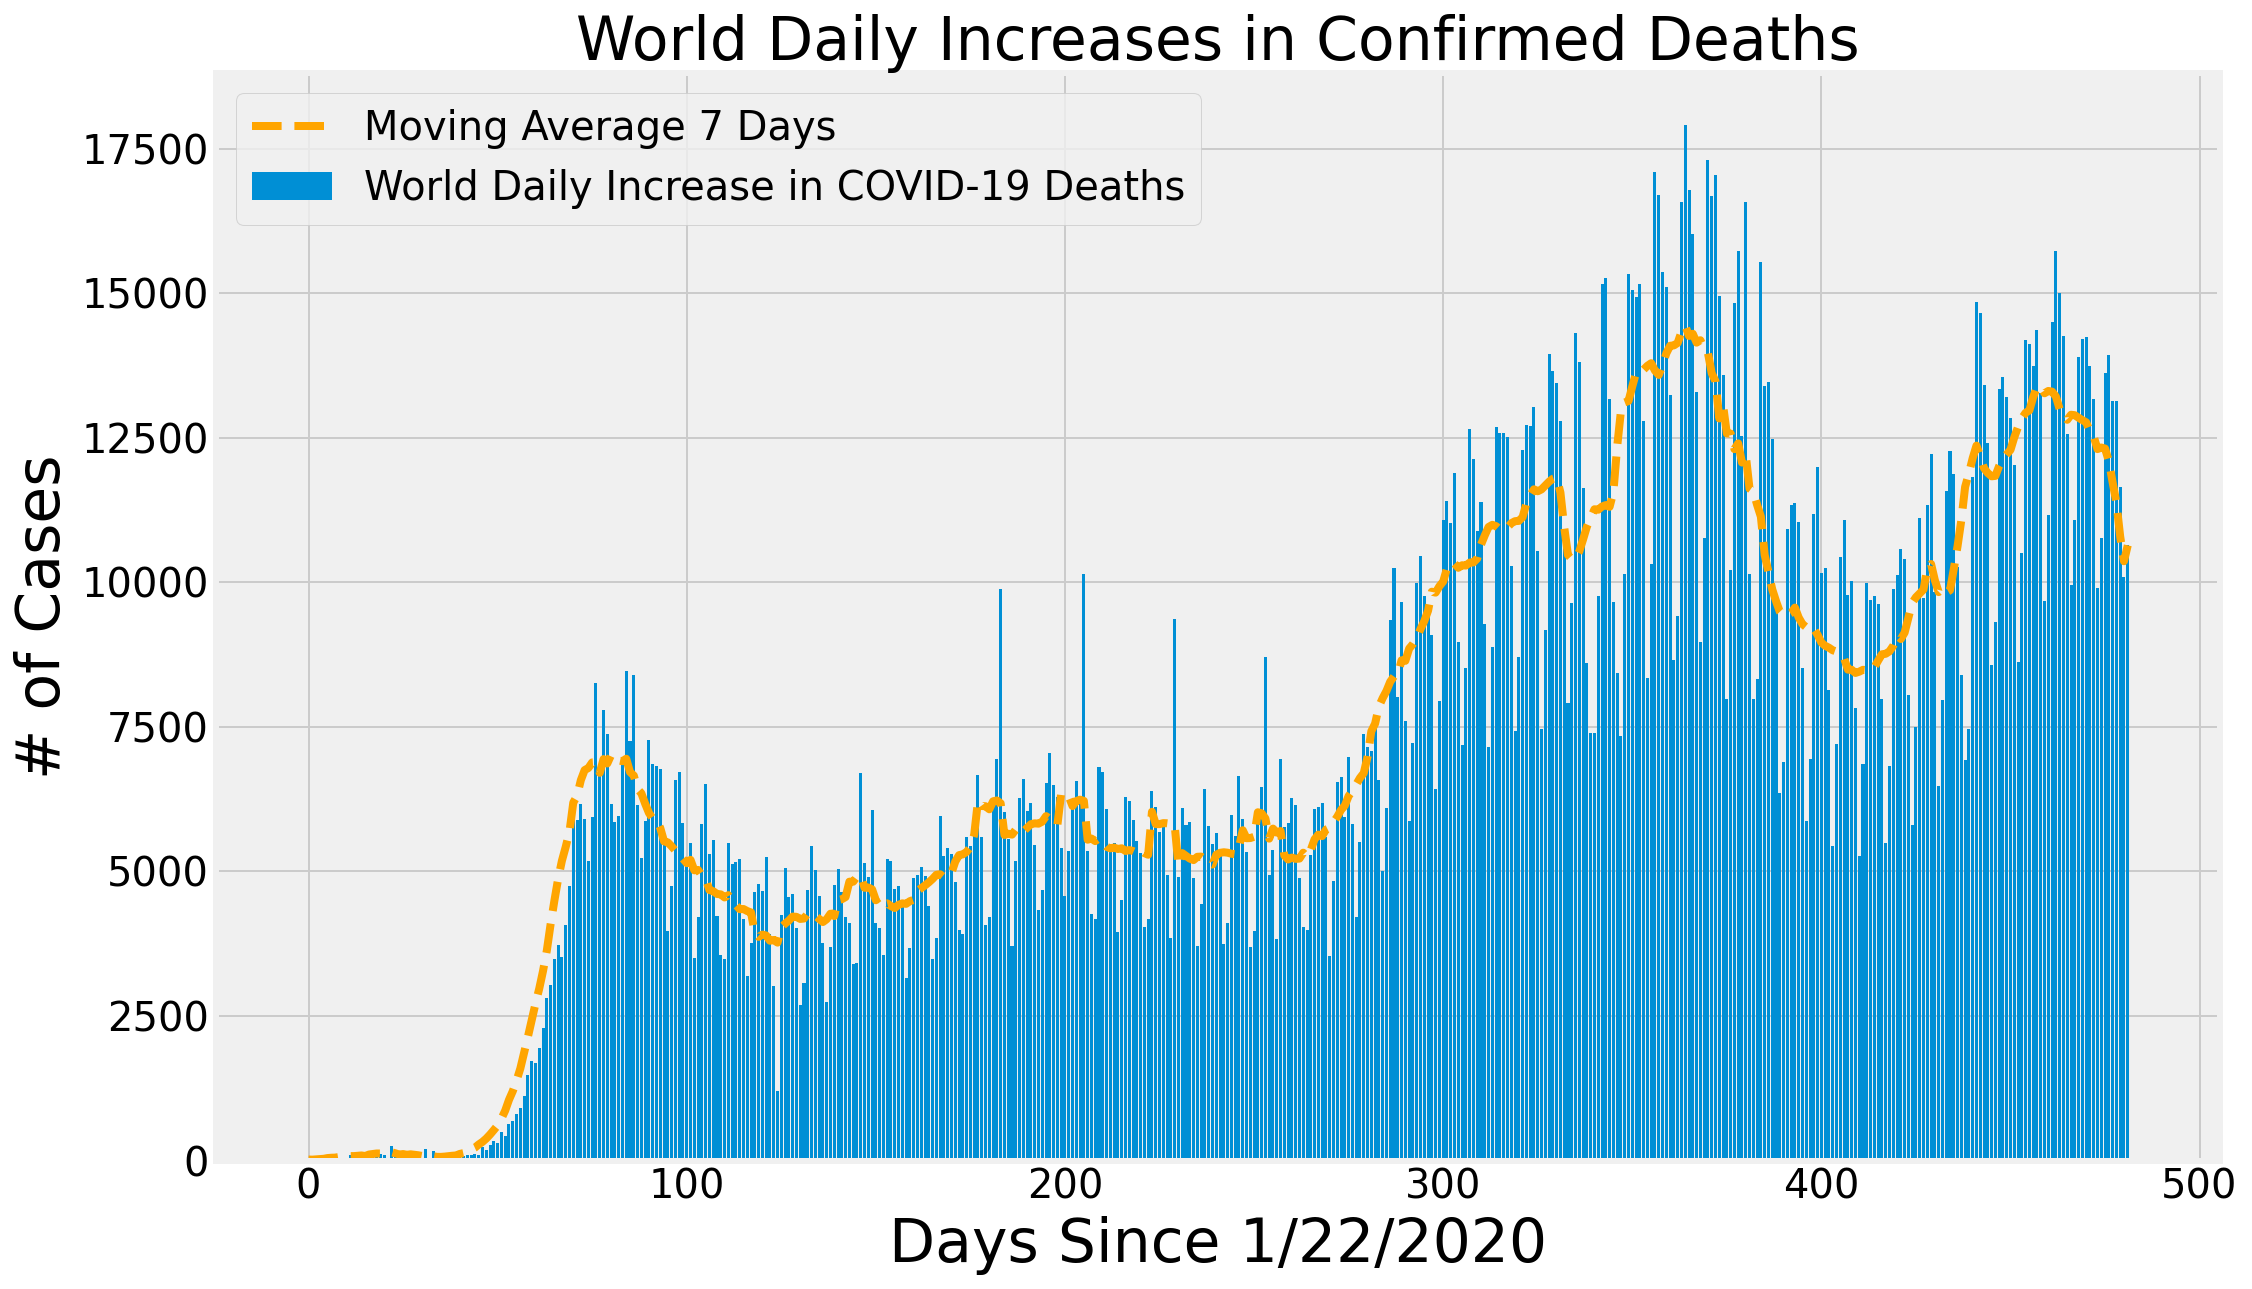

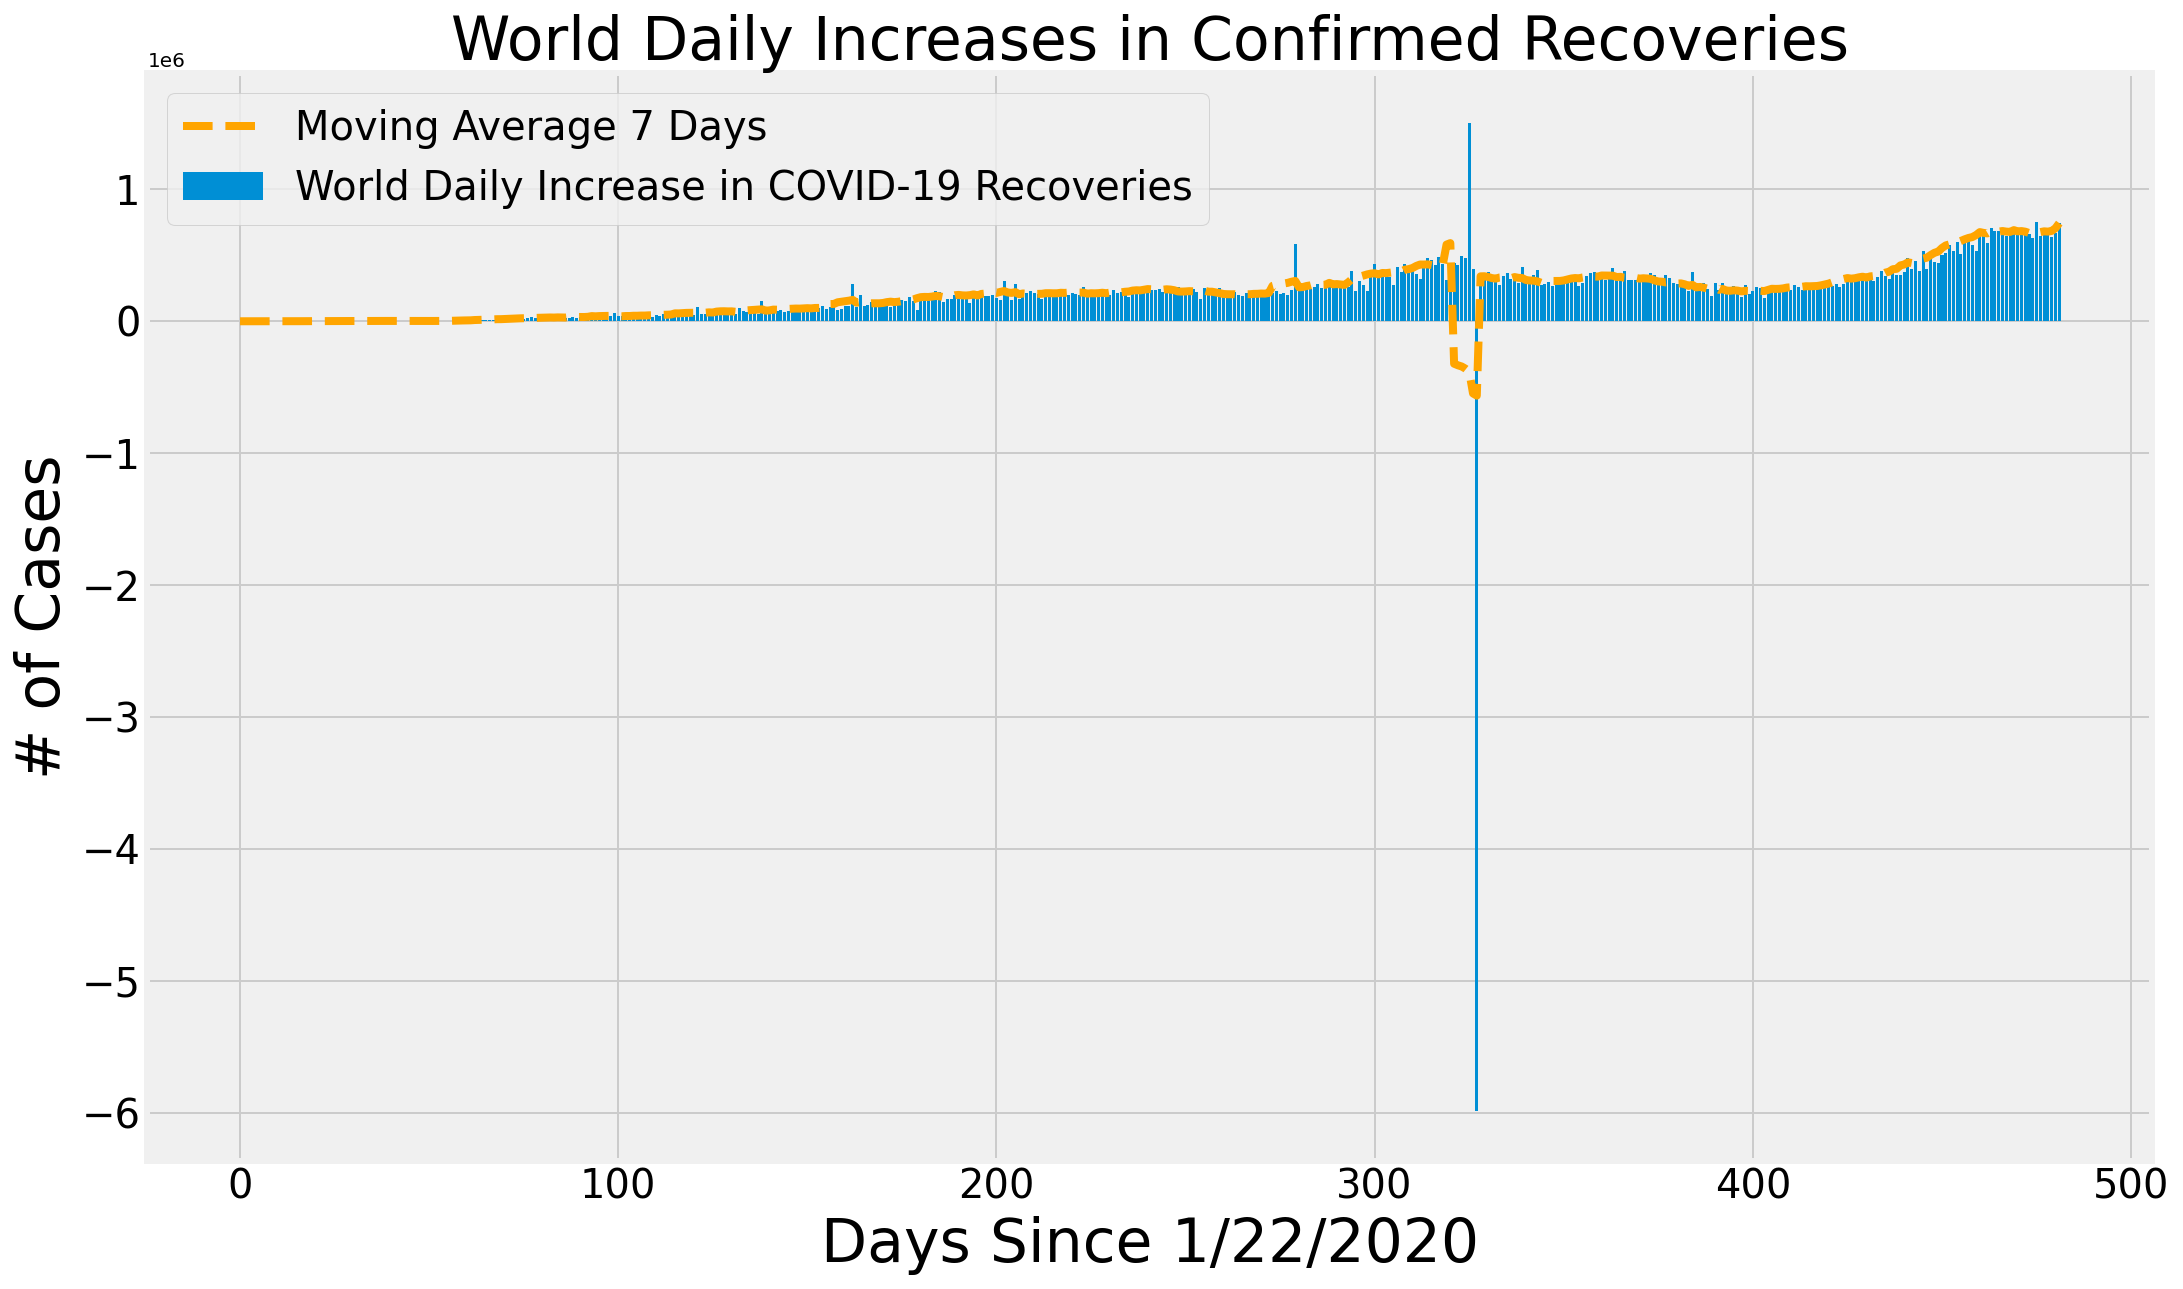

In [74]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_recovery)
plt.plot(adjusted_dates, world_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

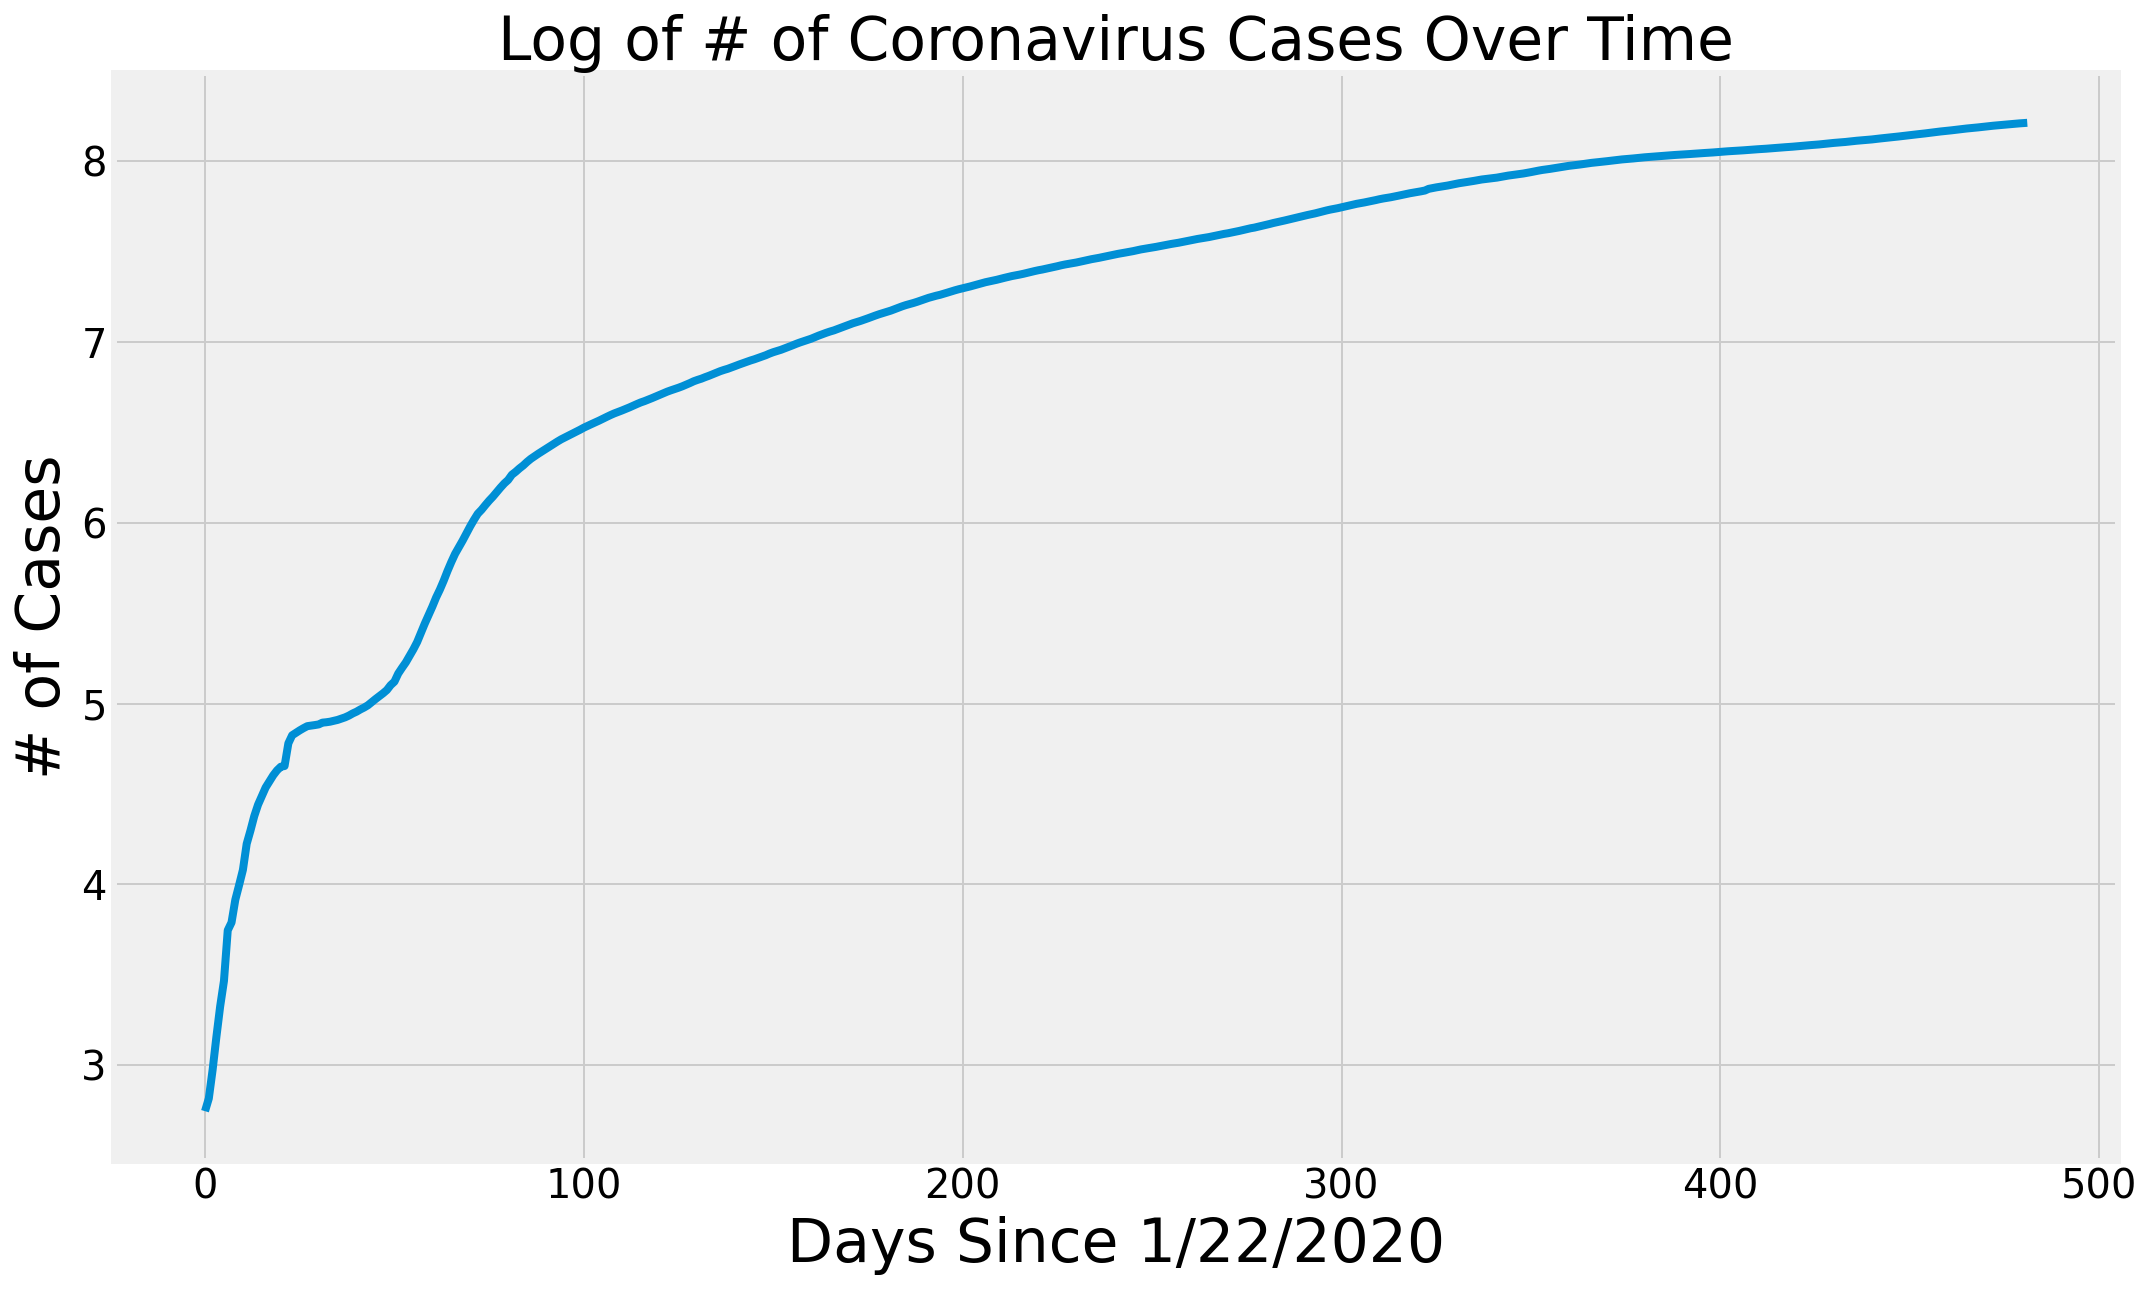

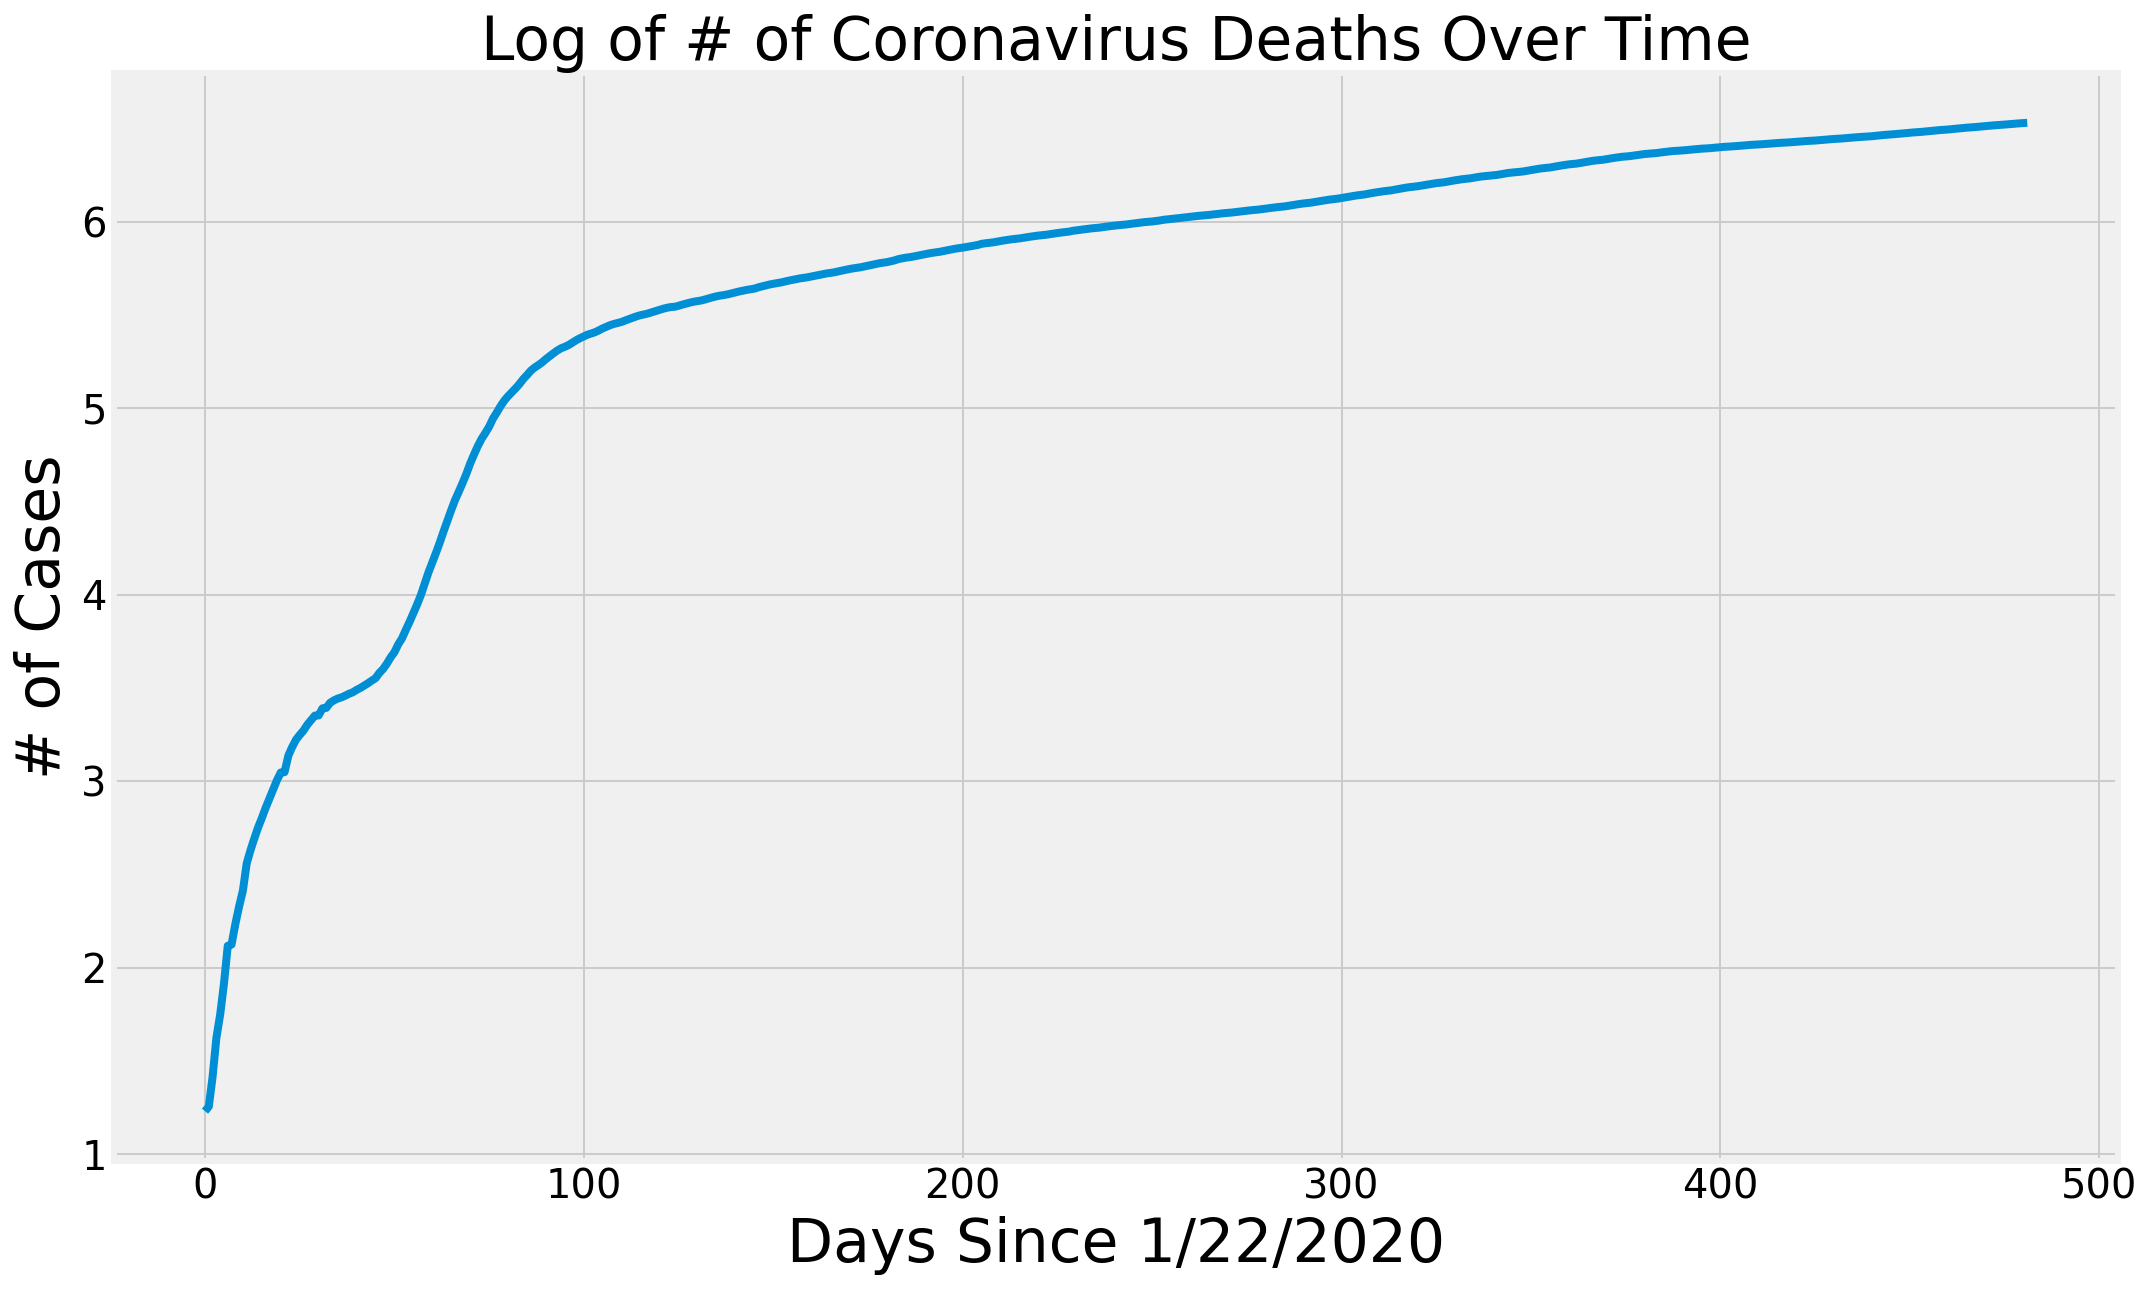

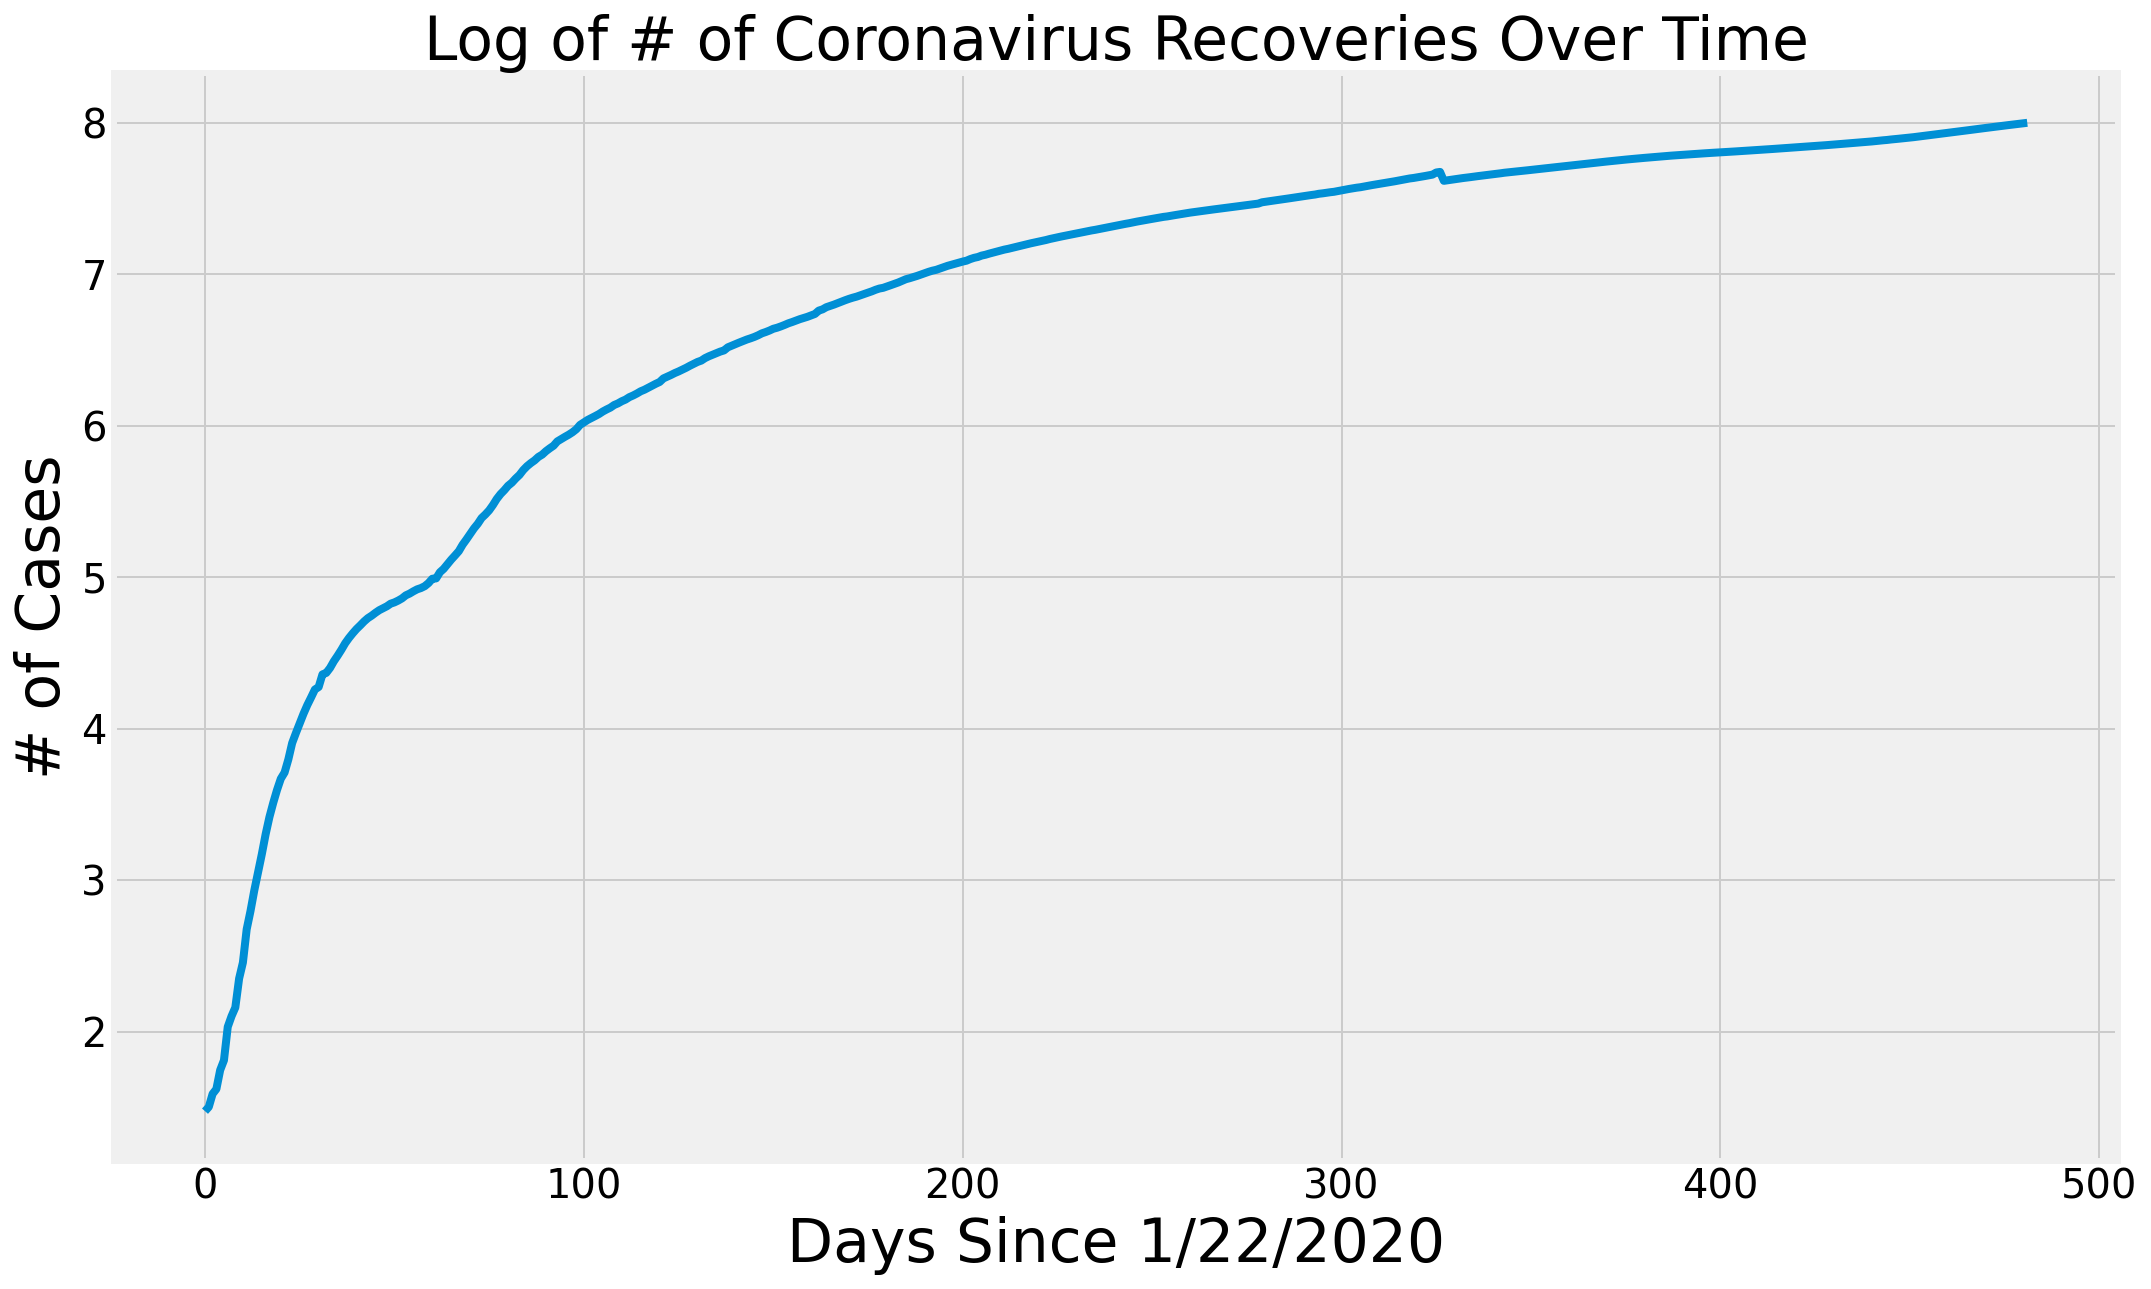

In [75]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.title('Log of # of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [76]:
def country_plot(x, y1, y2, y3, y4, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
        country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths, country_recoveries)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    country_recoveries = country_info[2]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_daily_recovery, country_name)
    

# Country Specific Graphs
Now we are taking a look at specific countries. This allows us to examine the pandemic at a local level. 
<a id='country_graphs'></a>

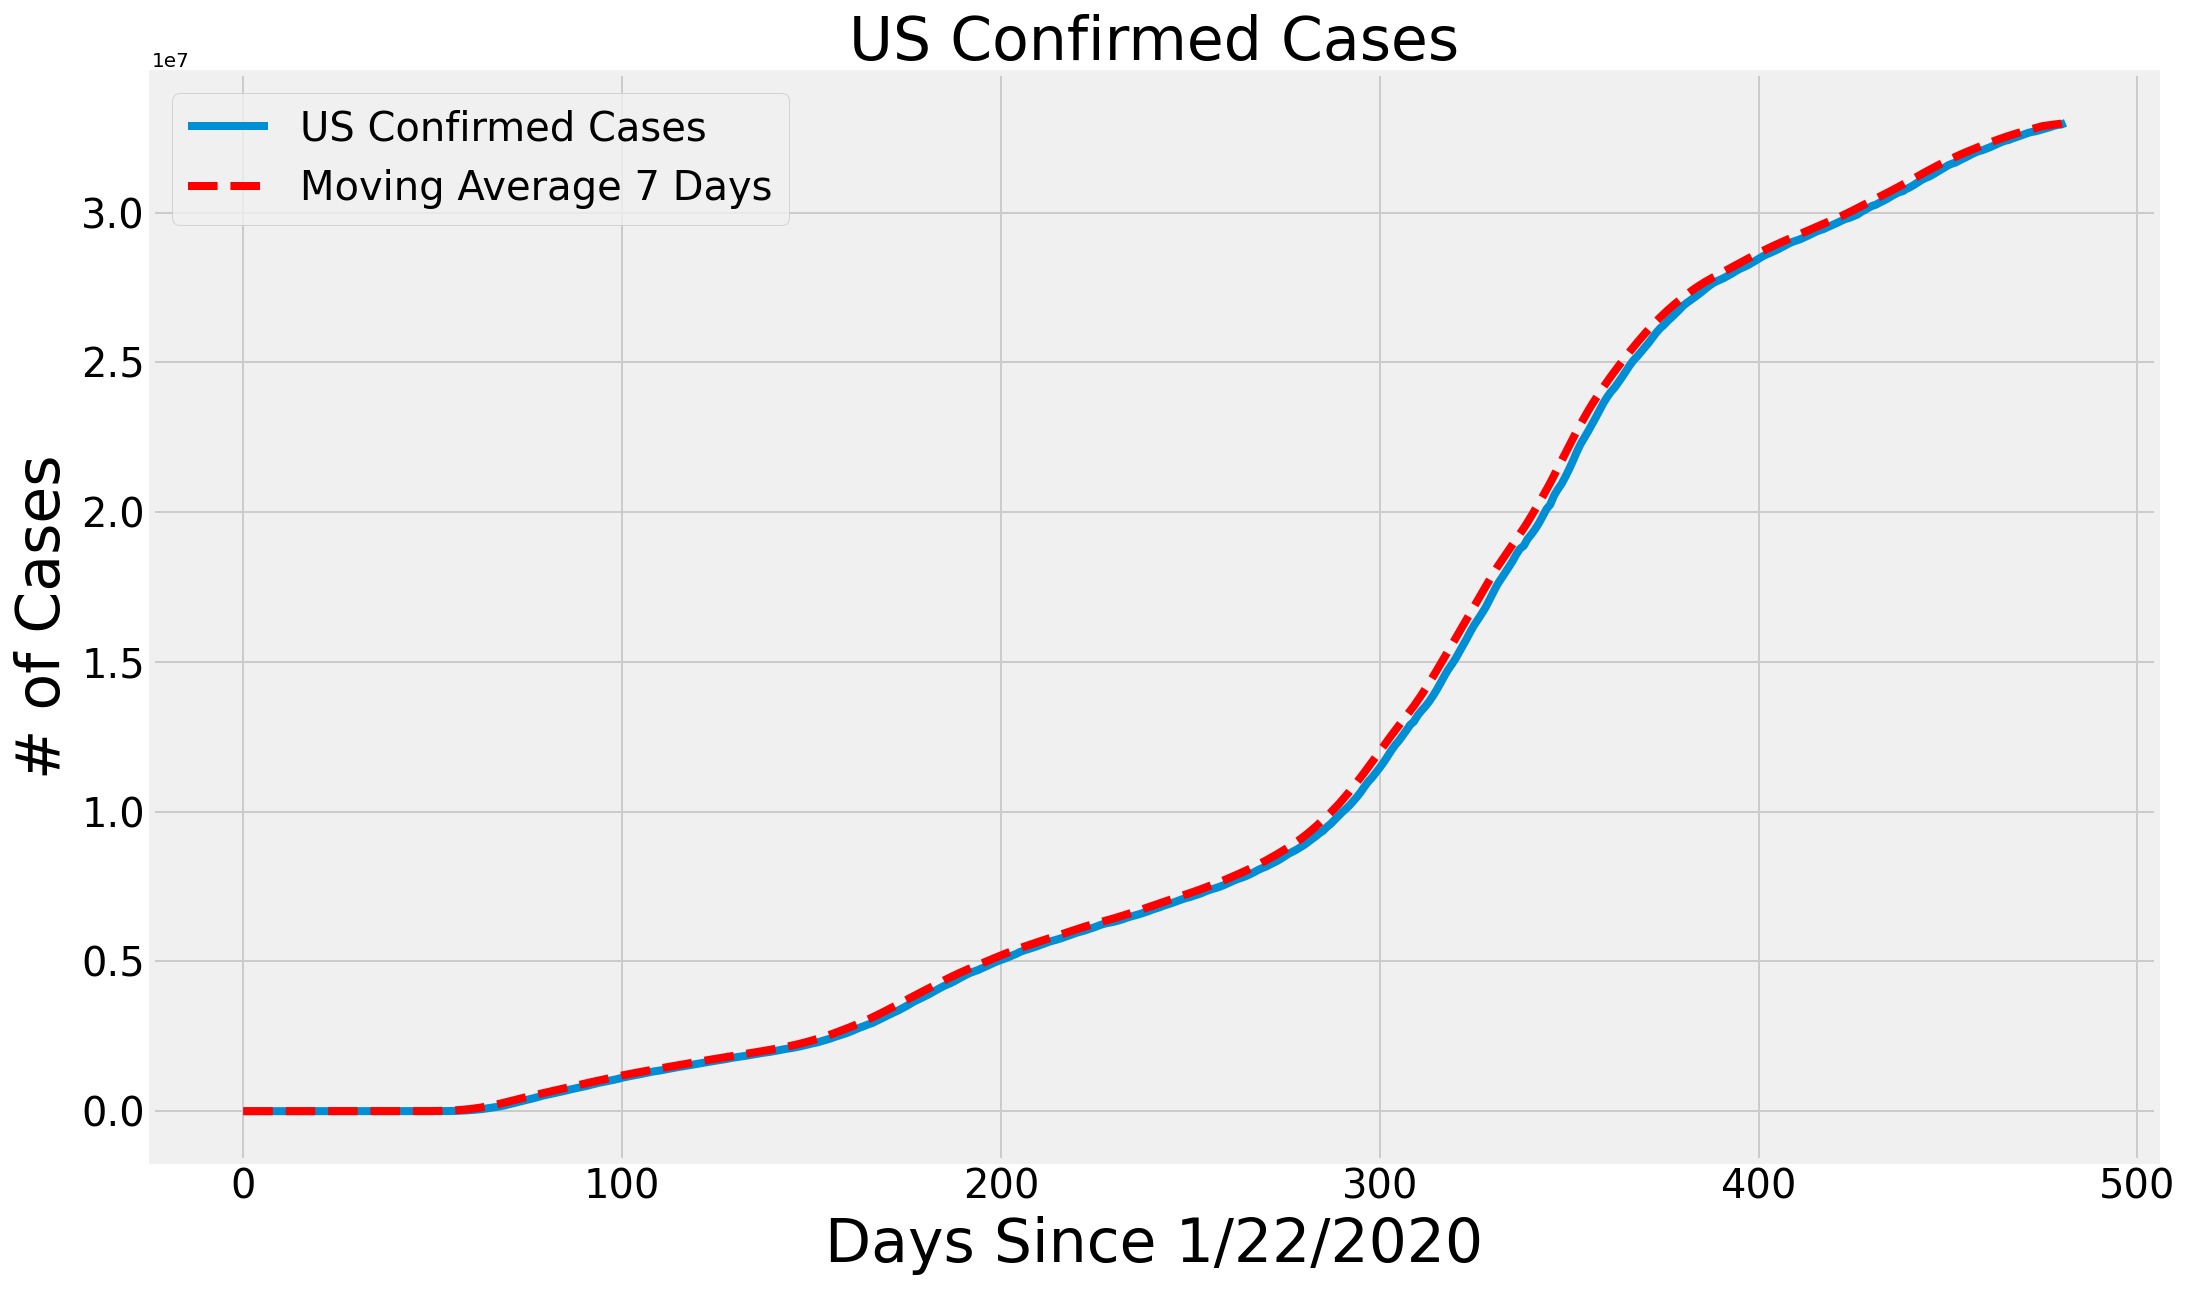

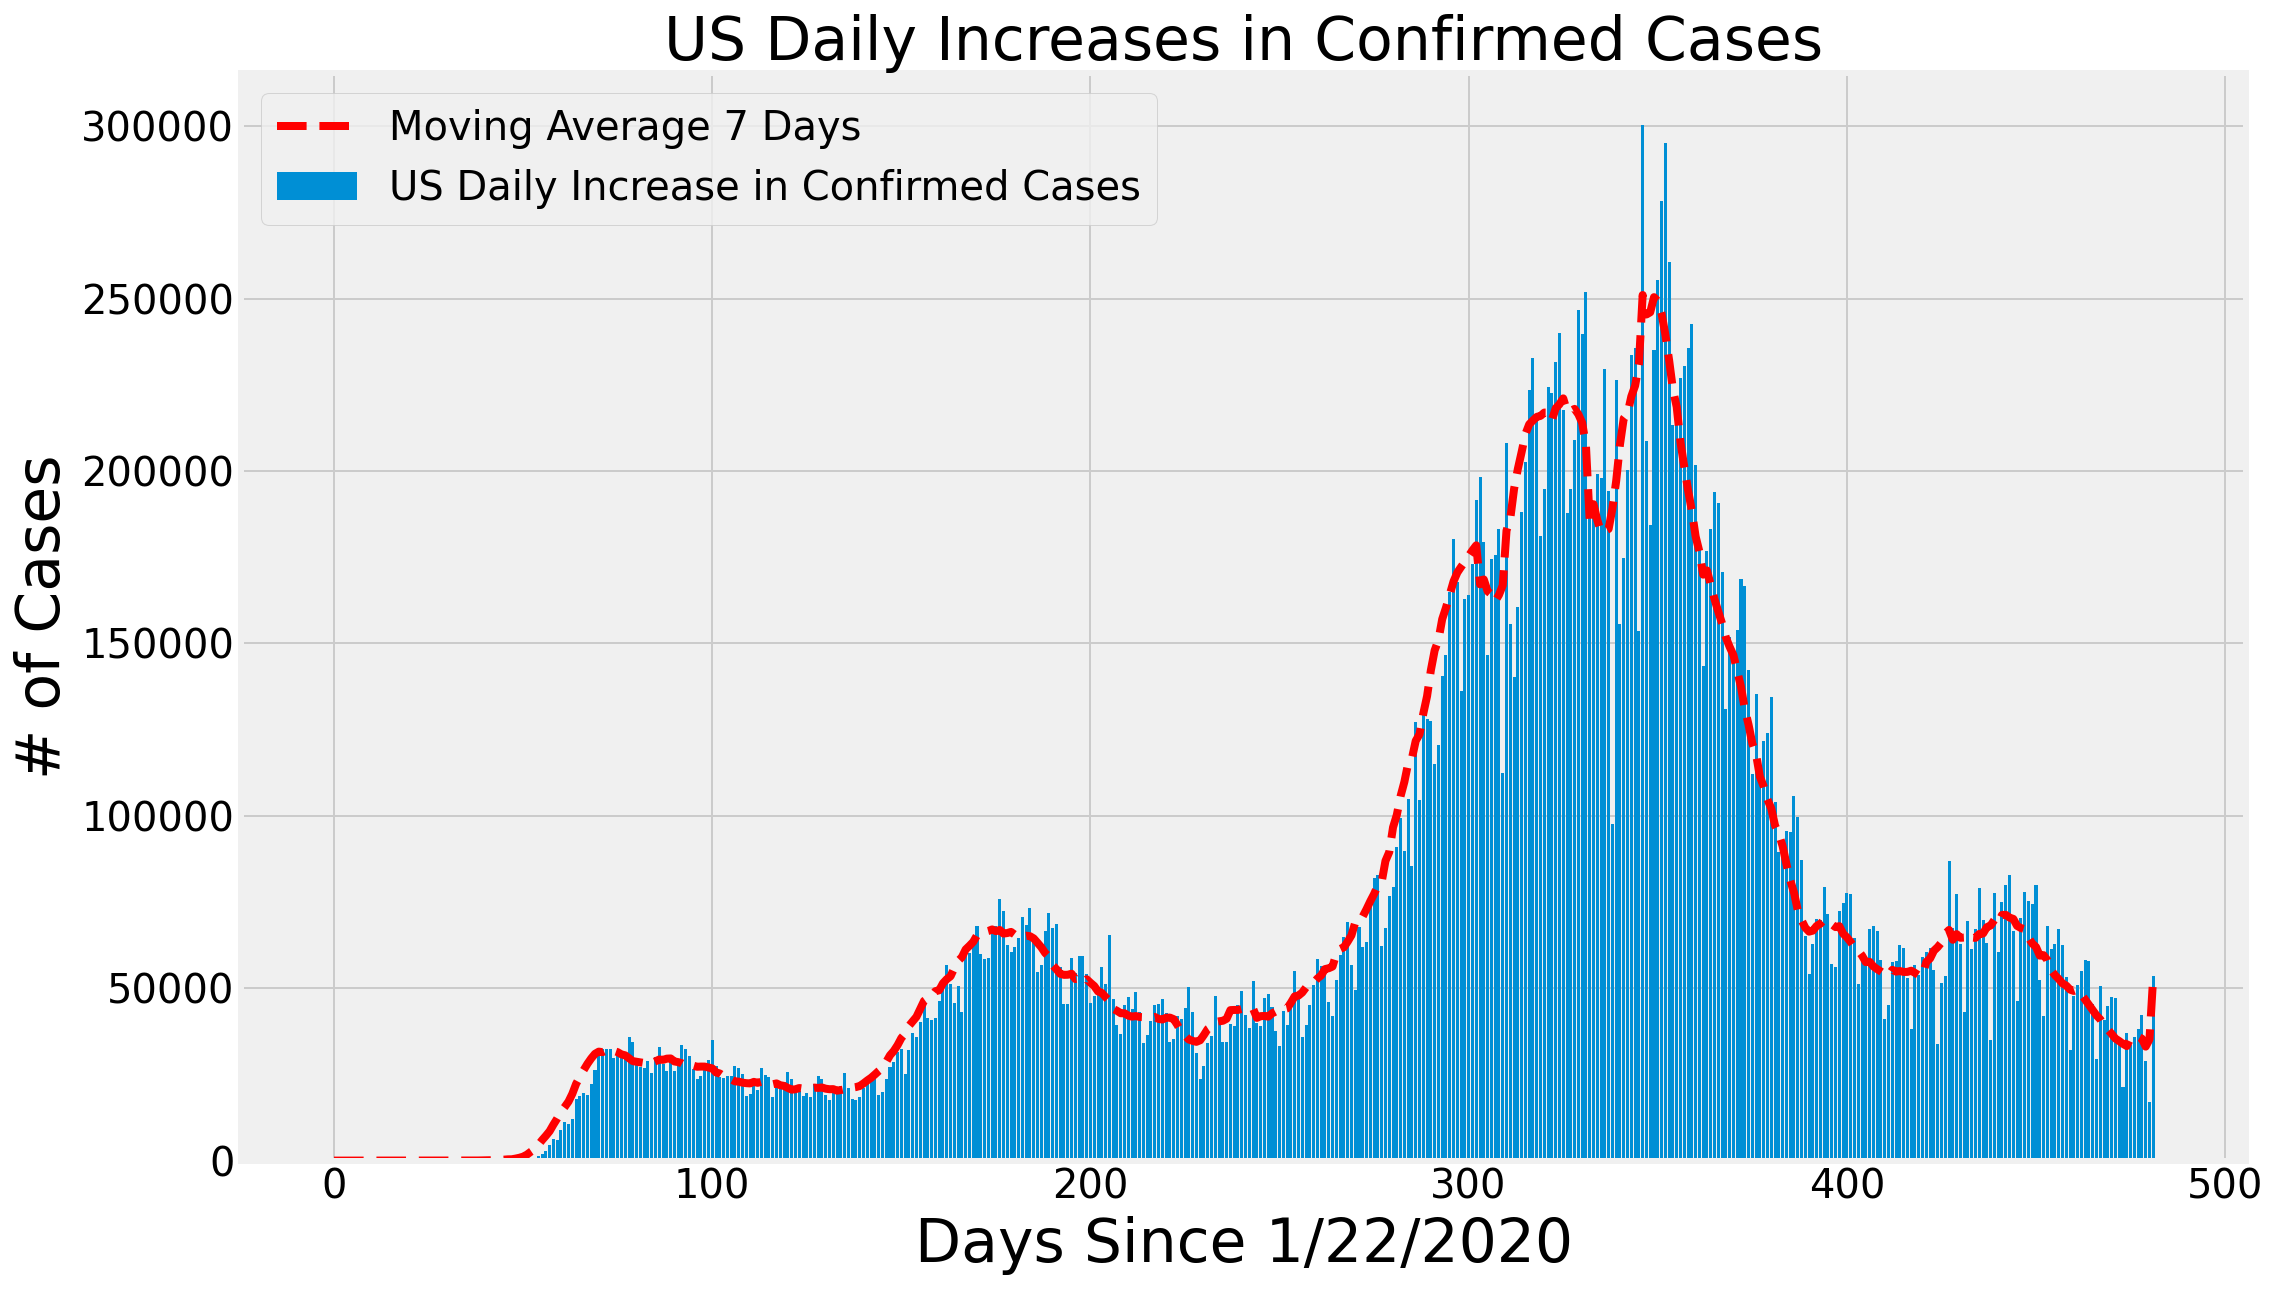

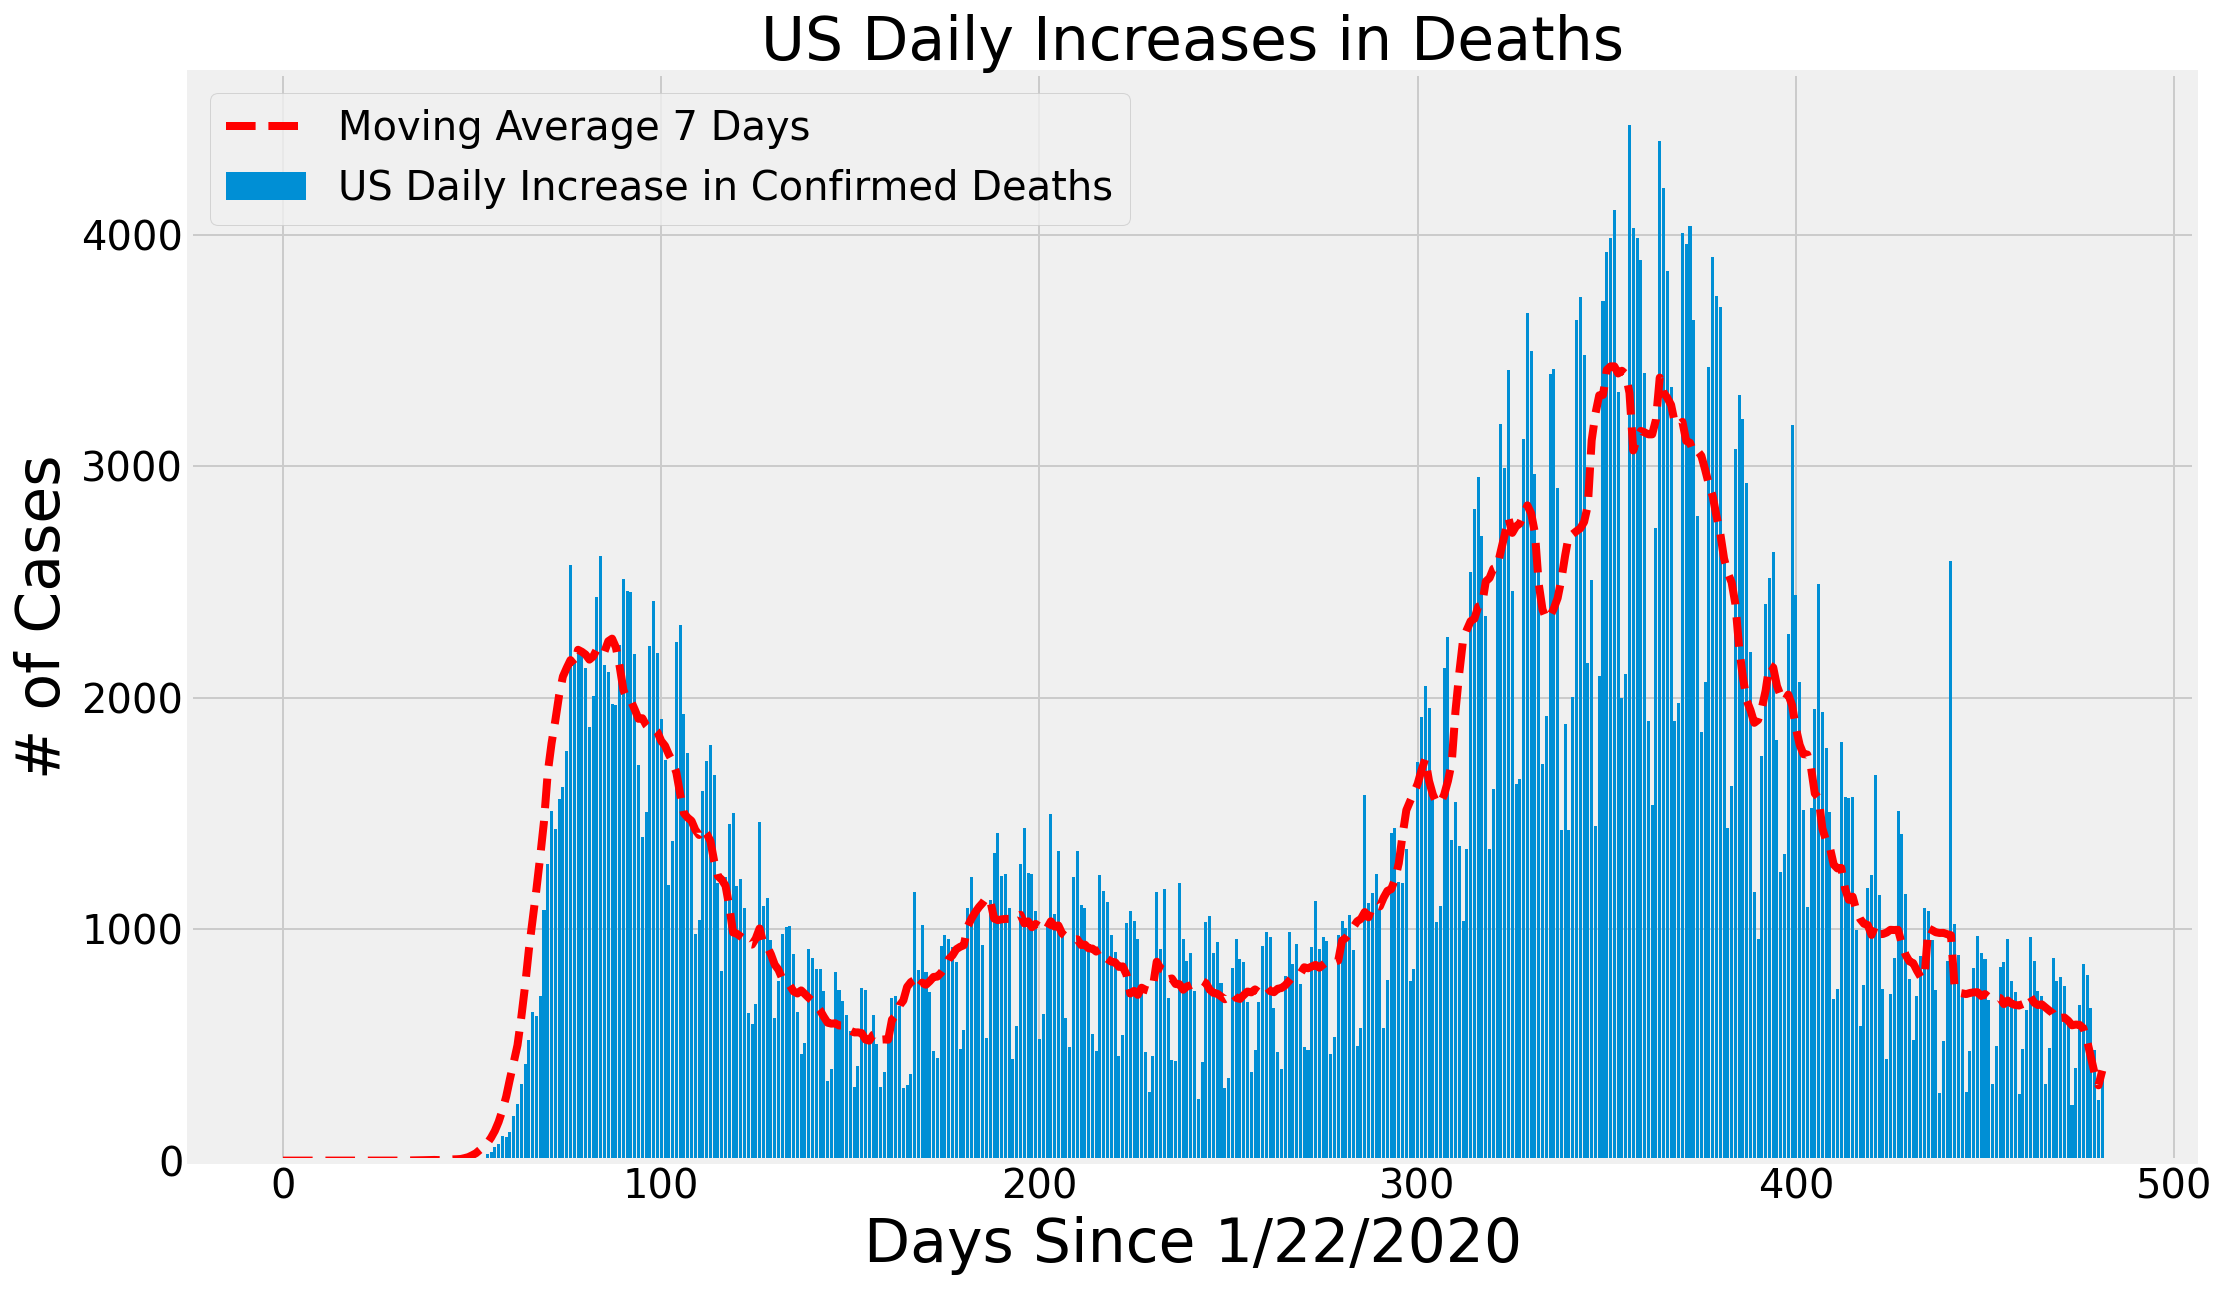

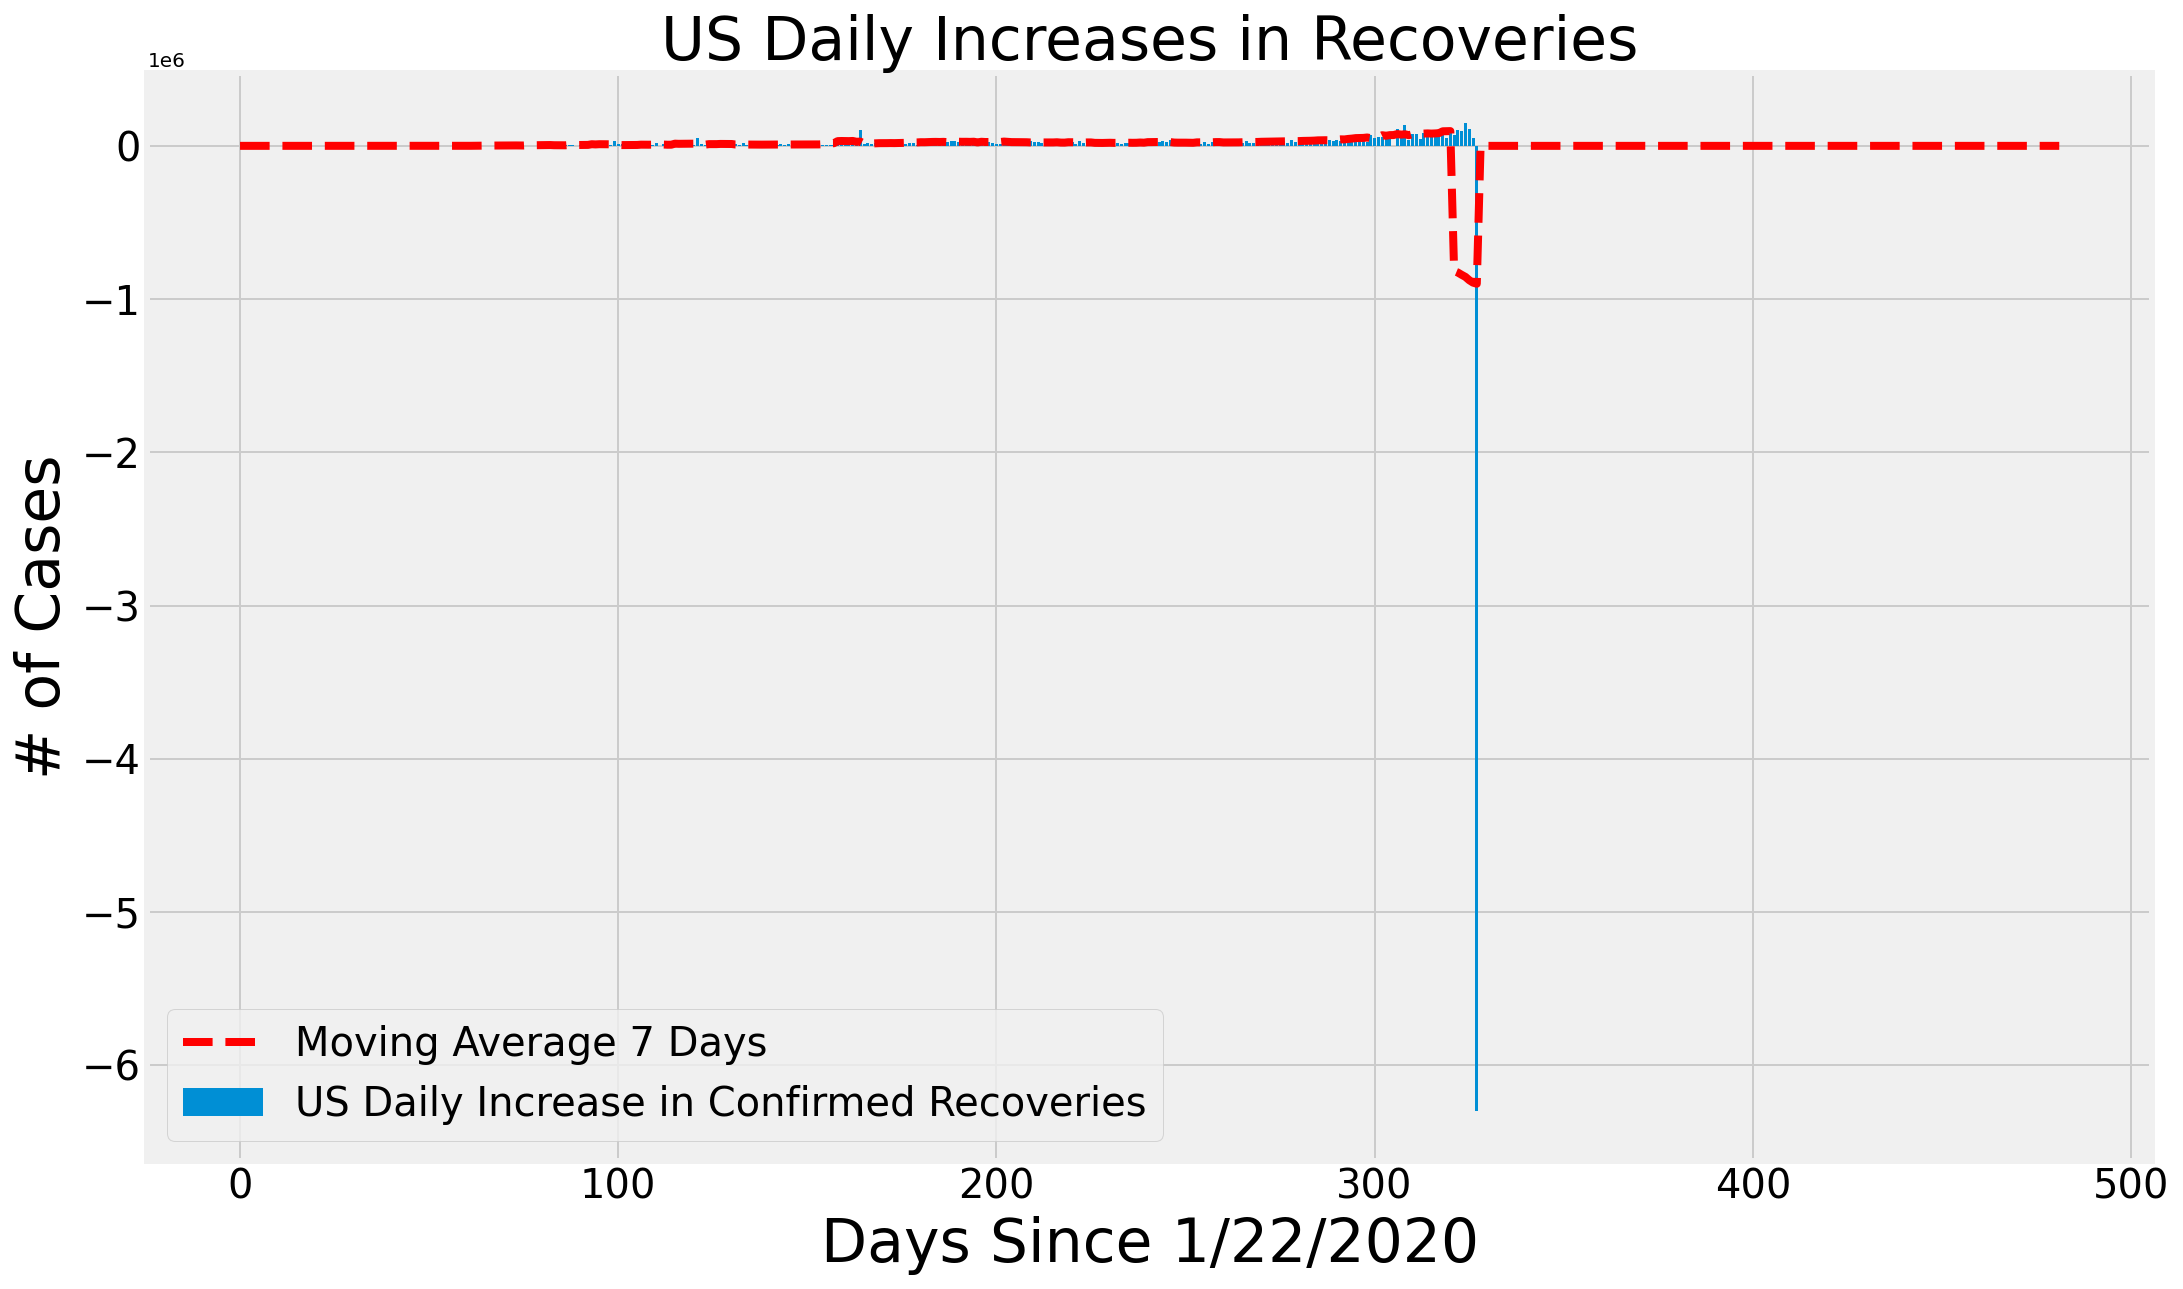

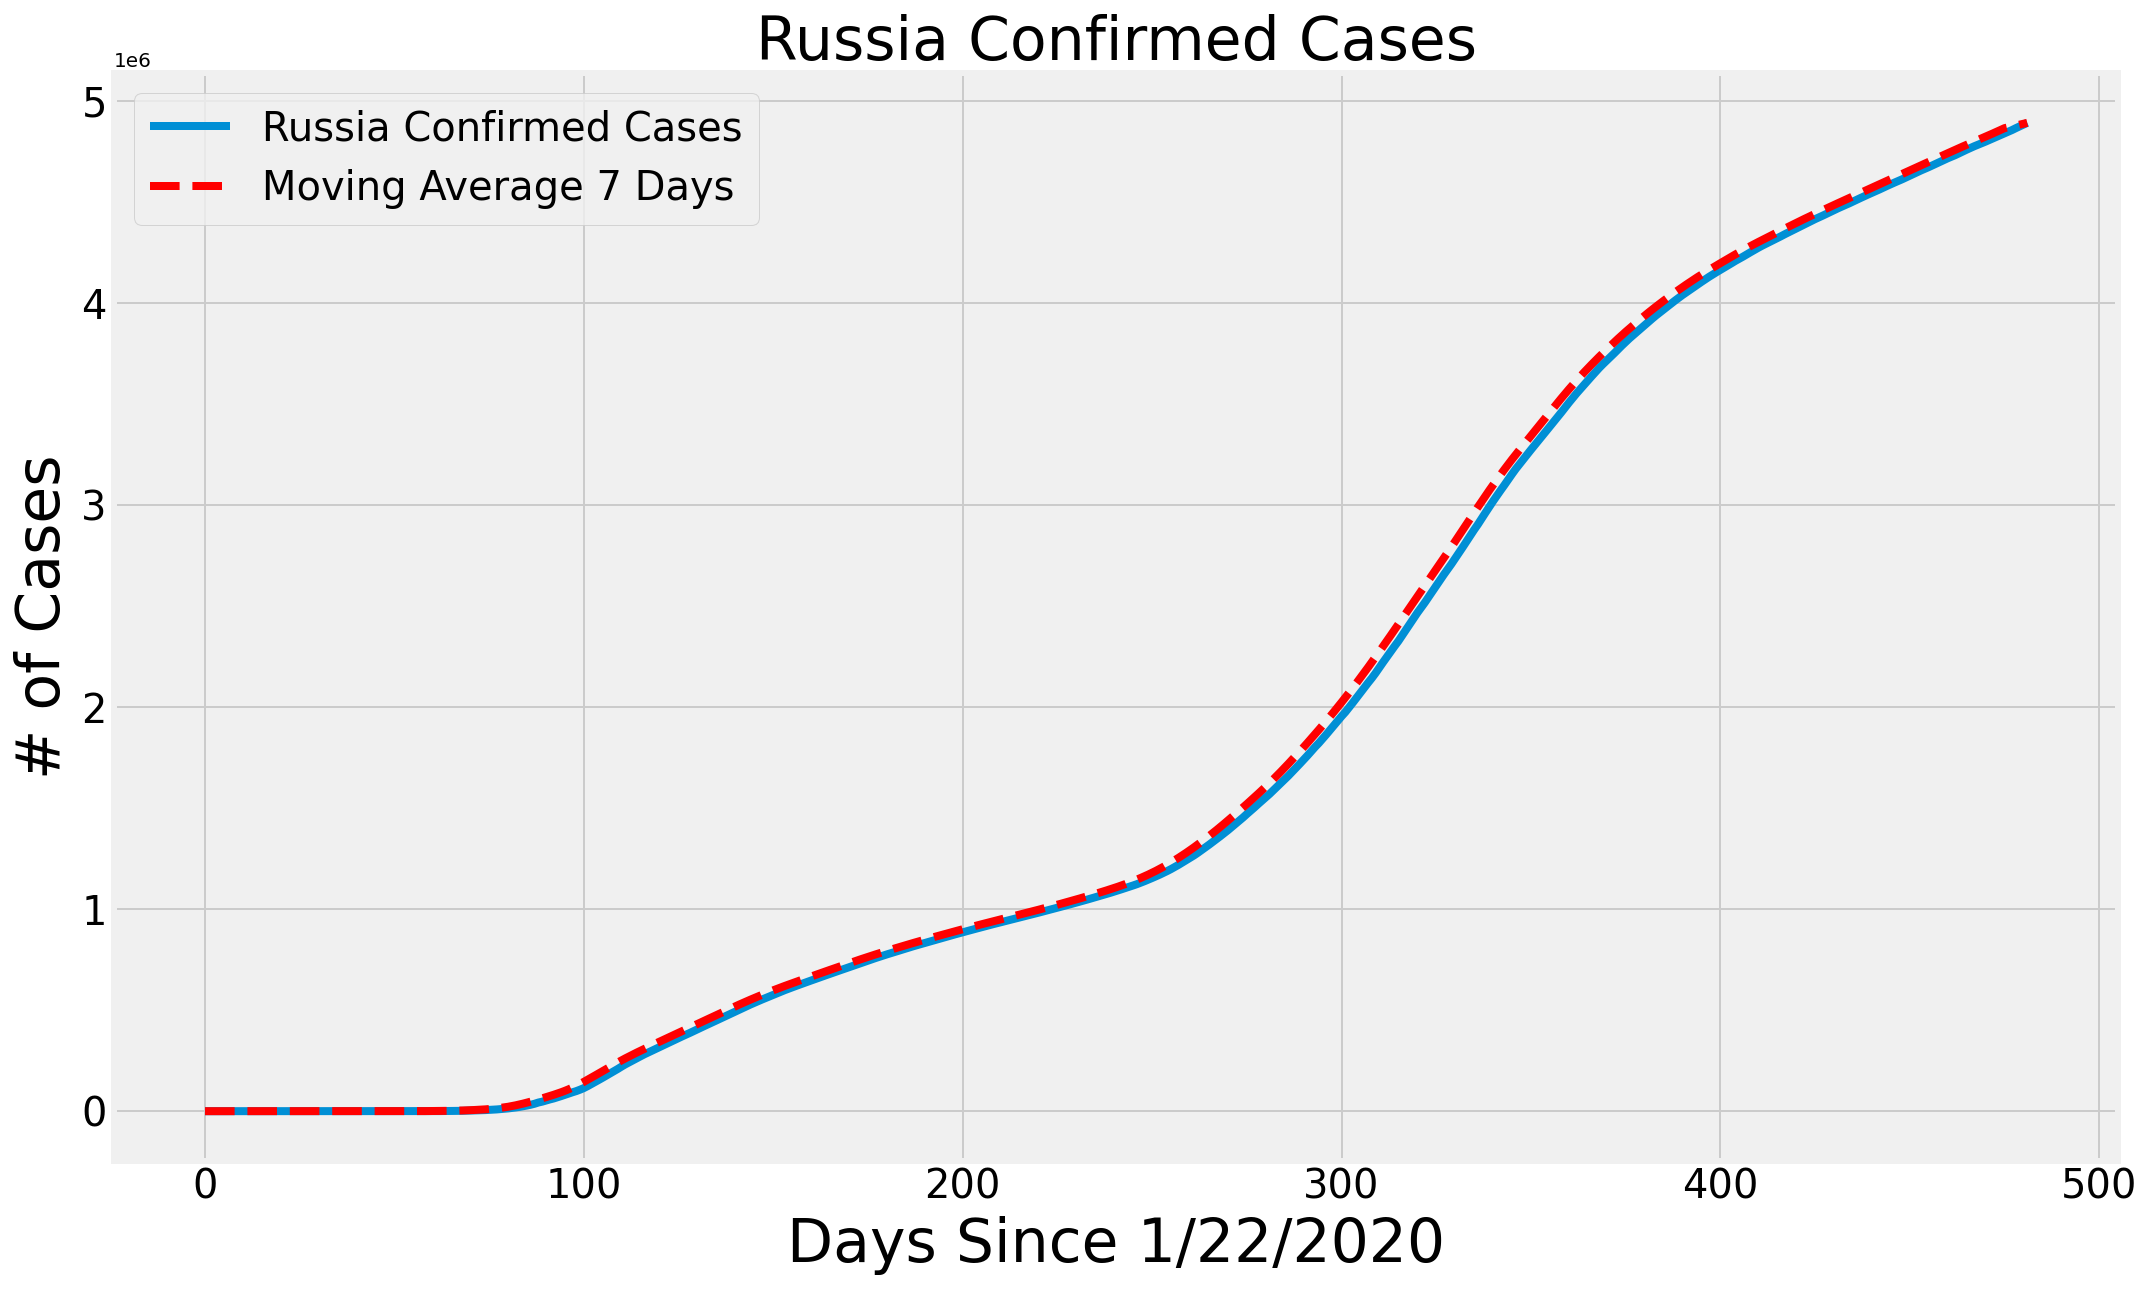

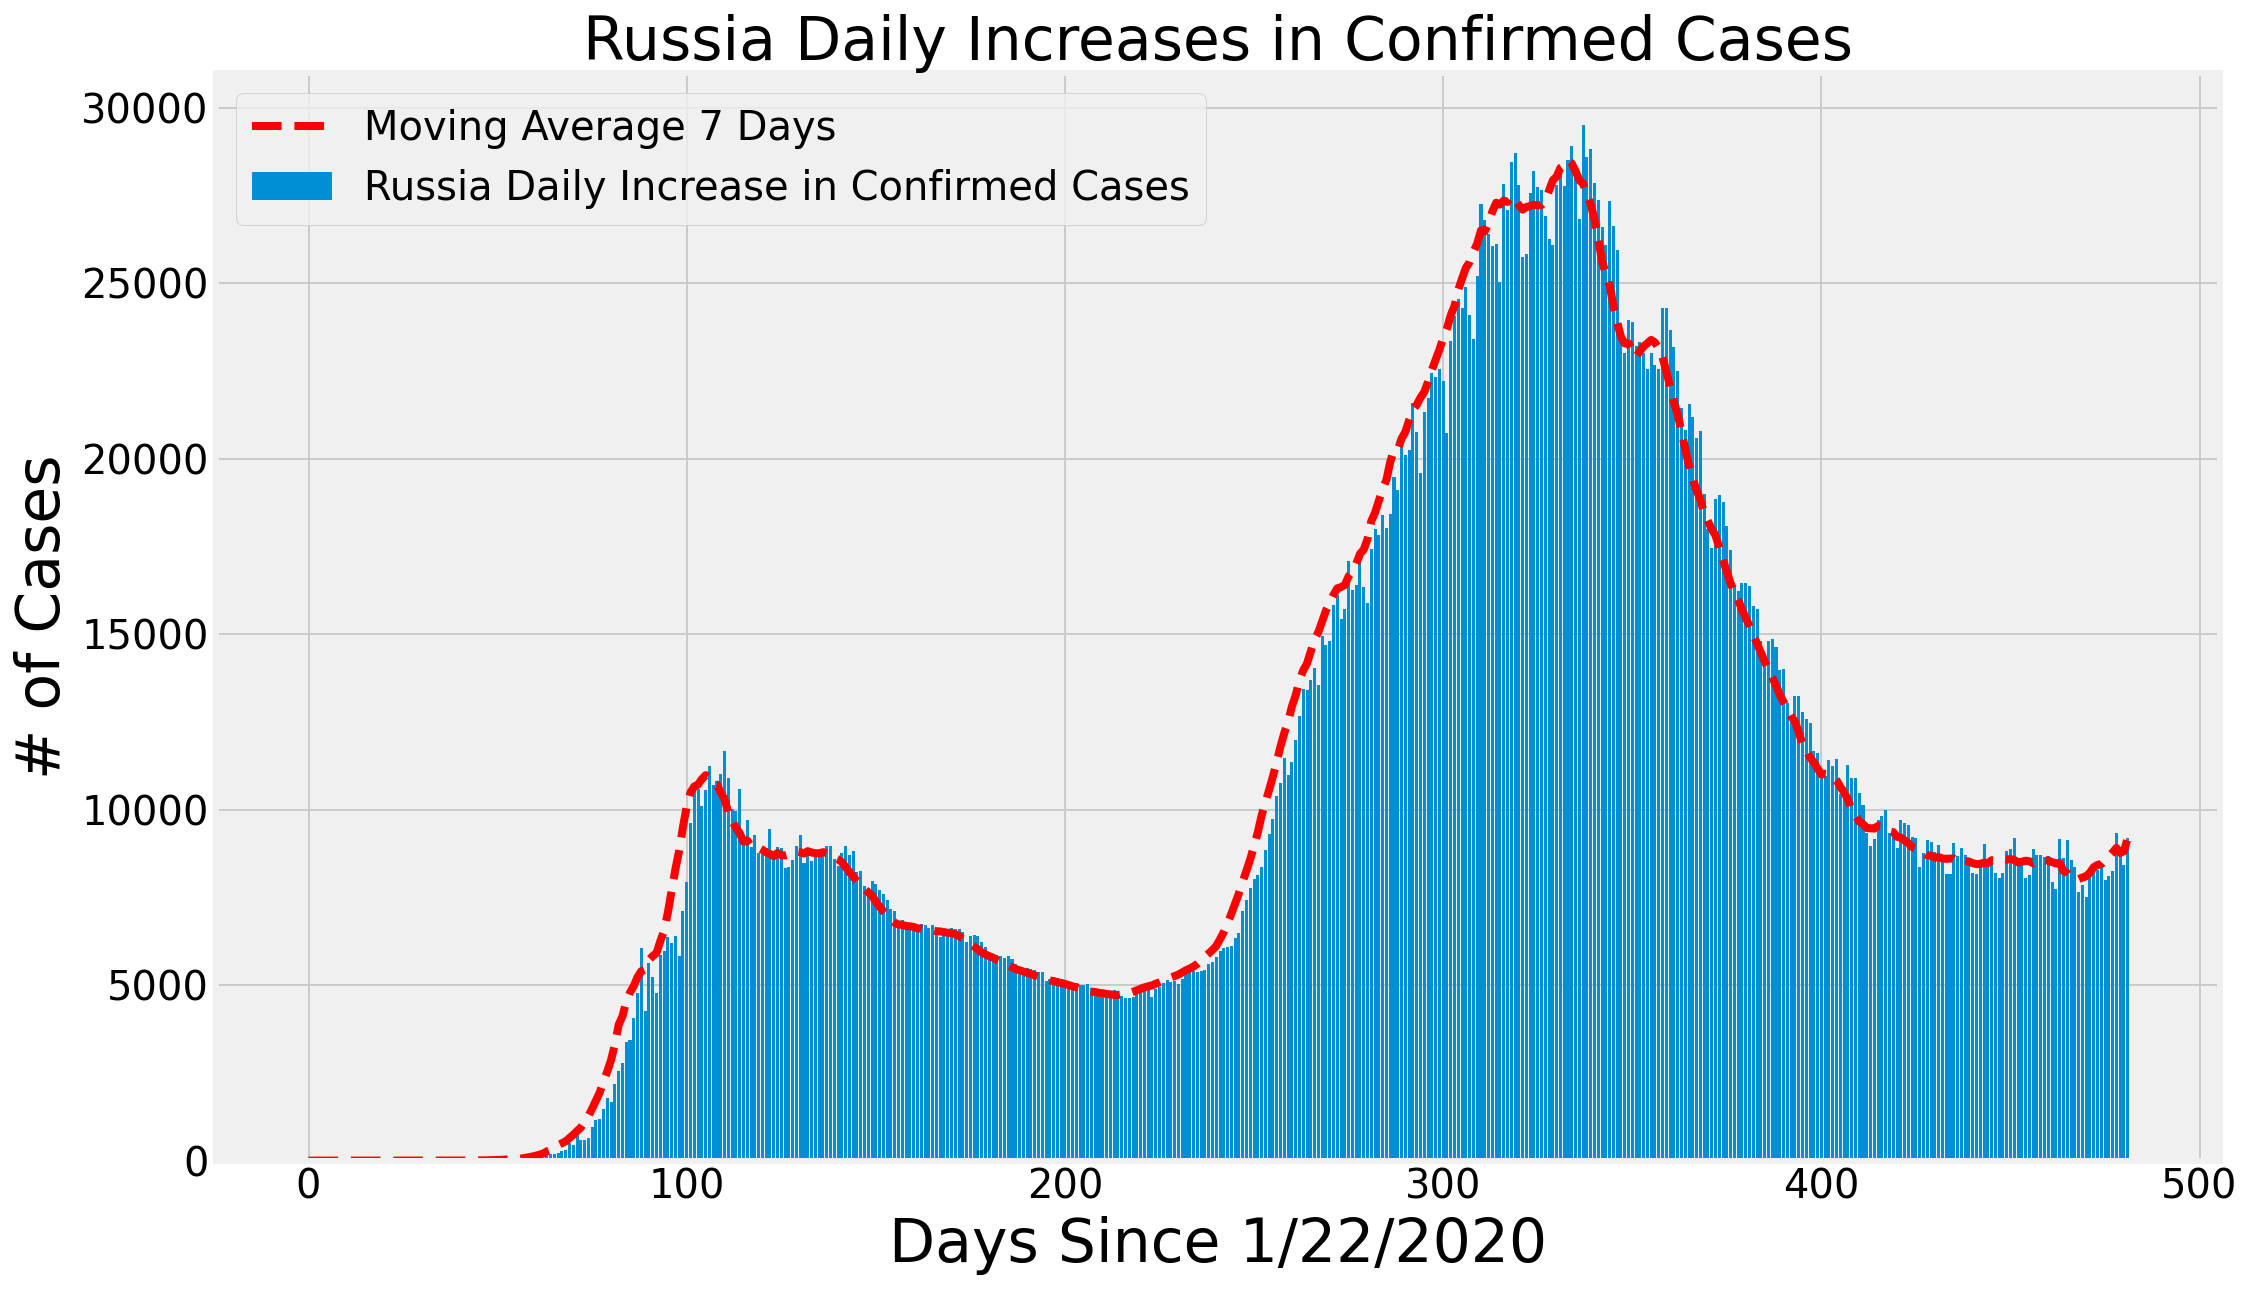

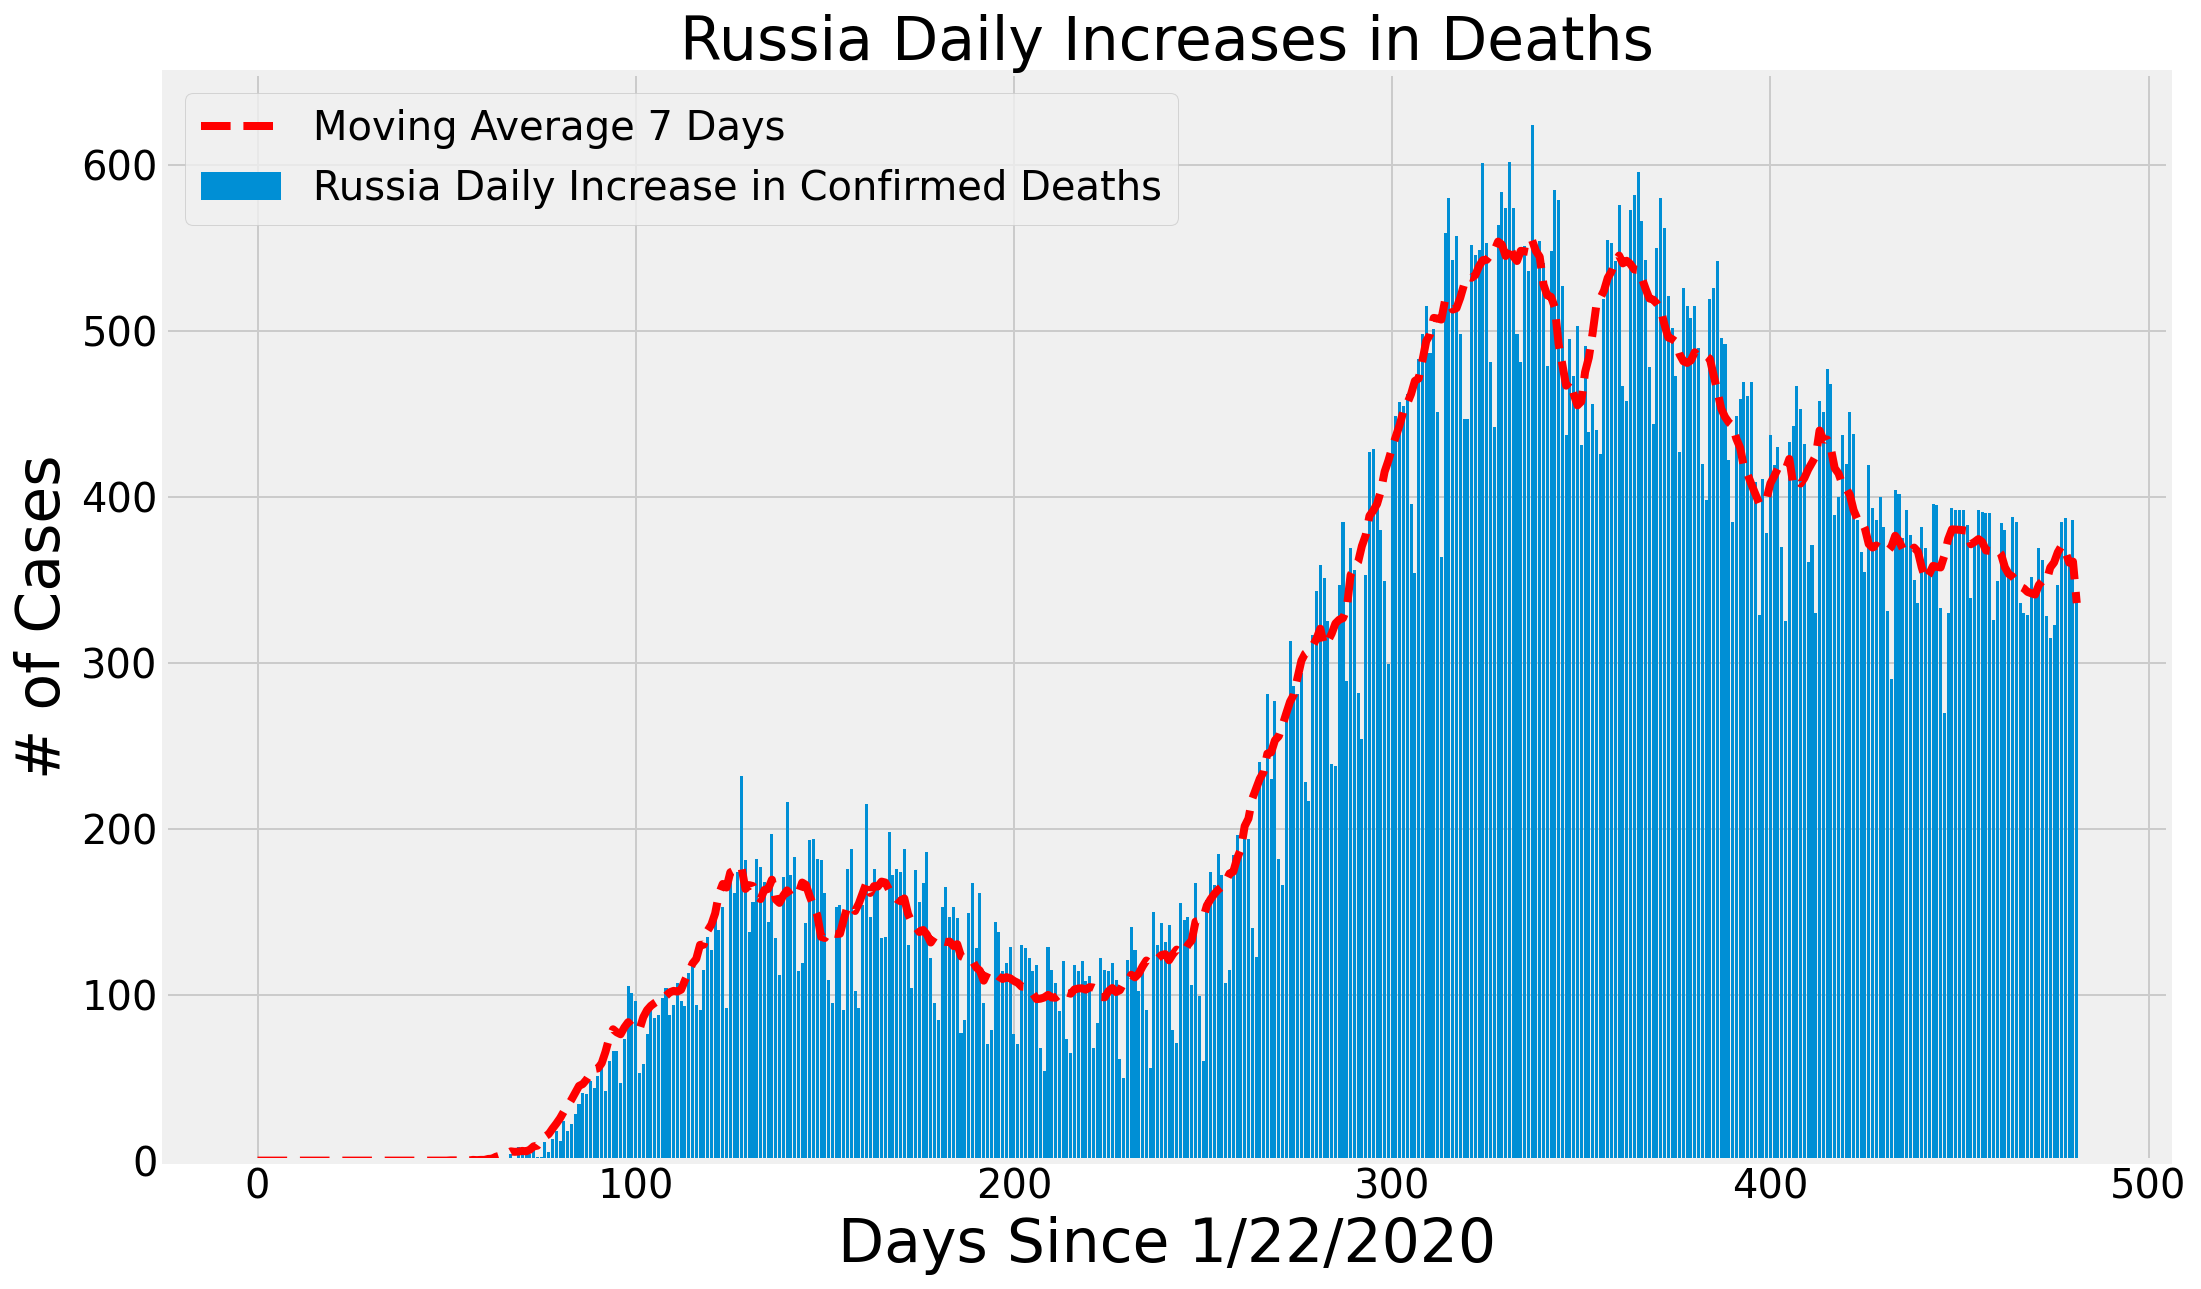

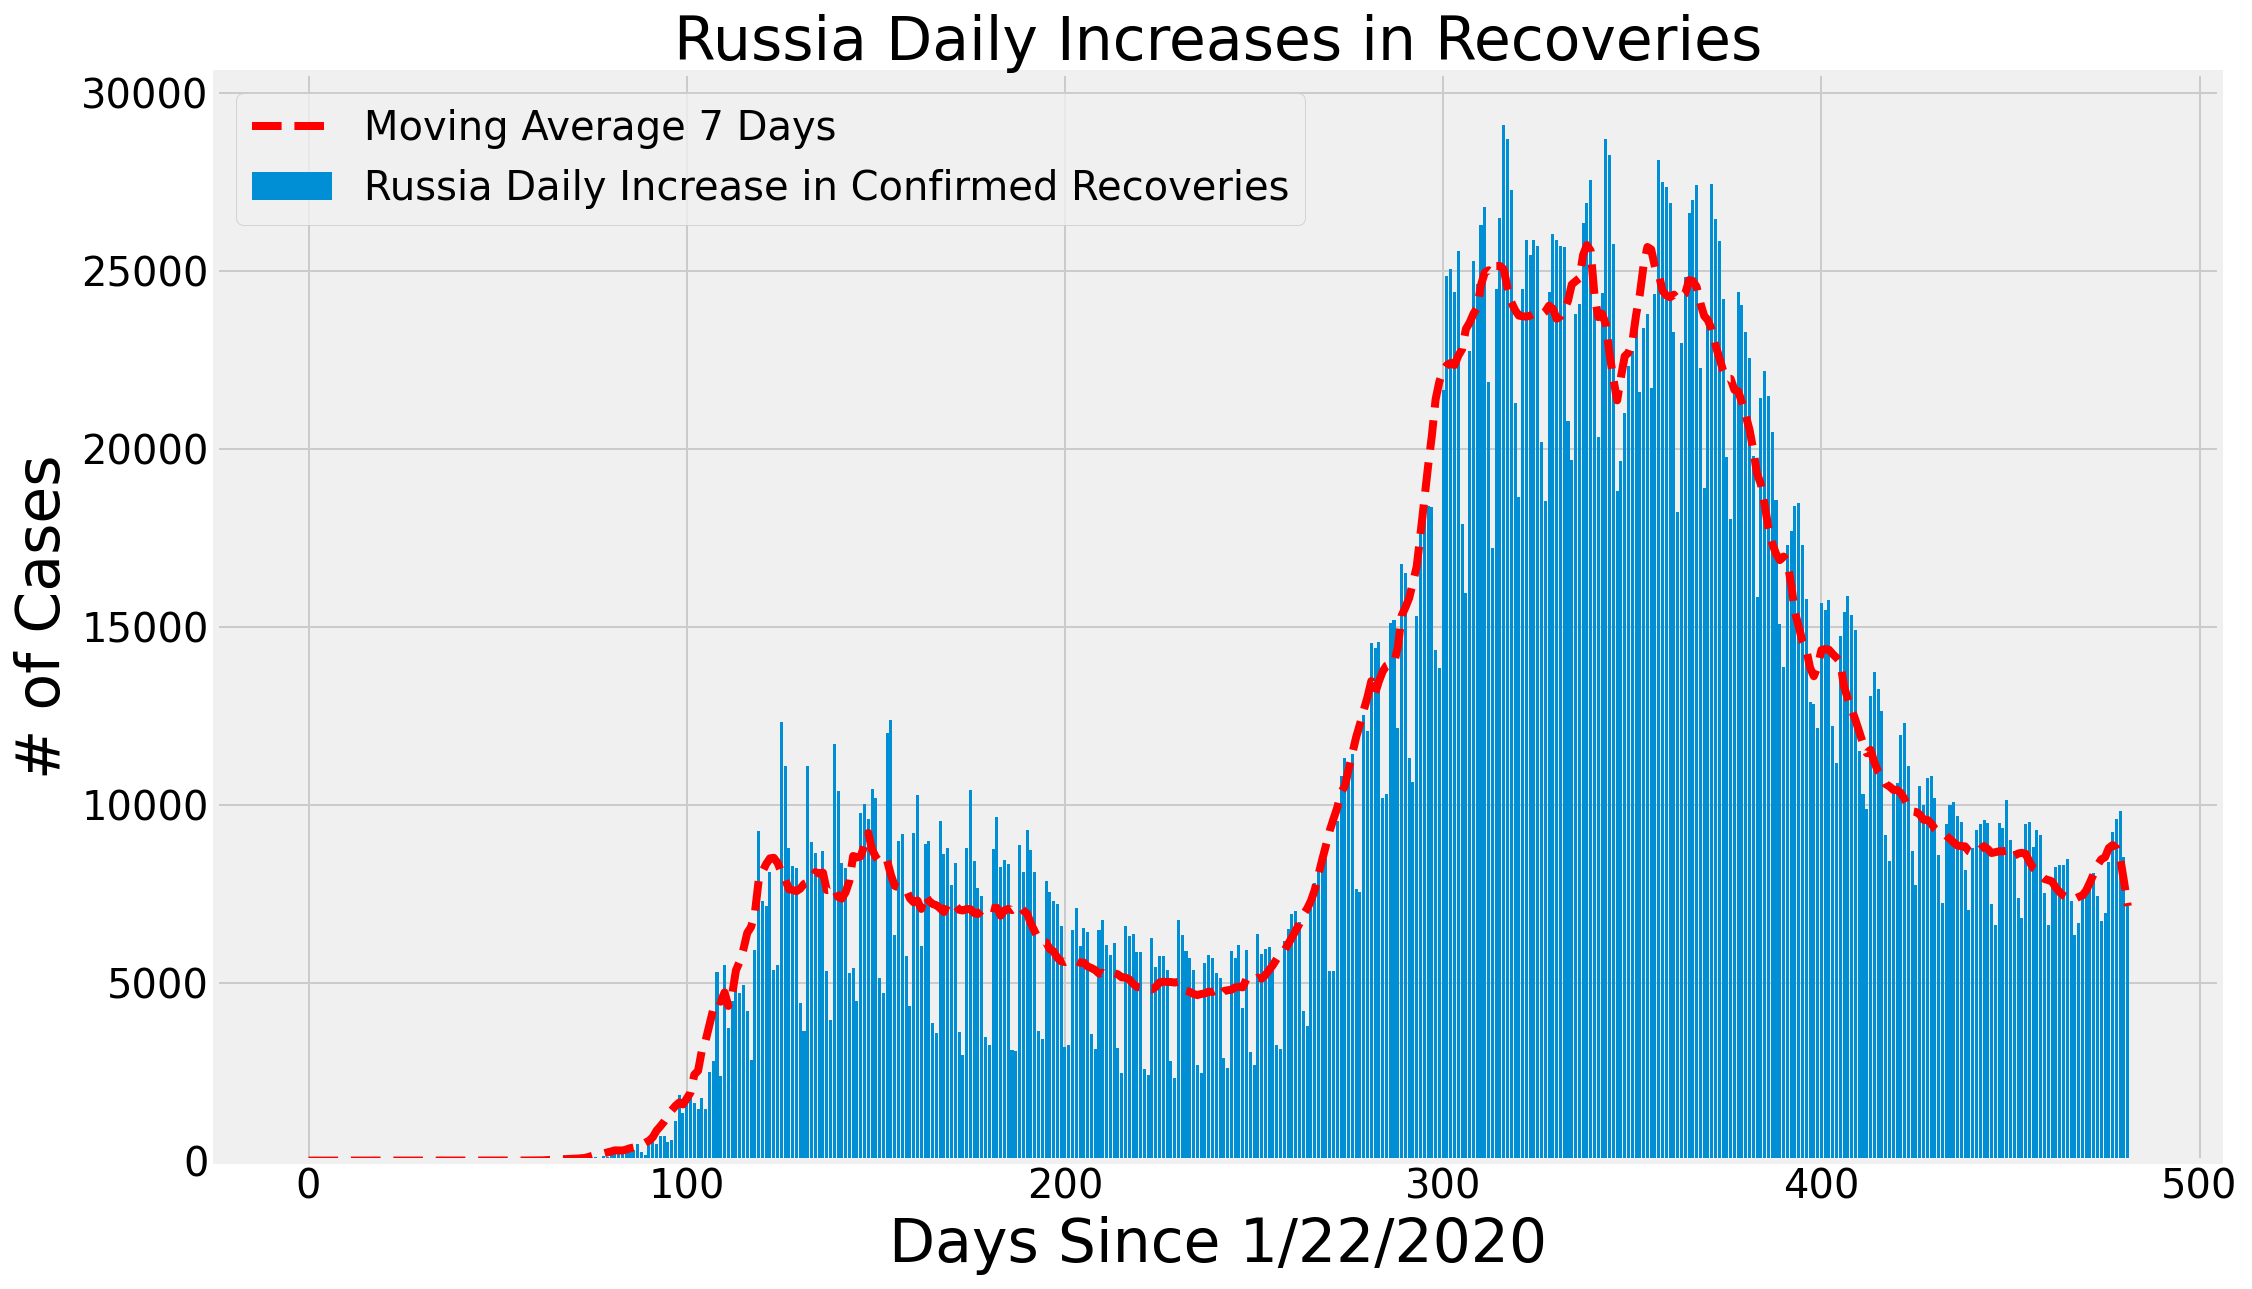

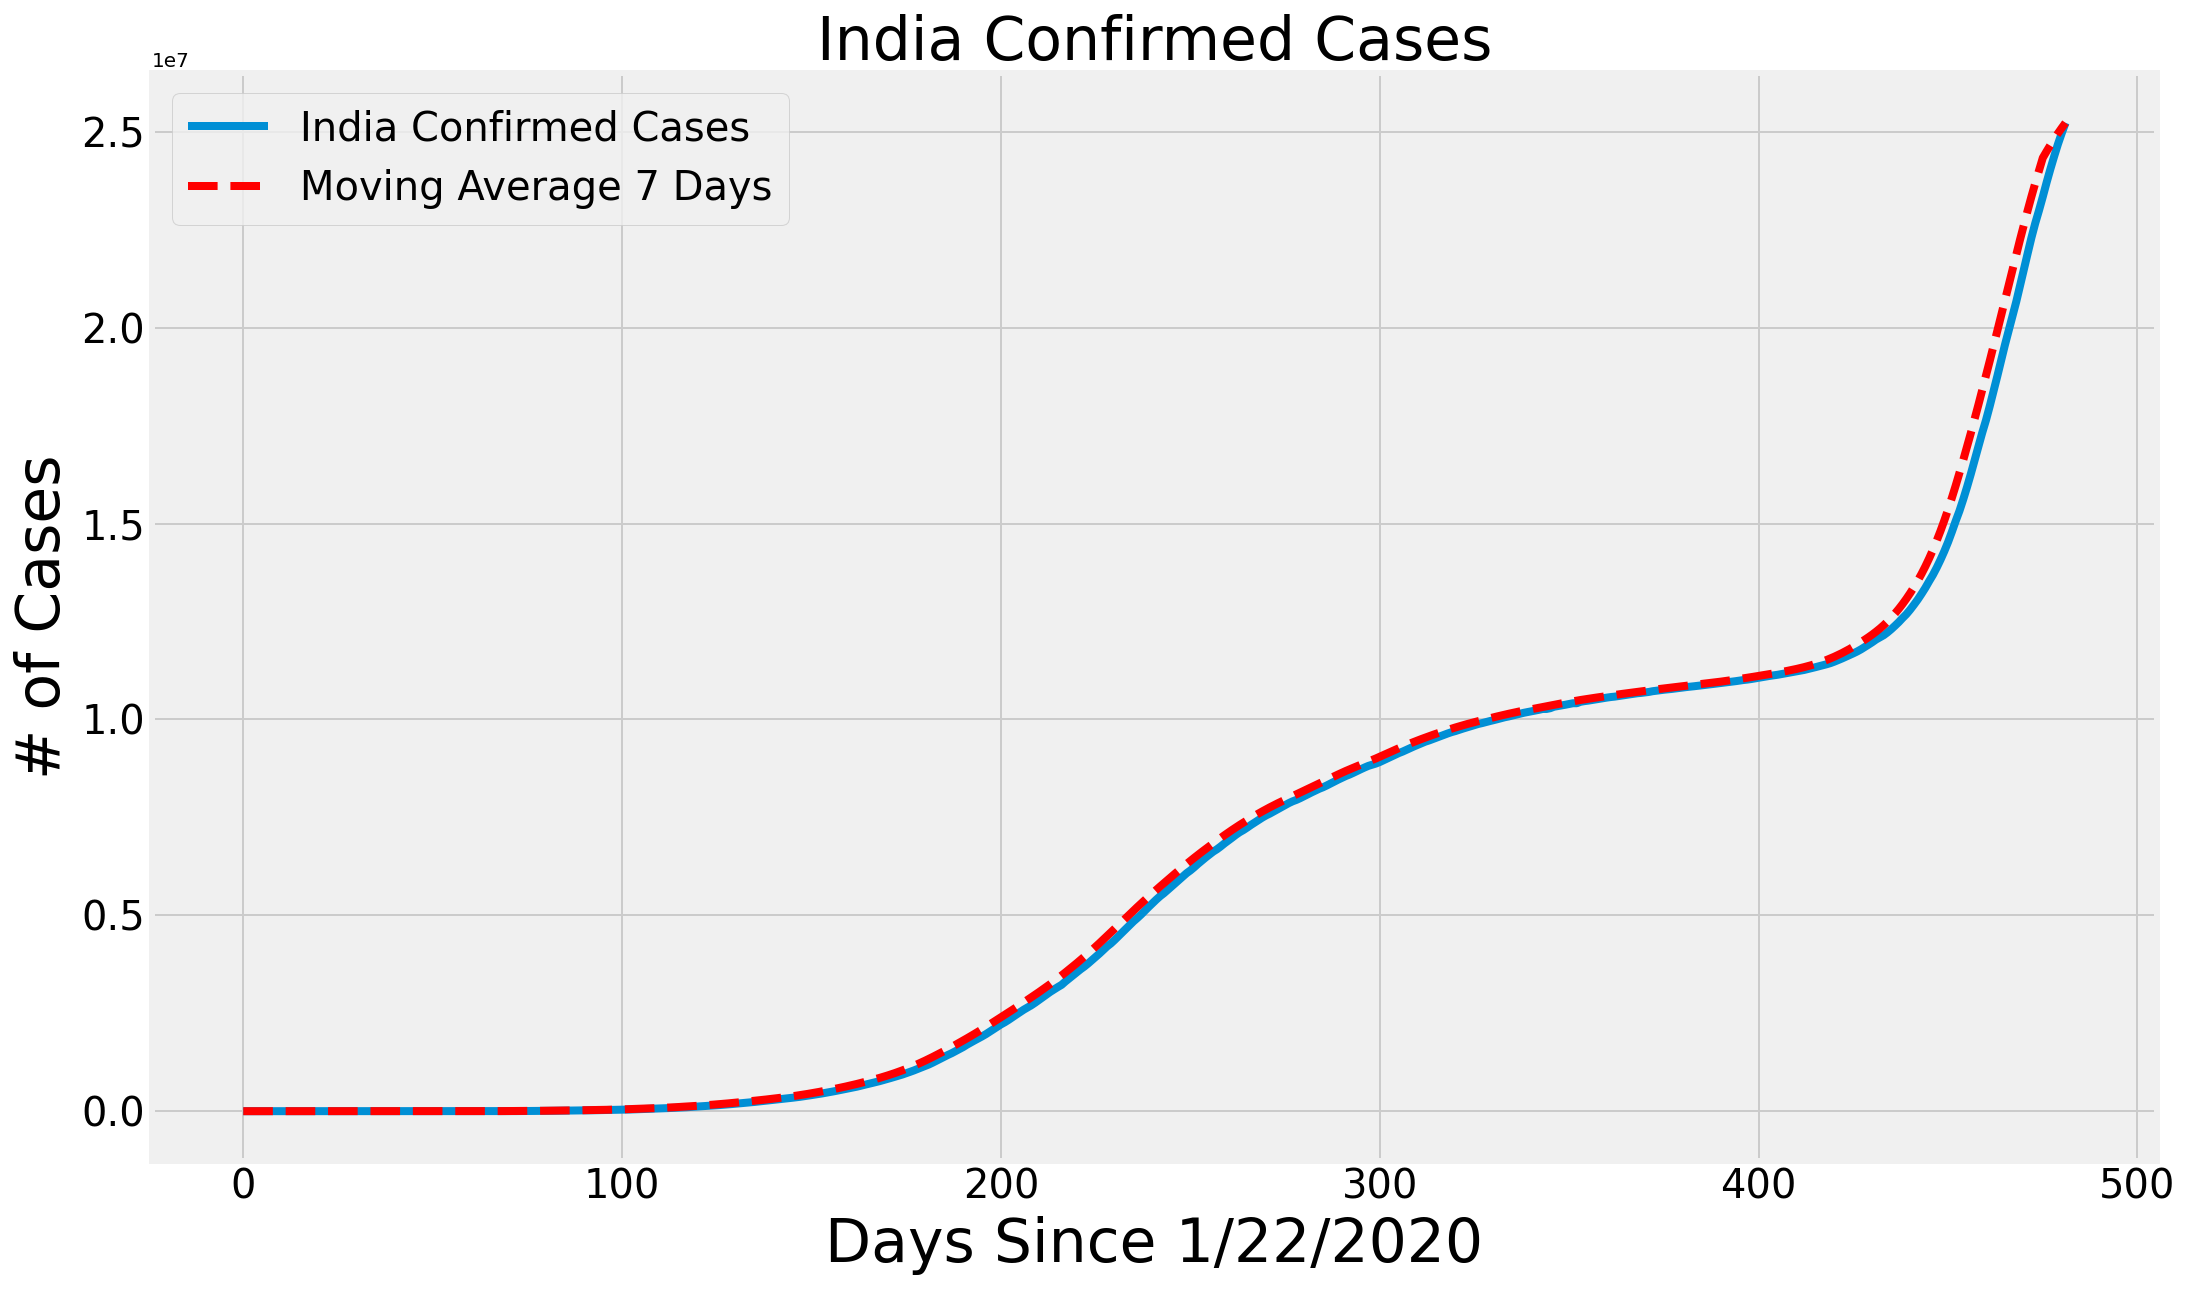

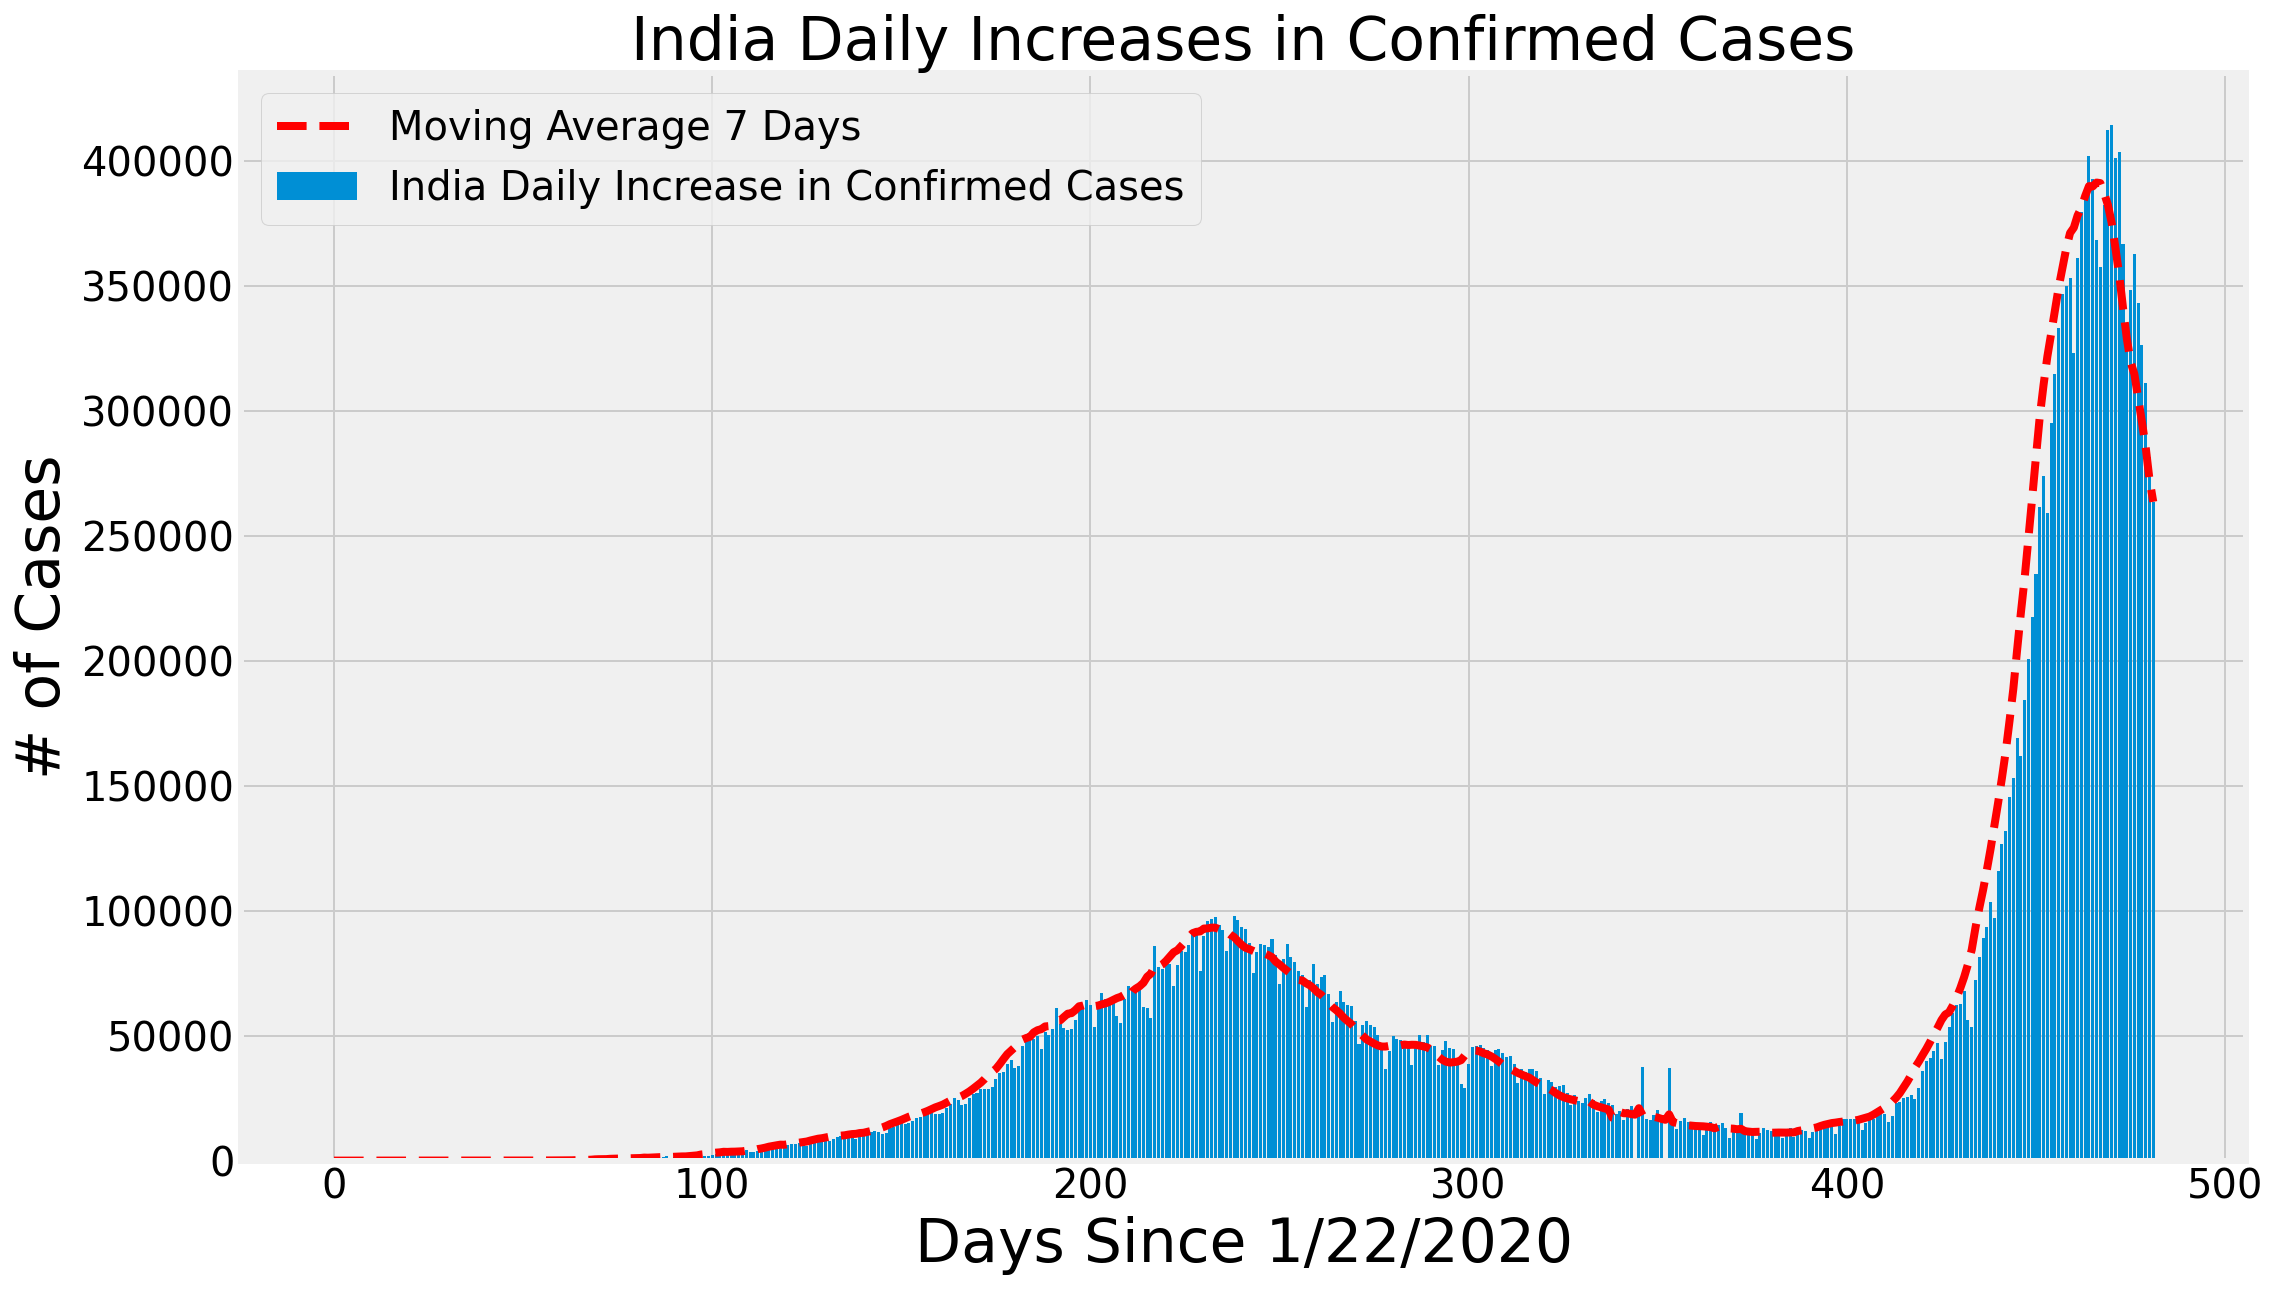

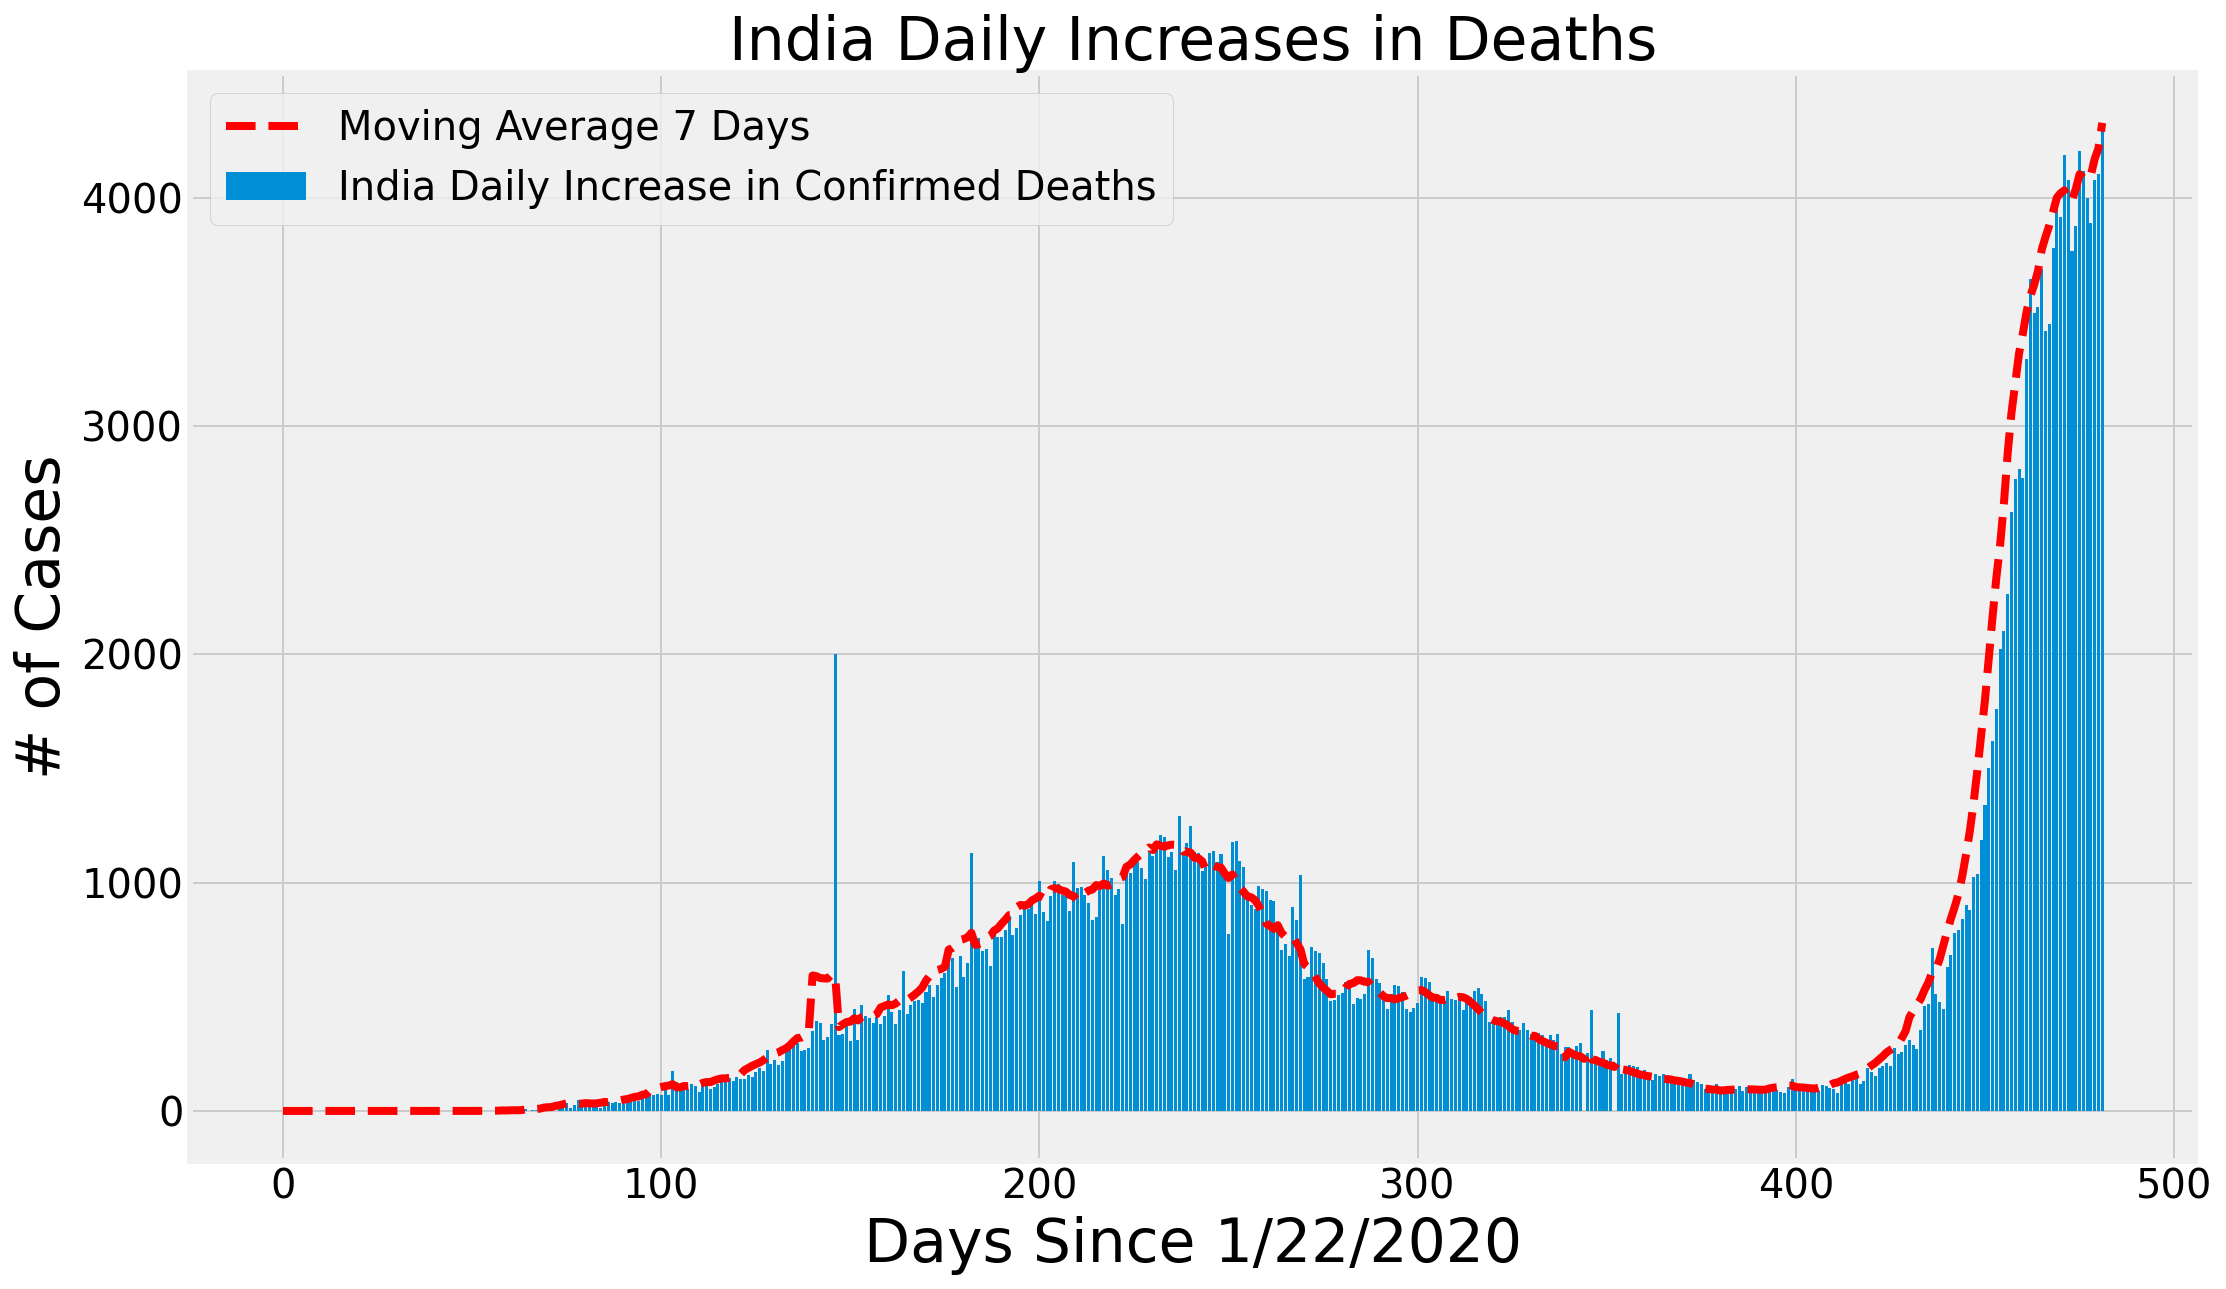

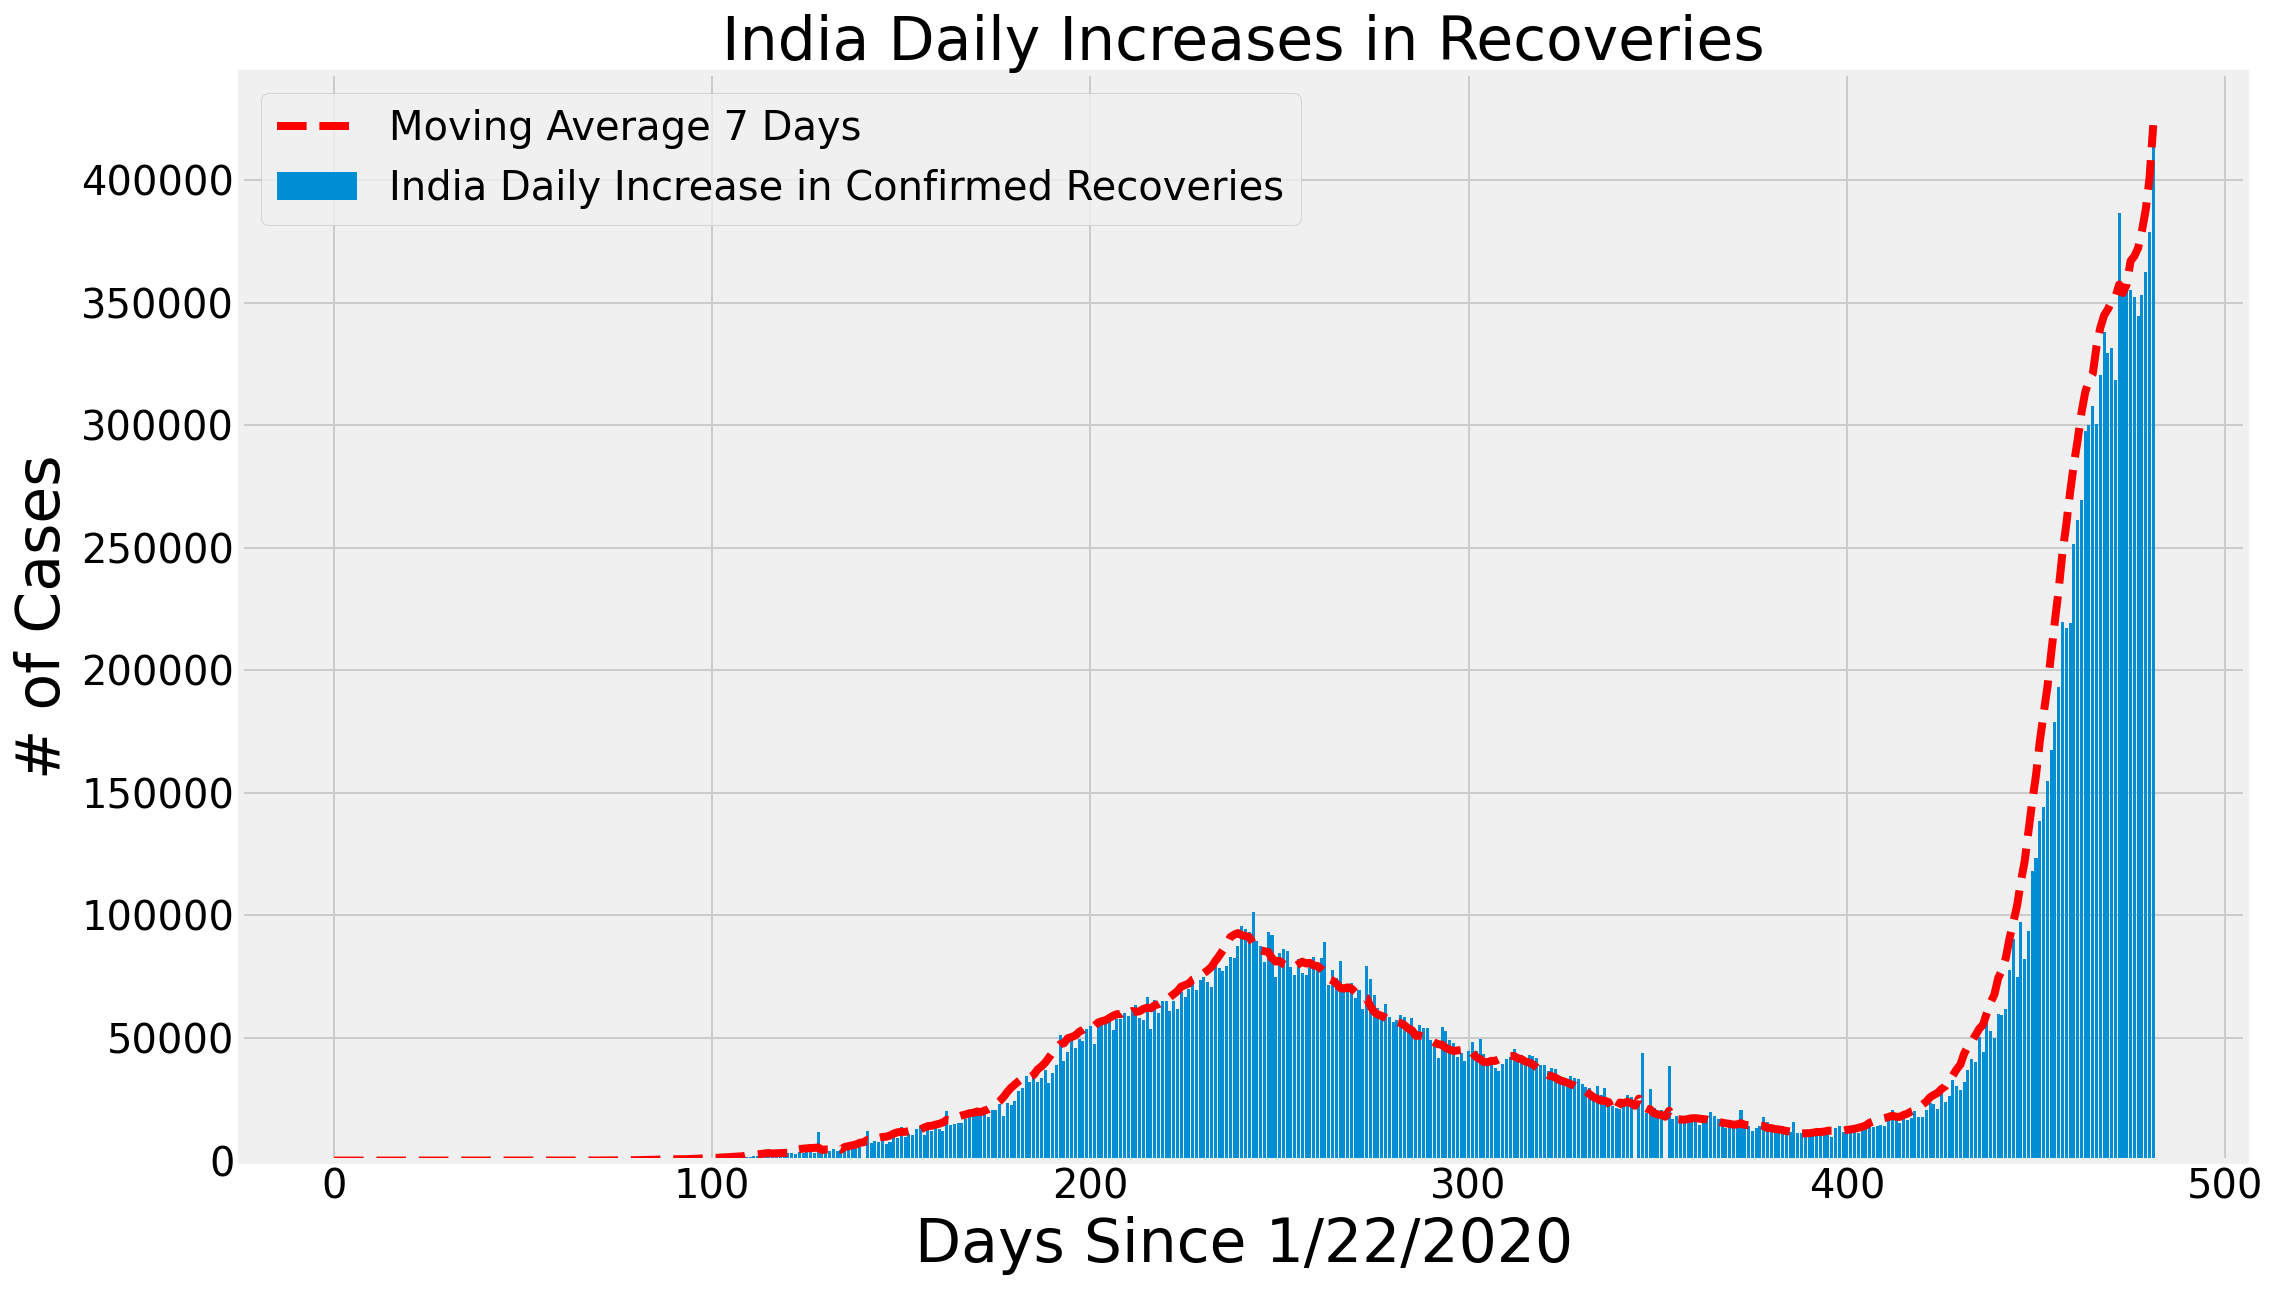

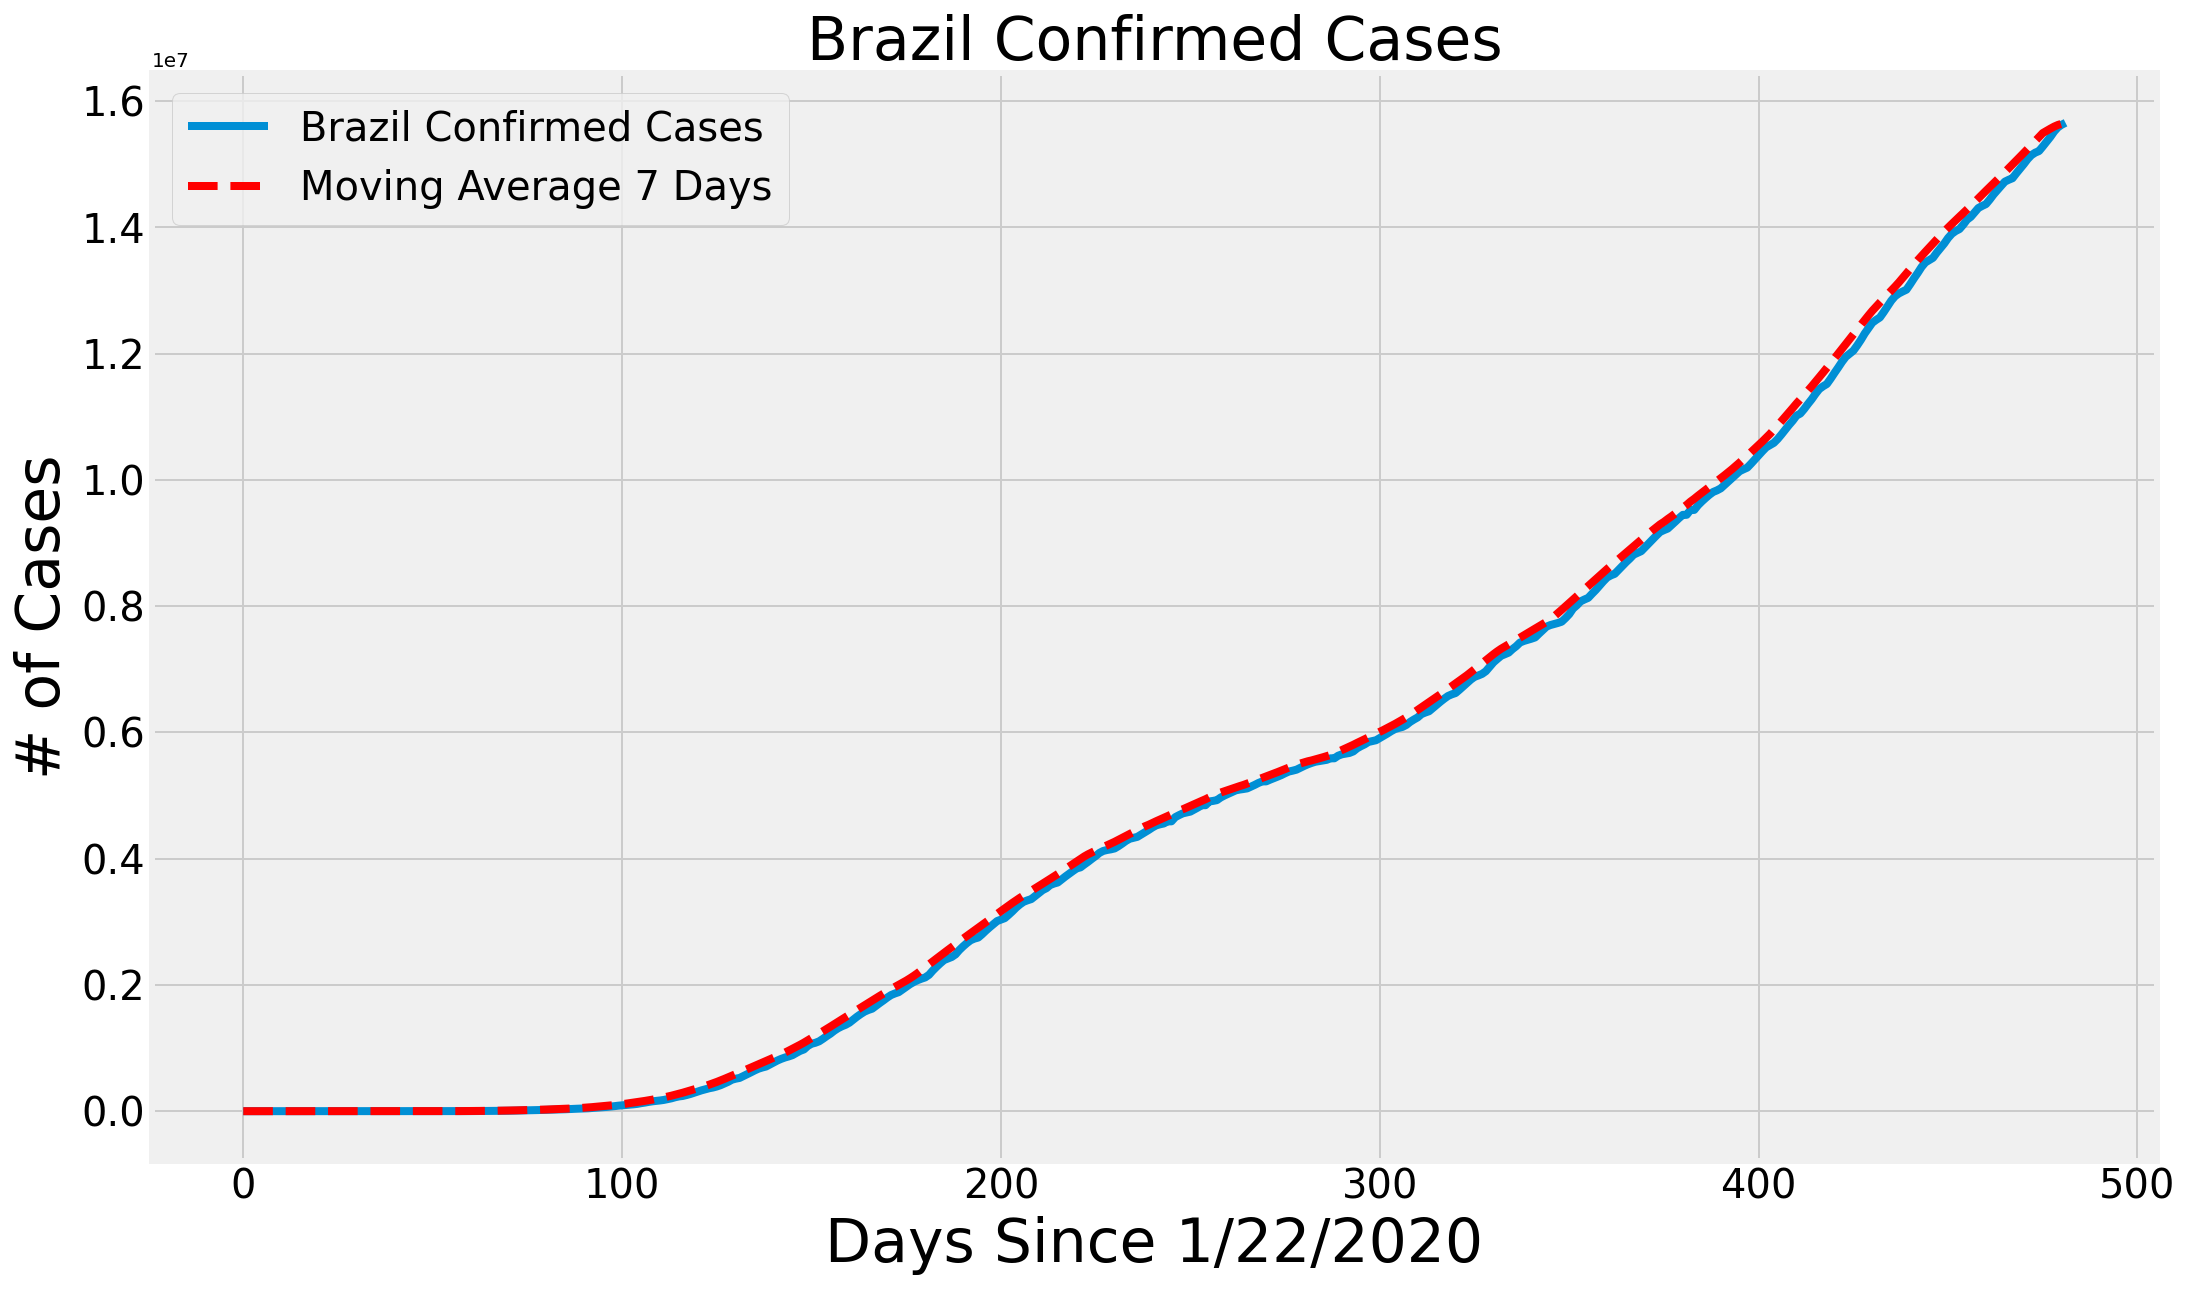

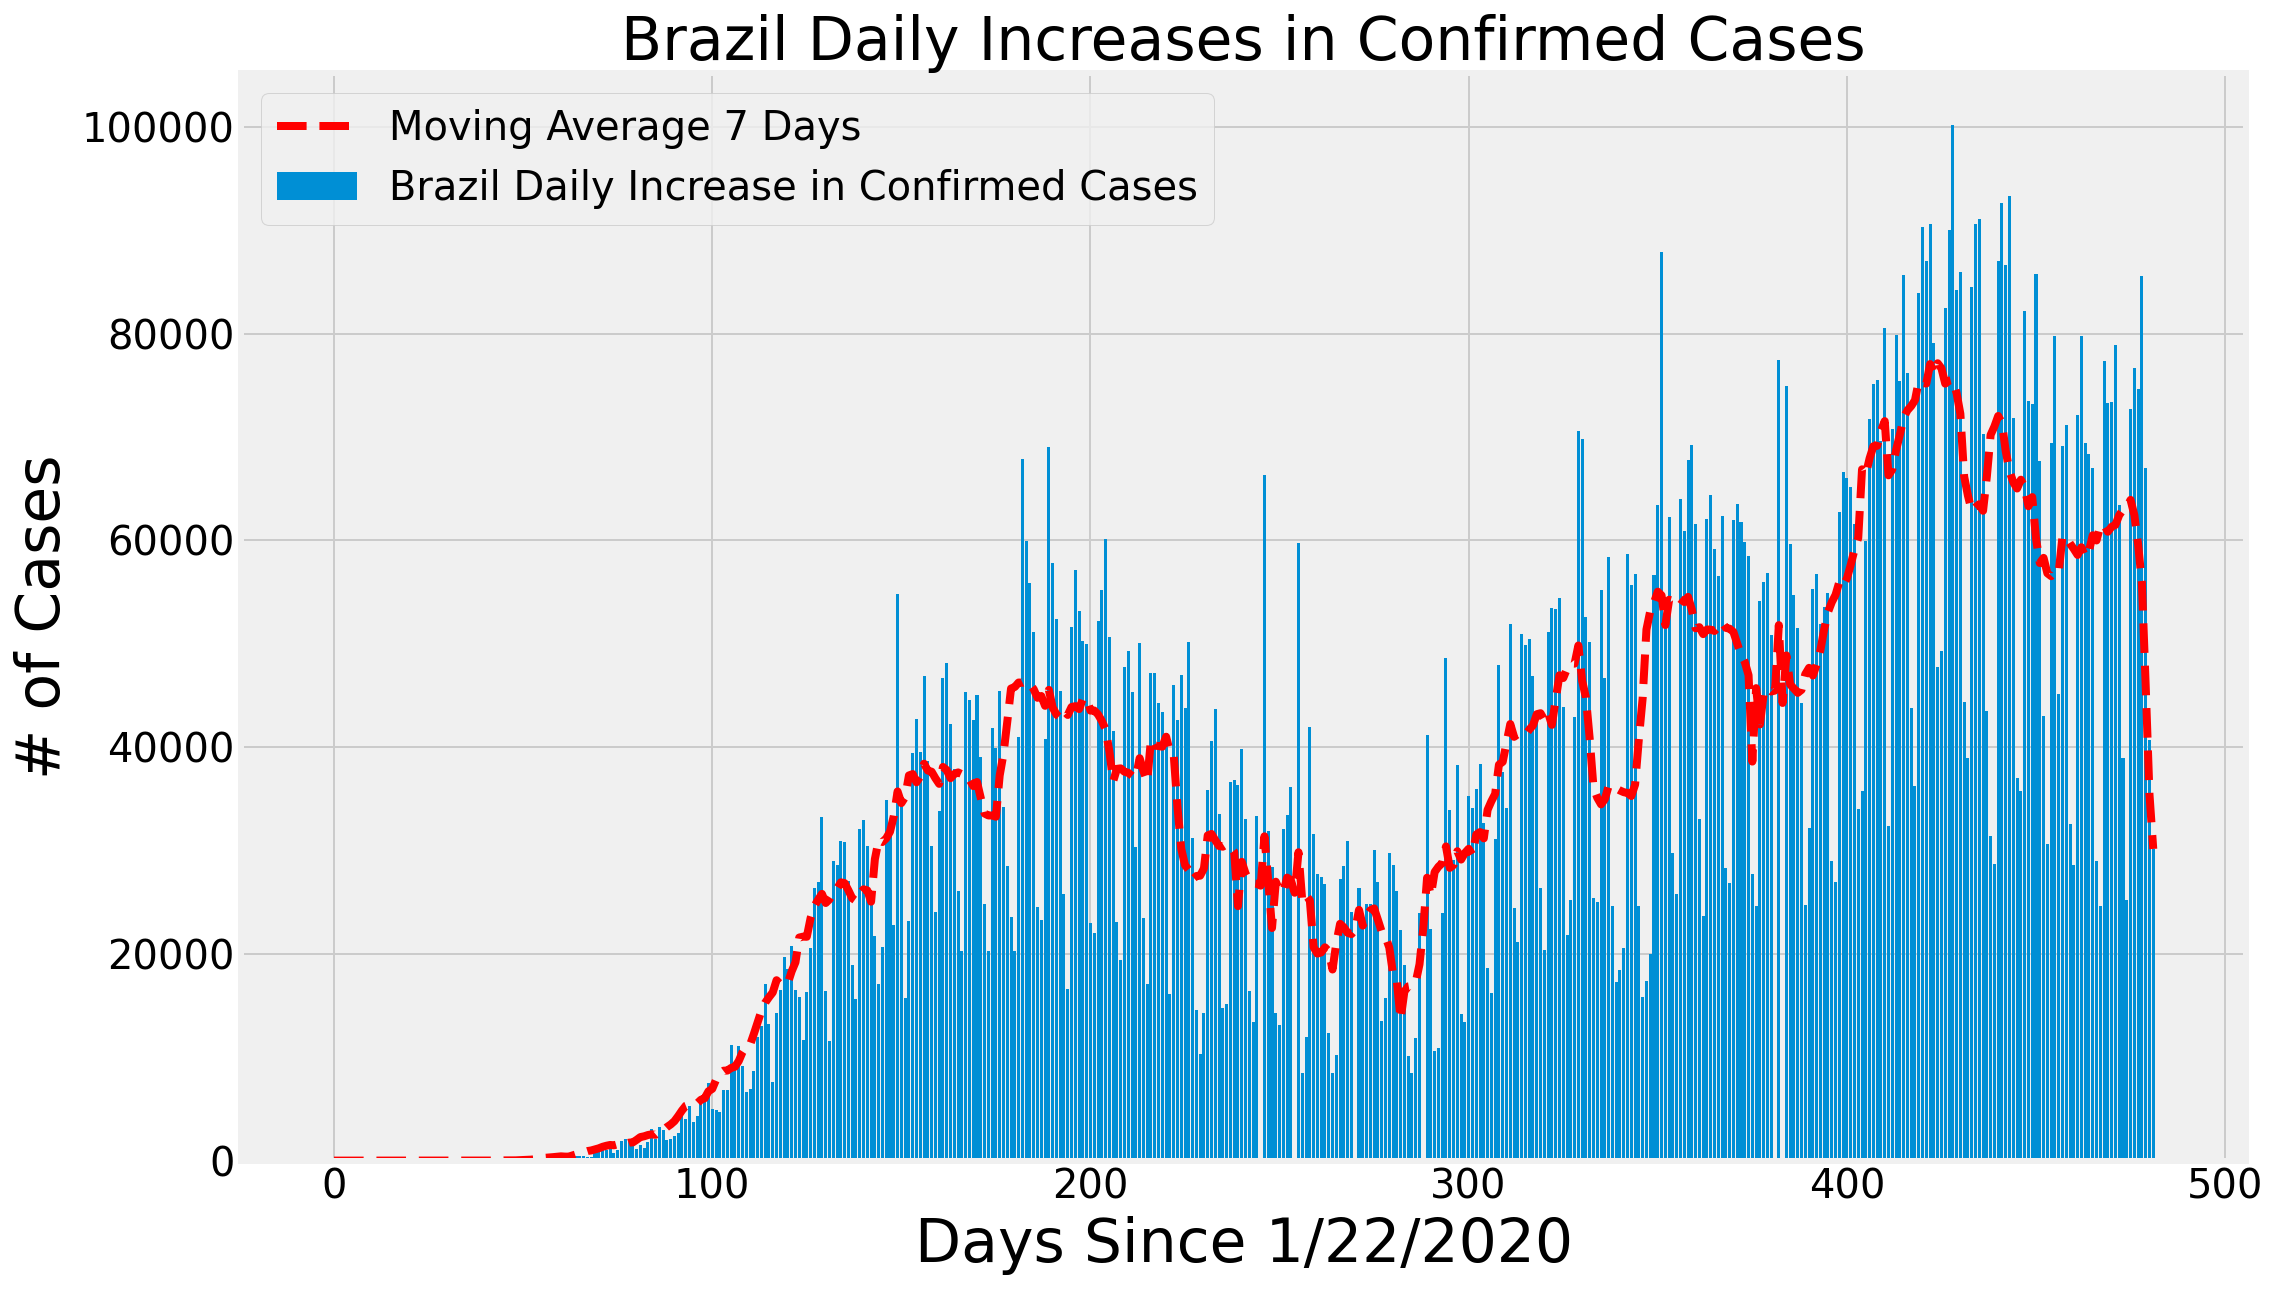

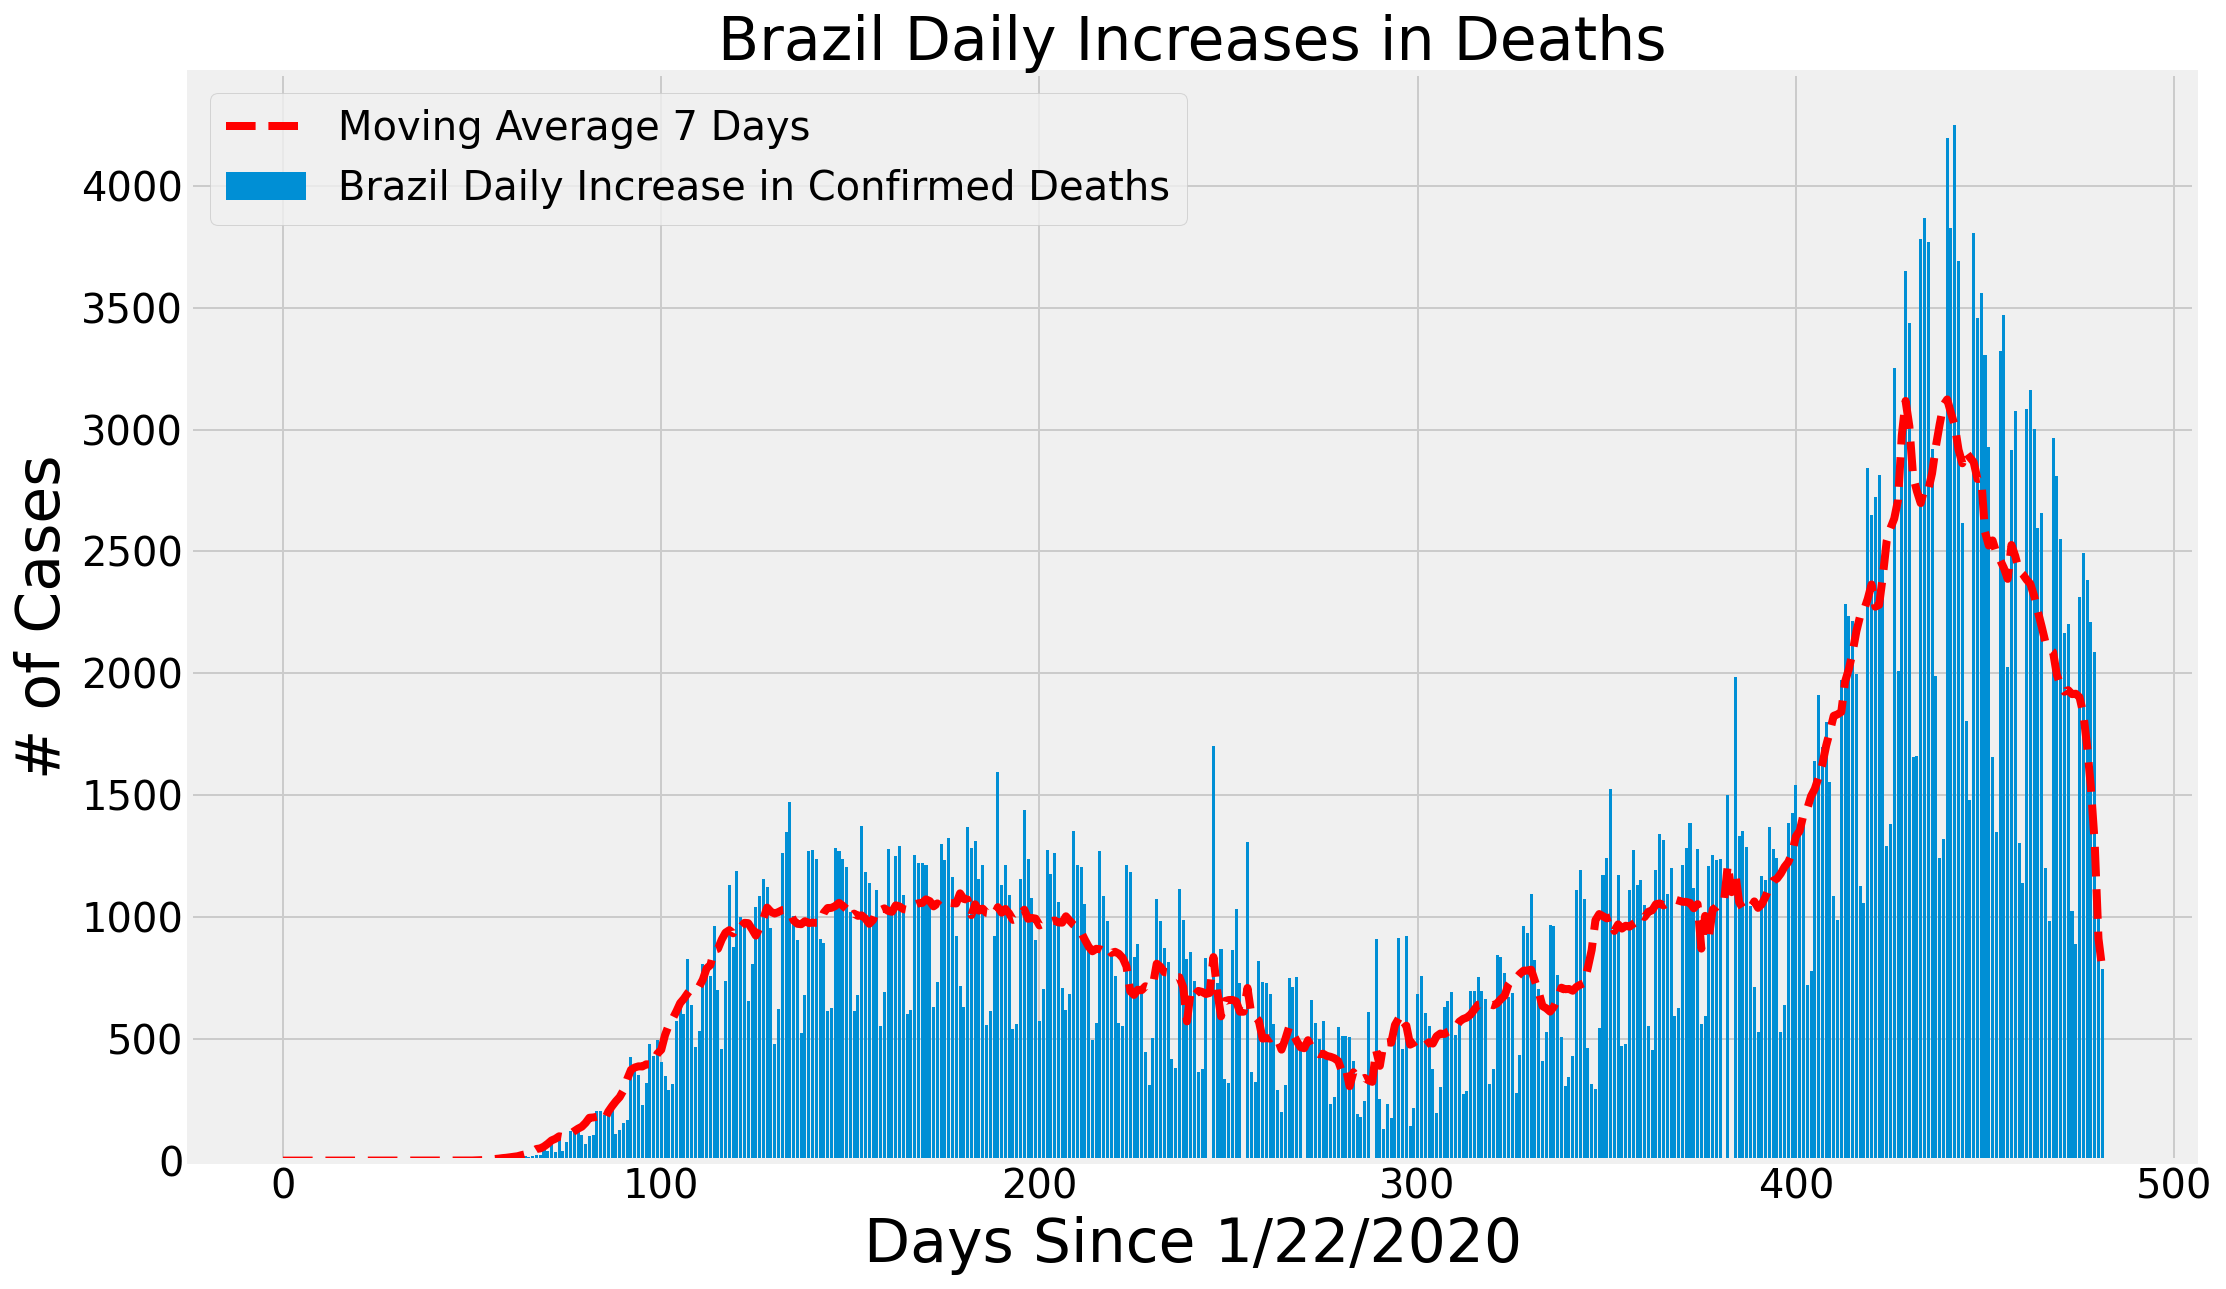

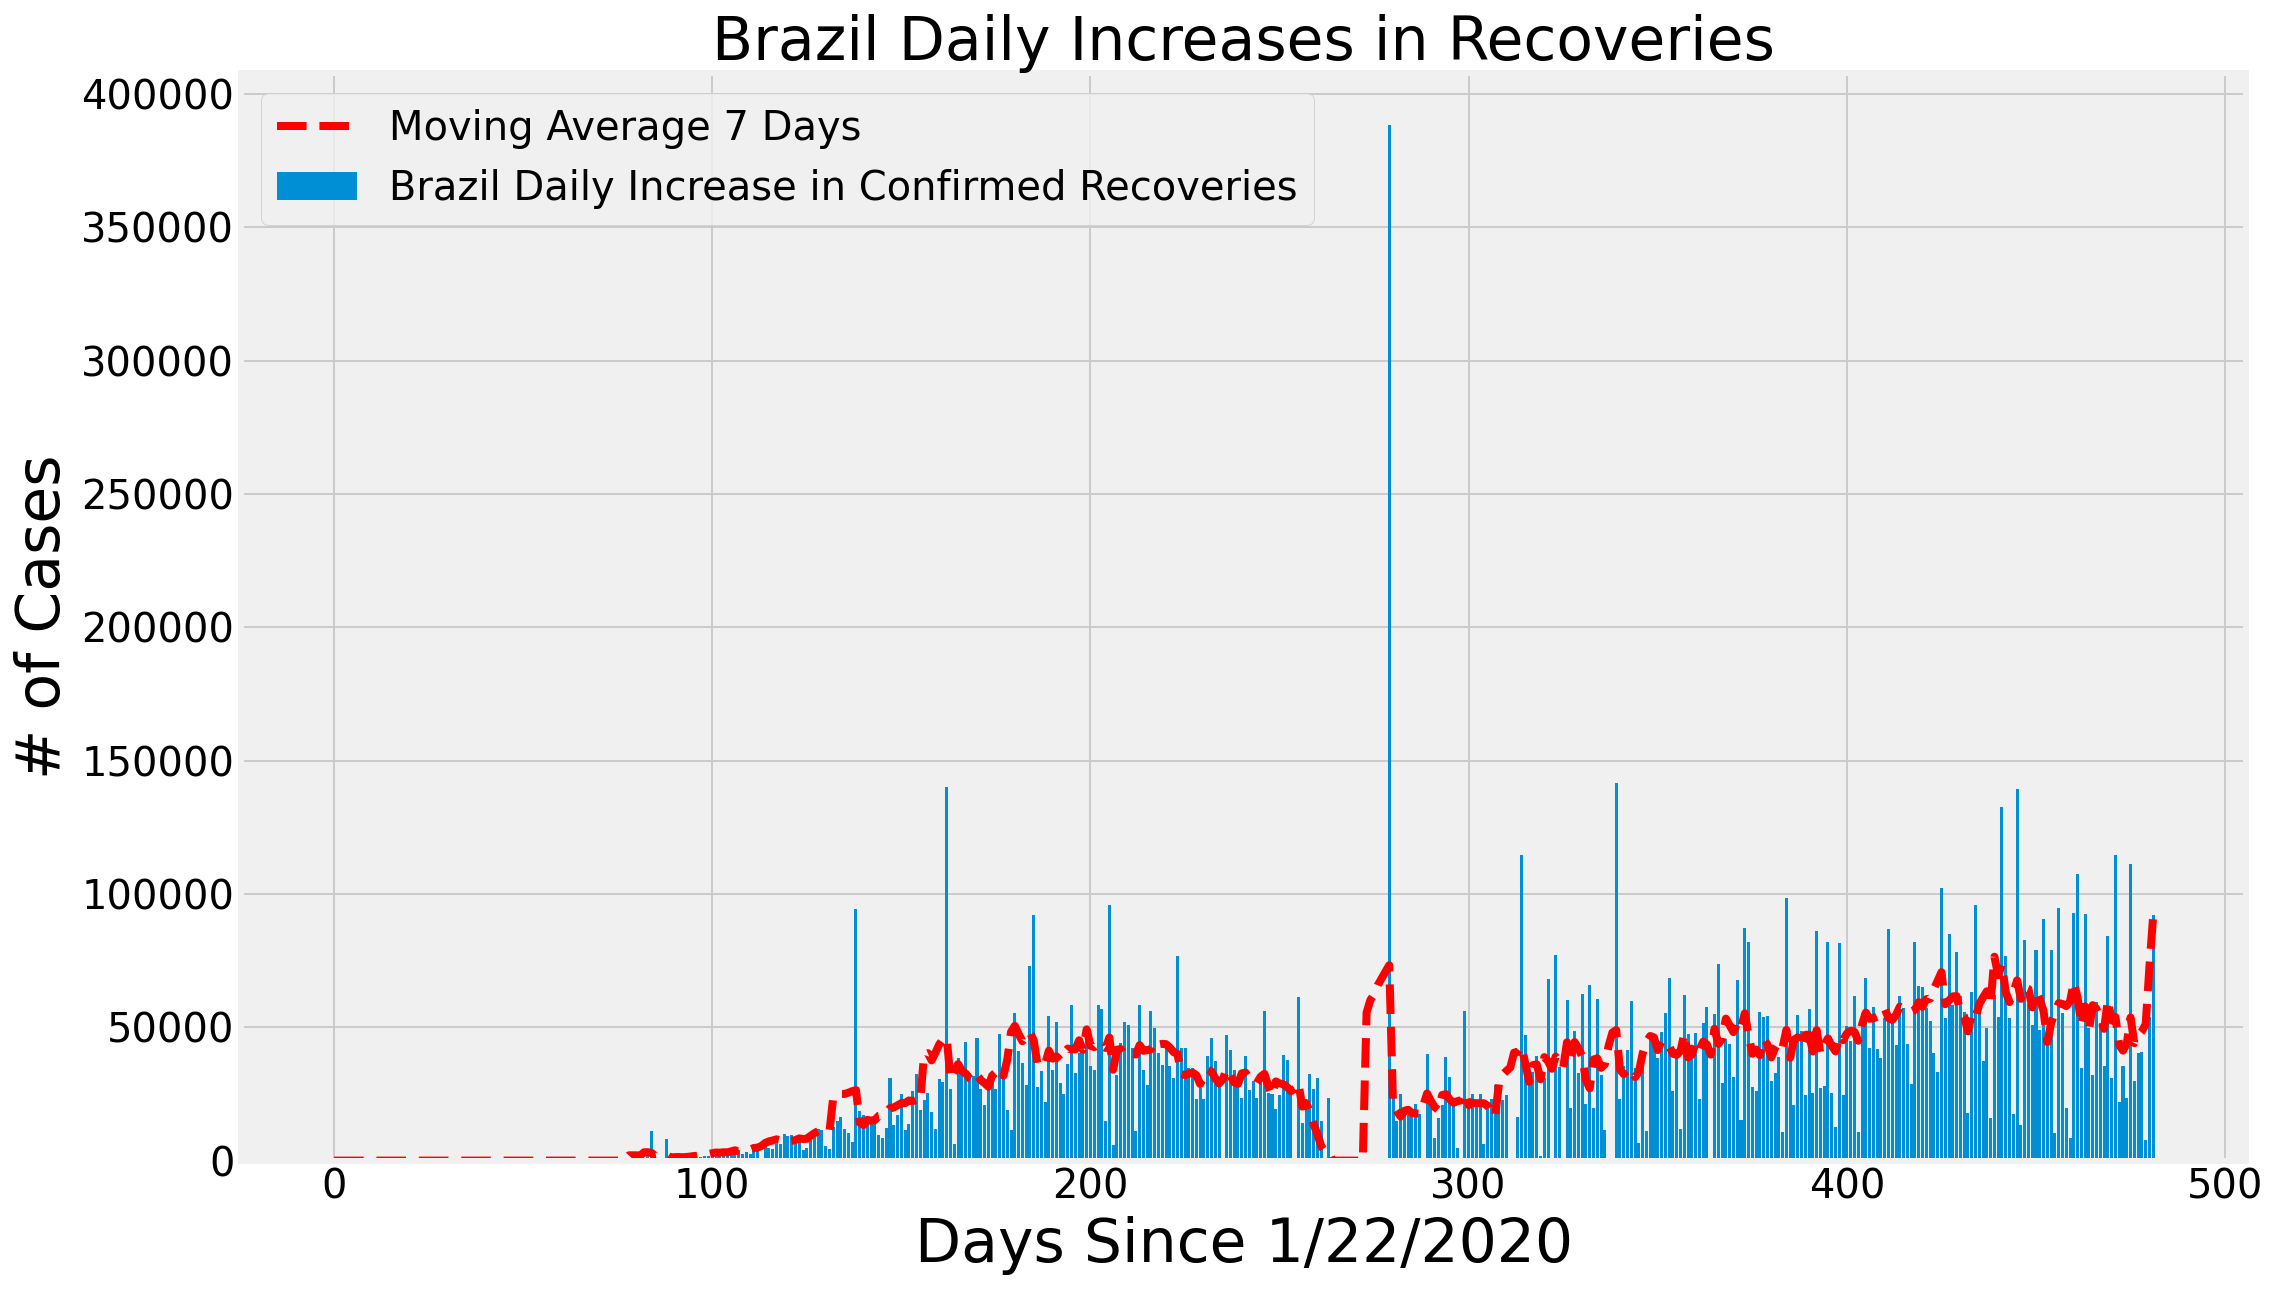

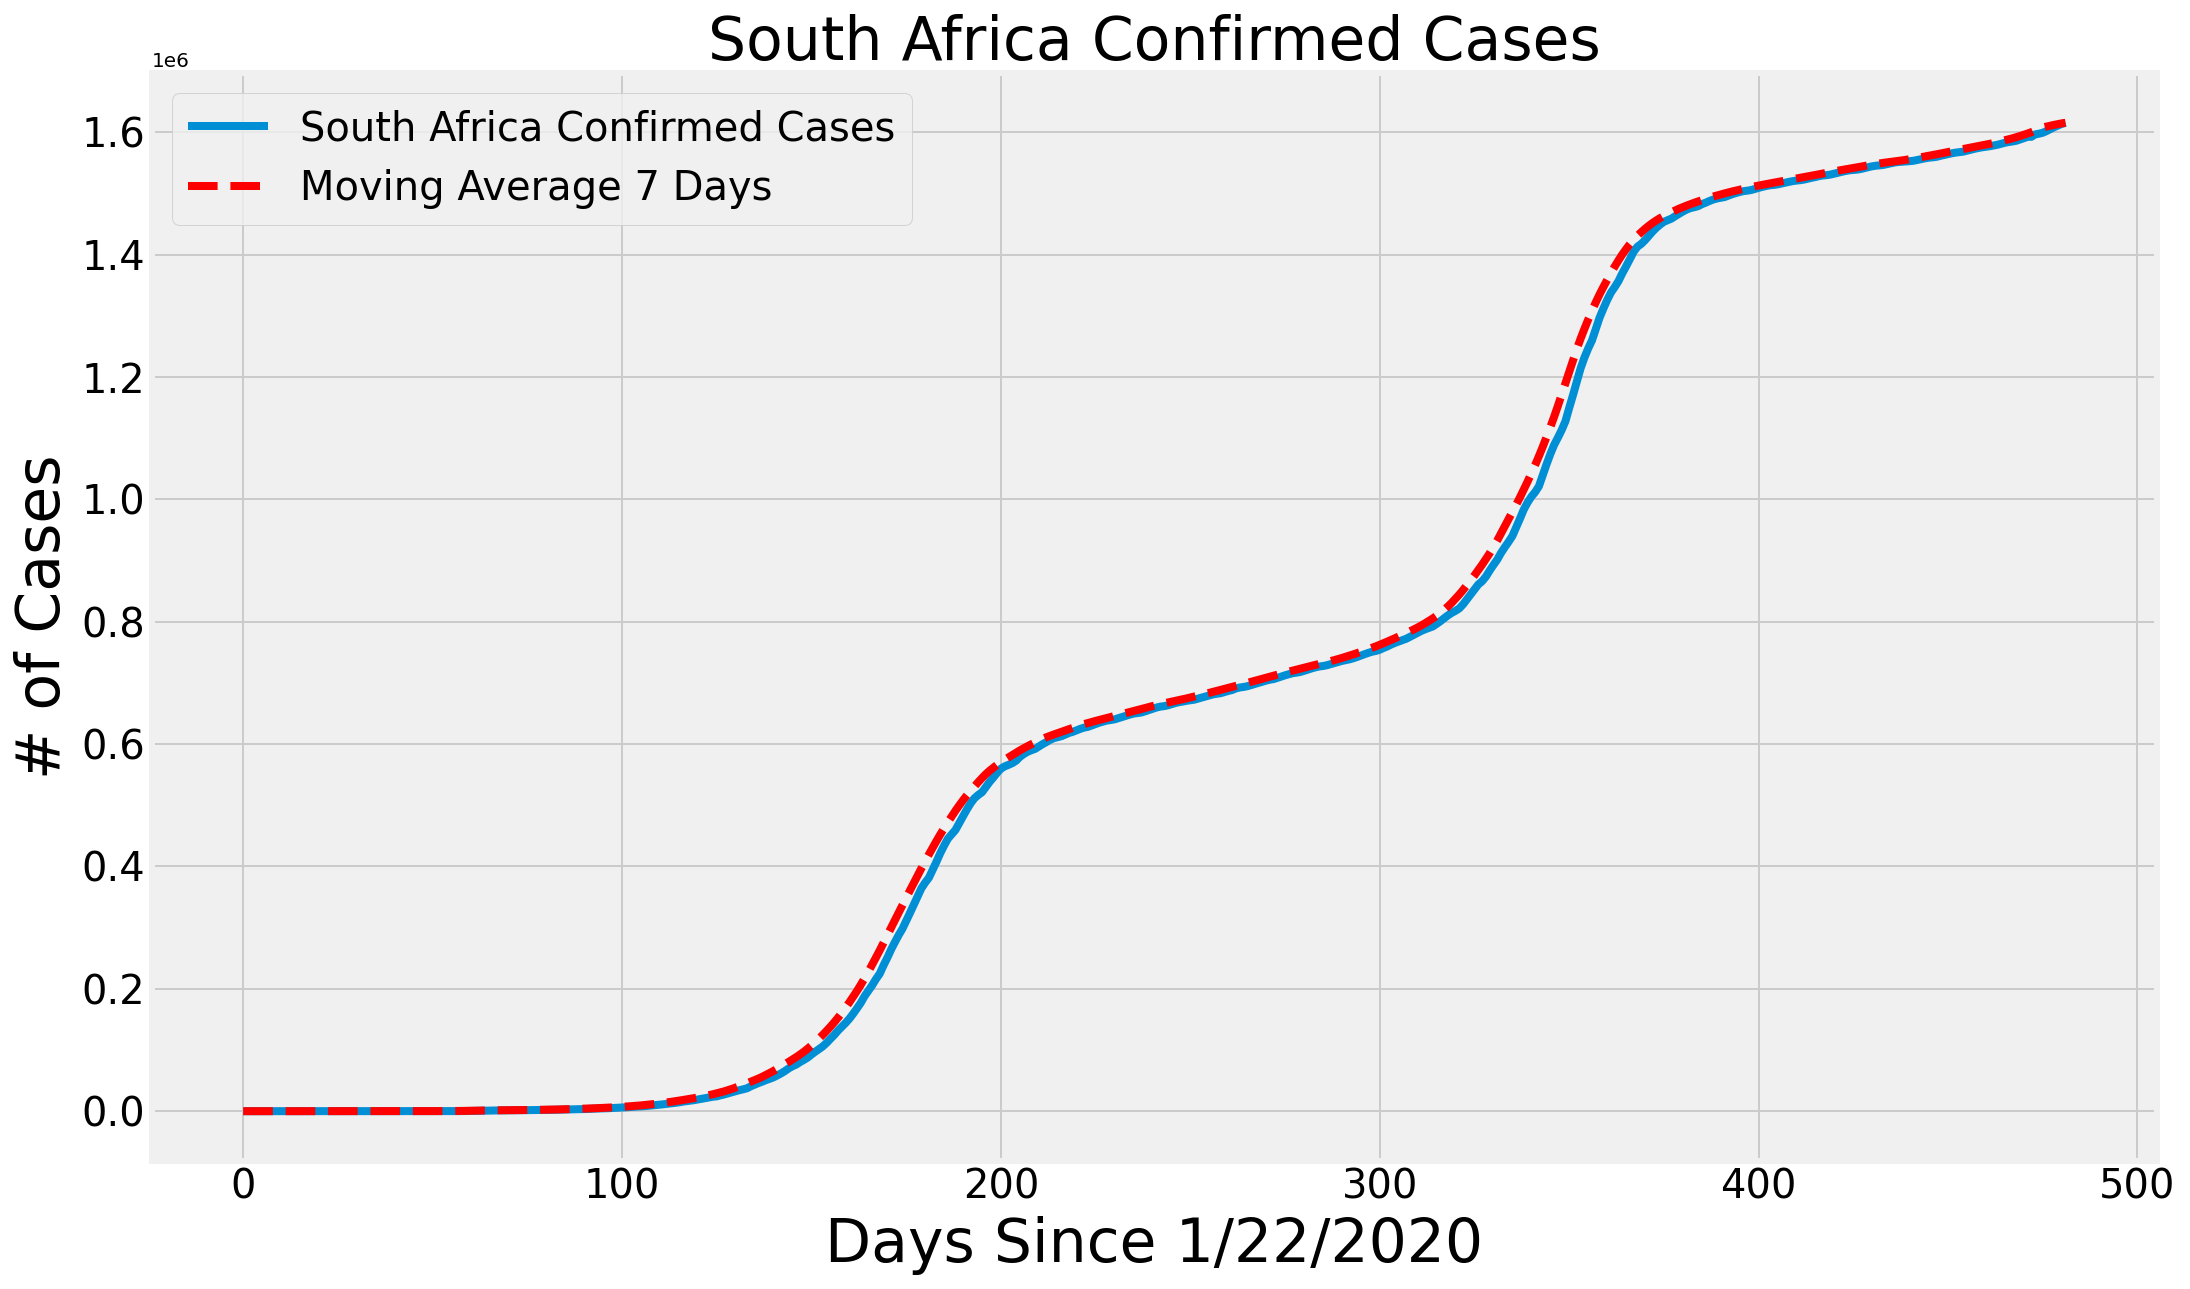

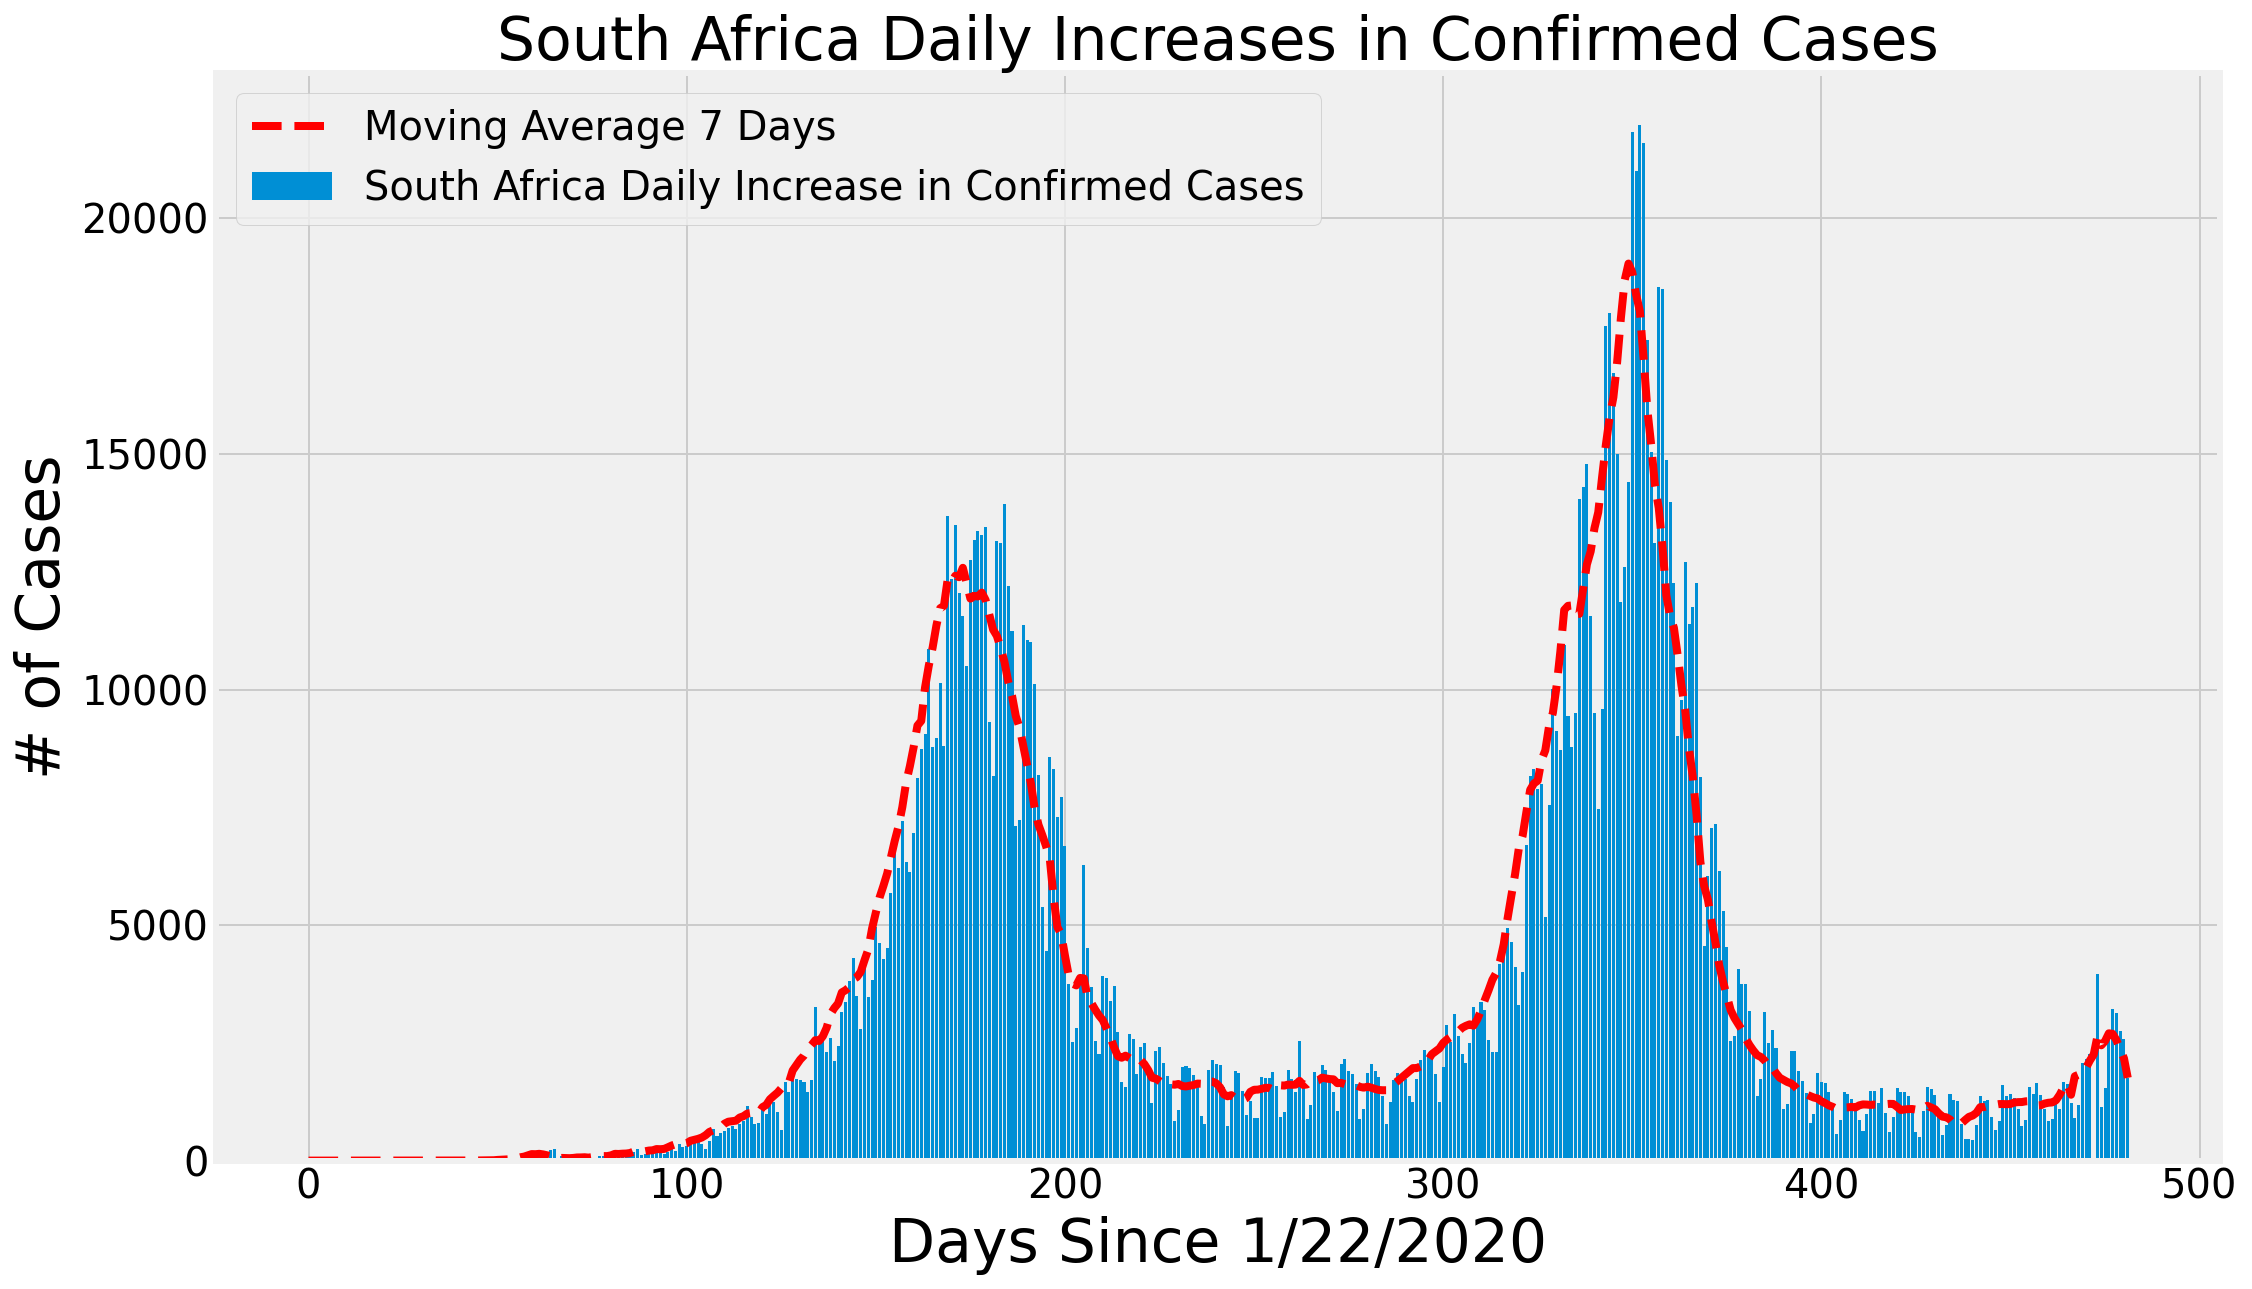

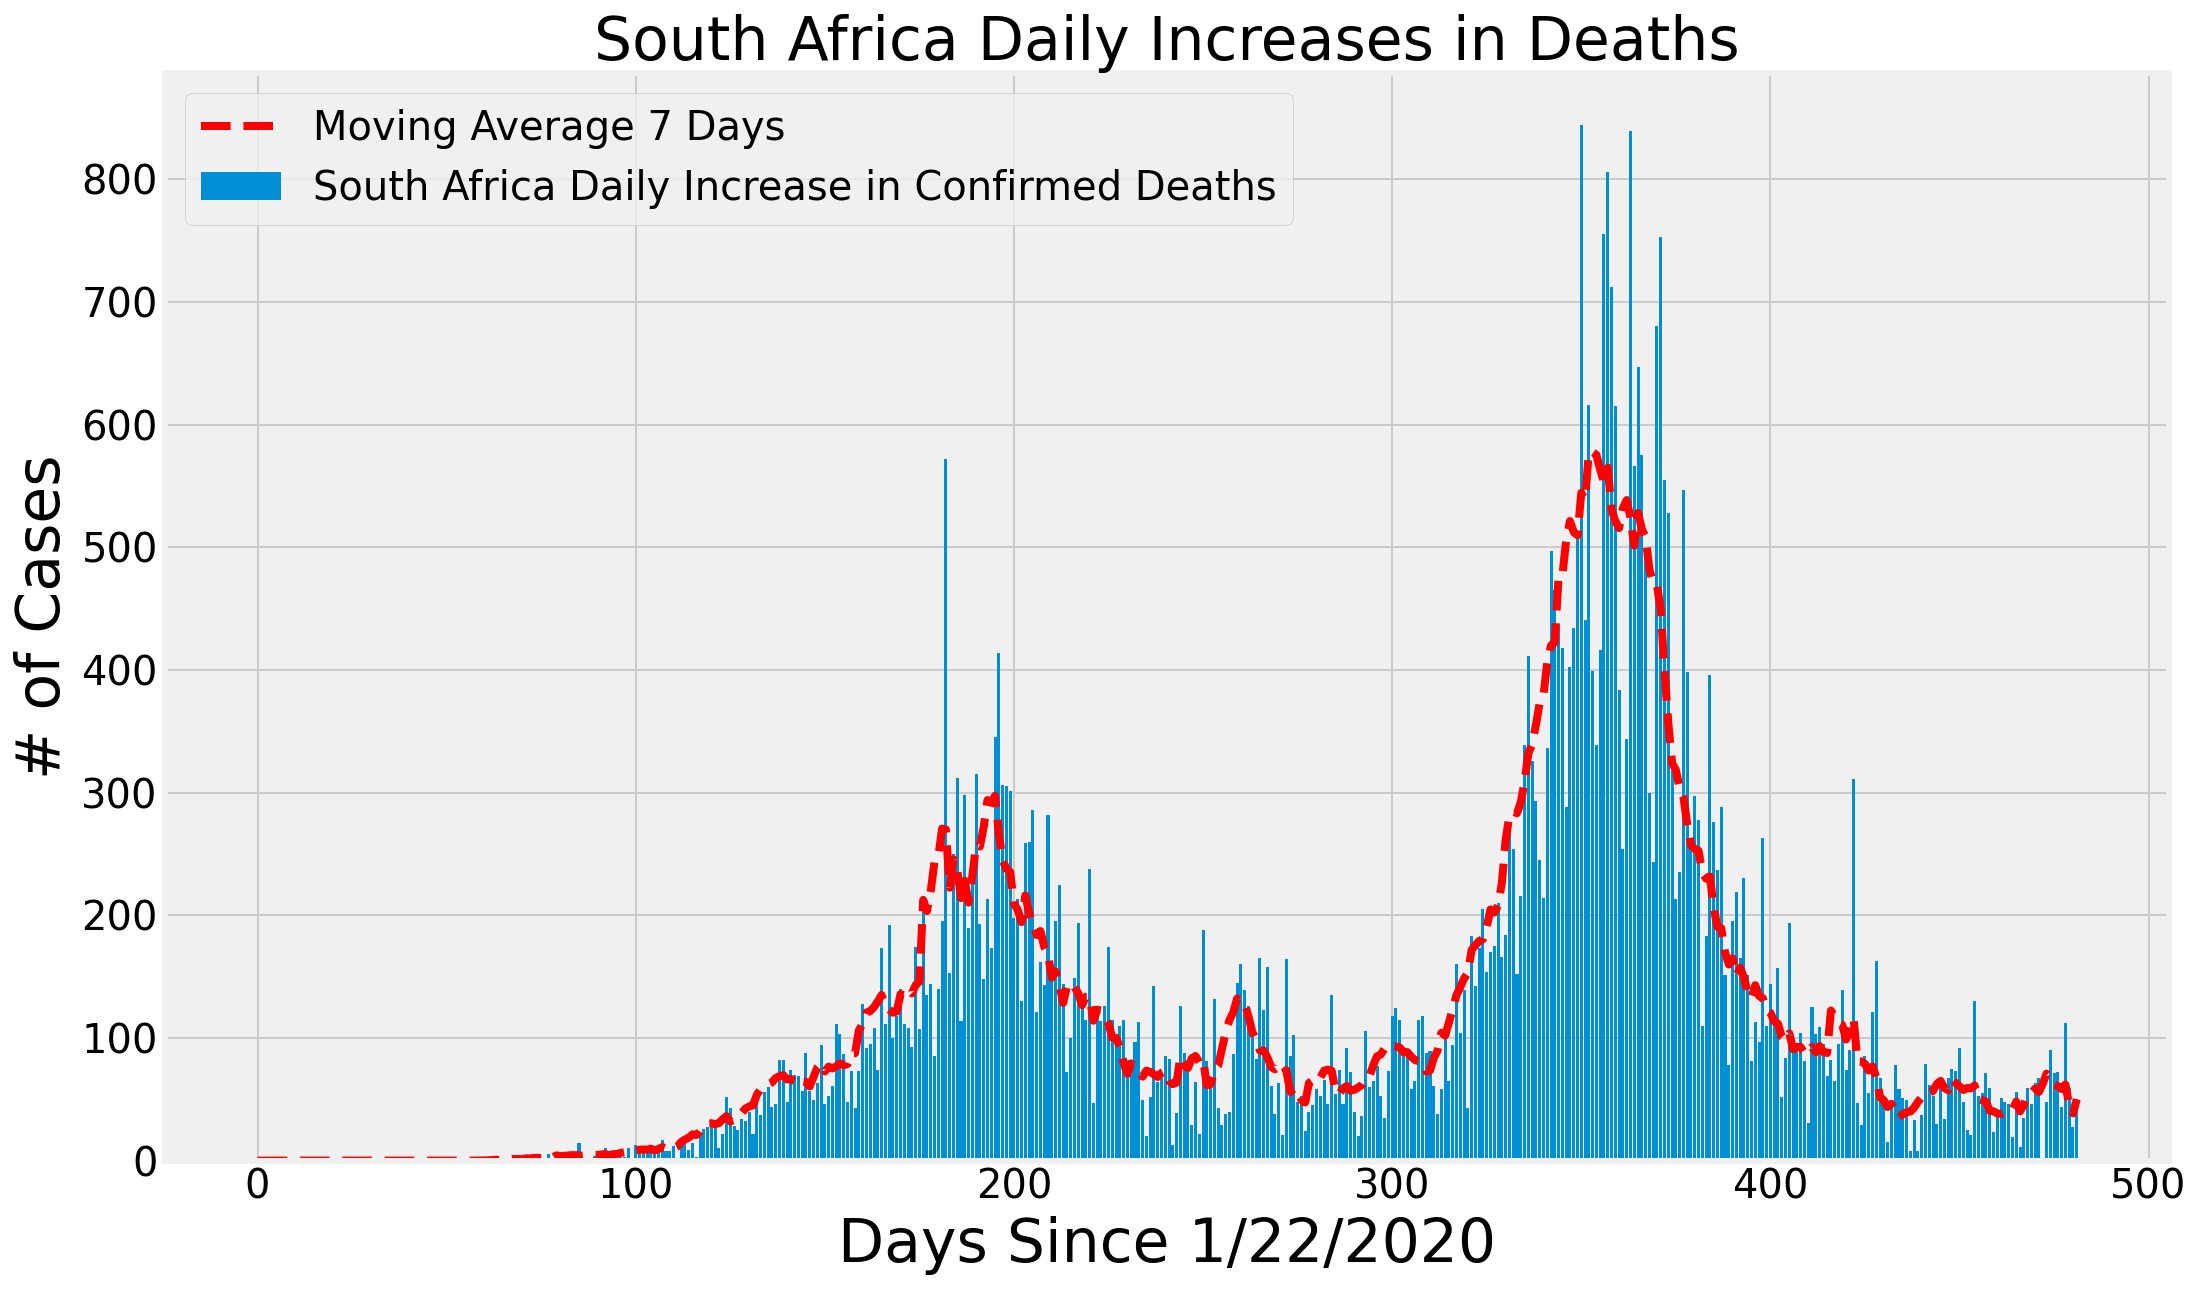

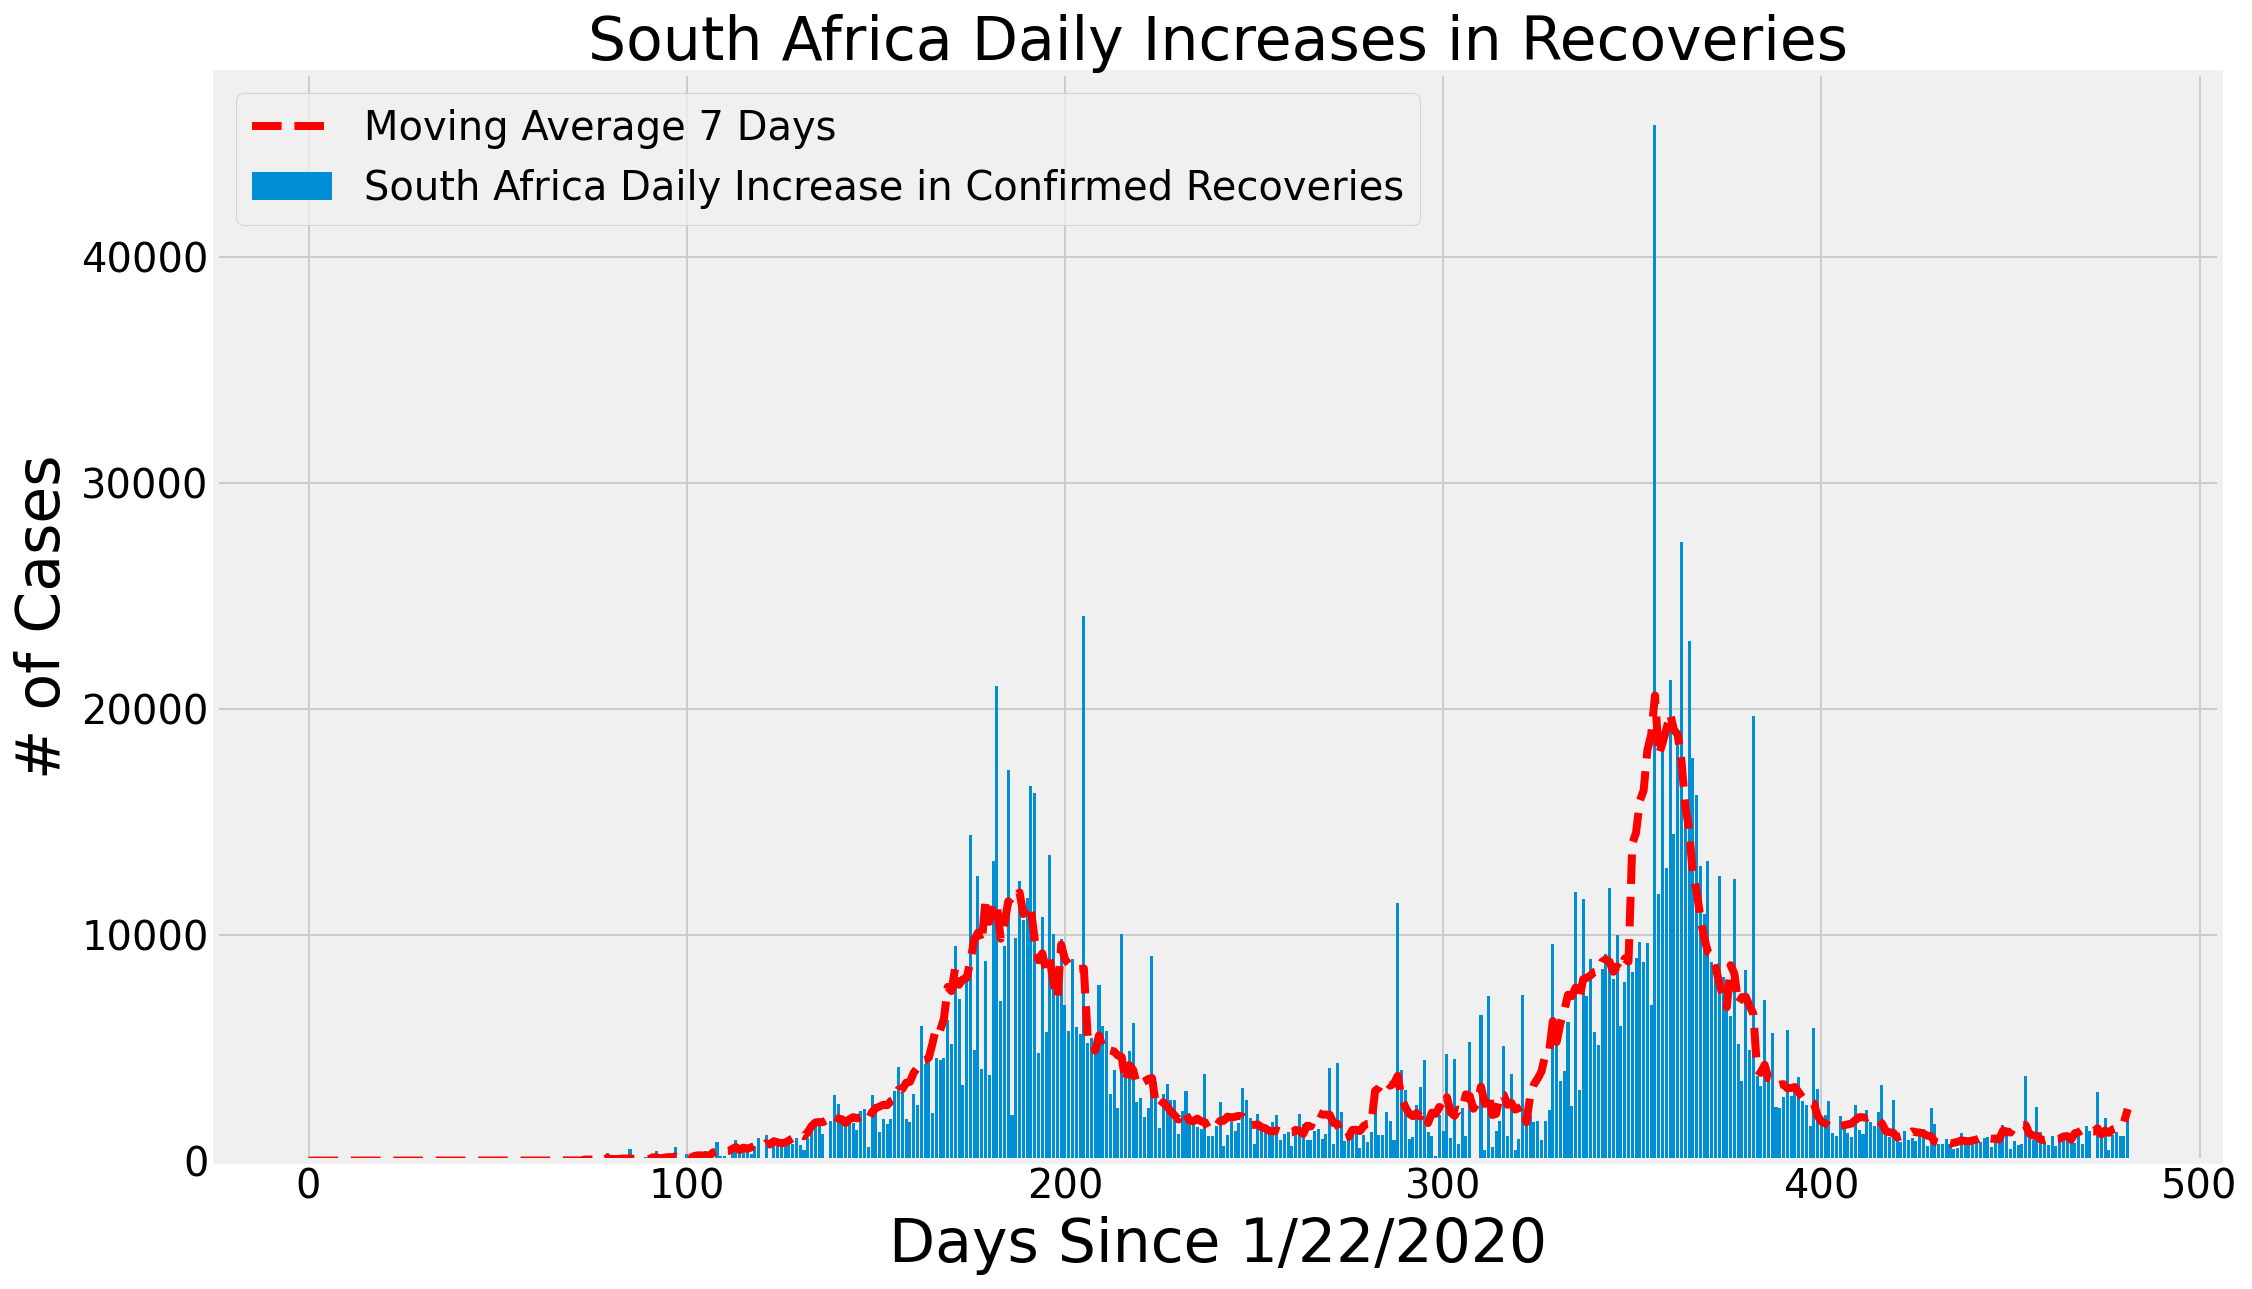

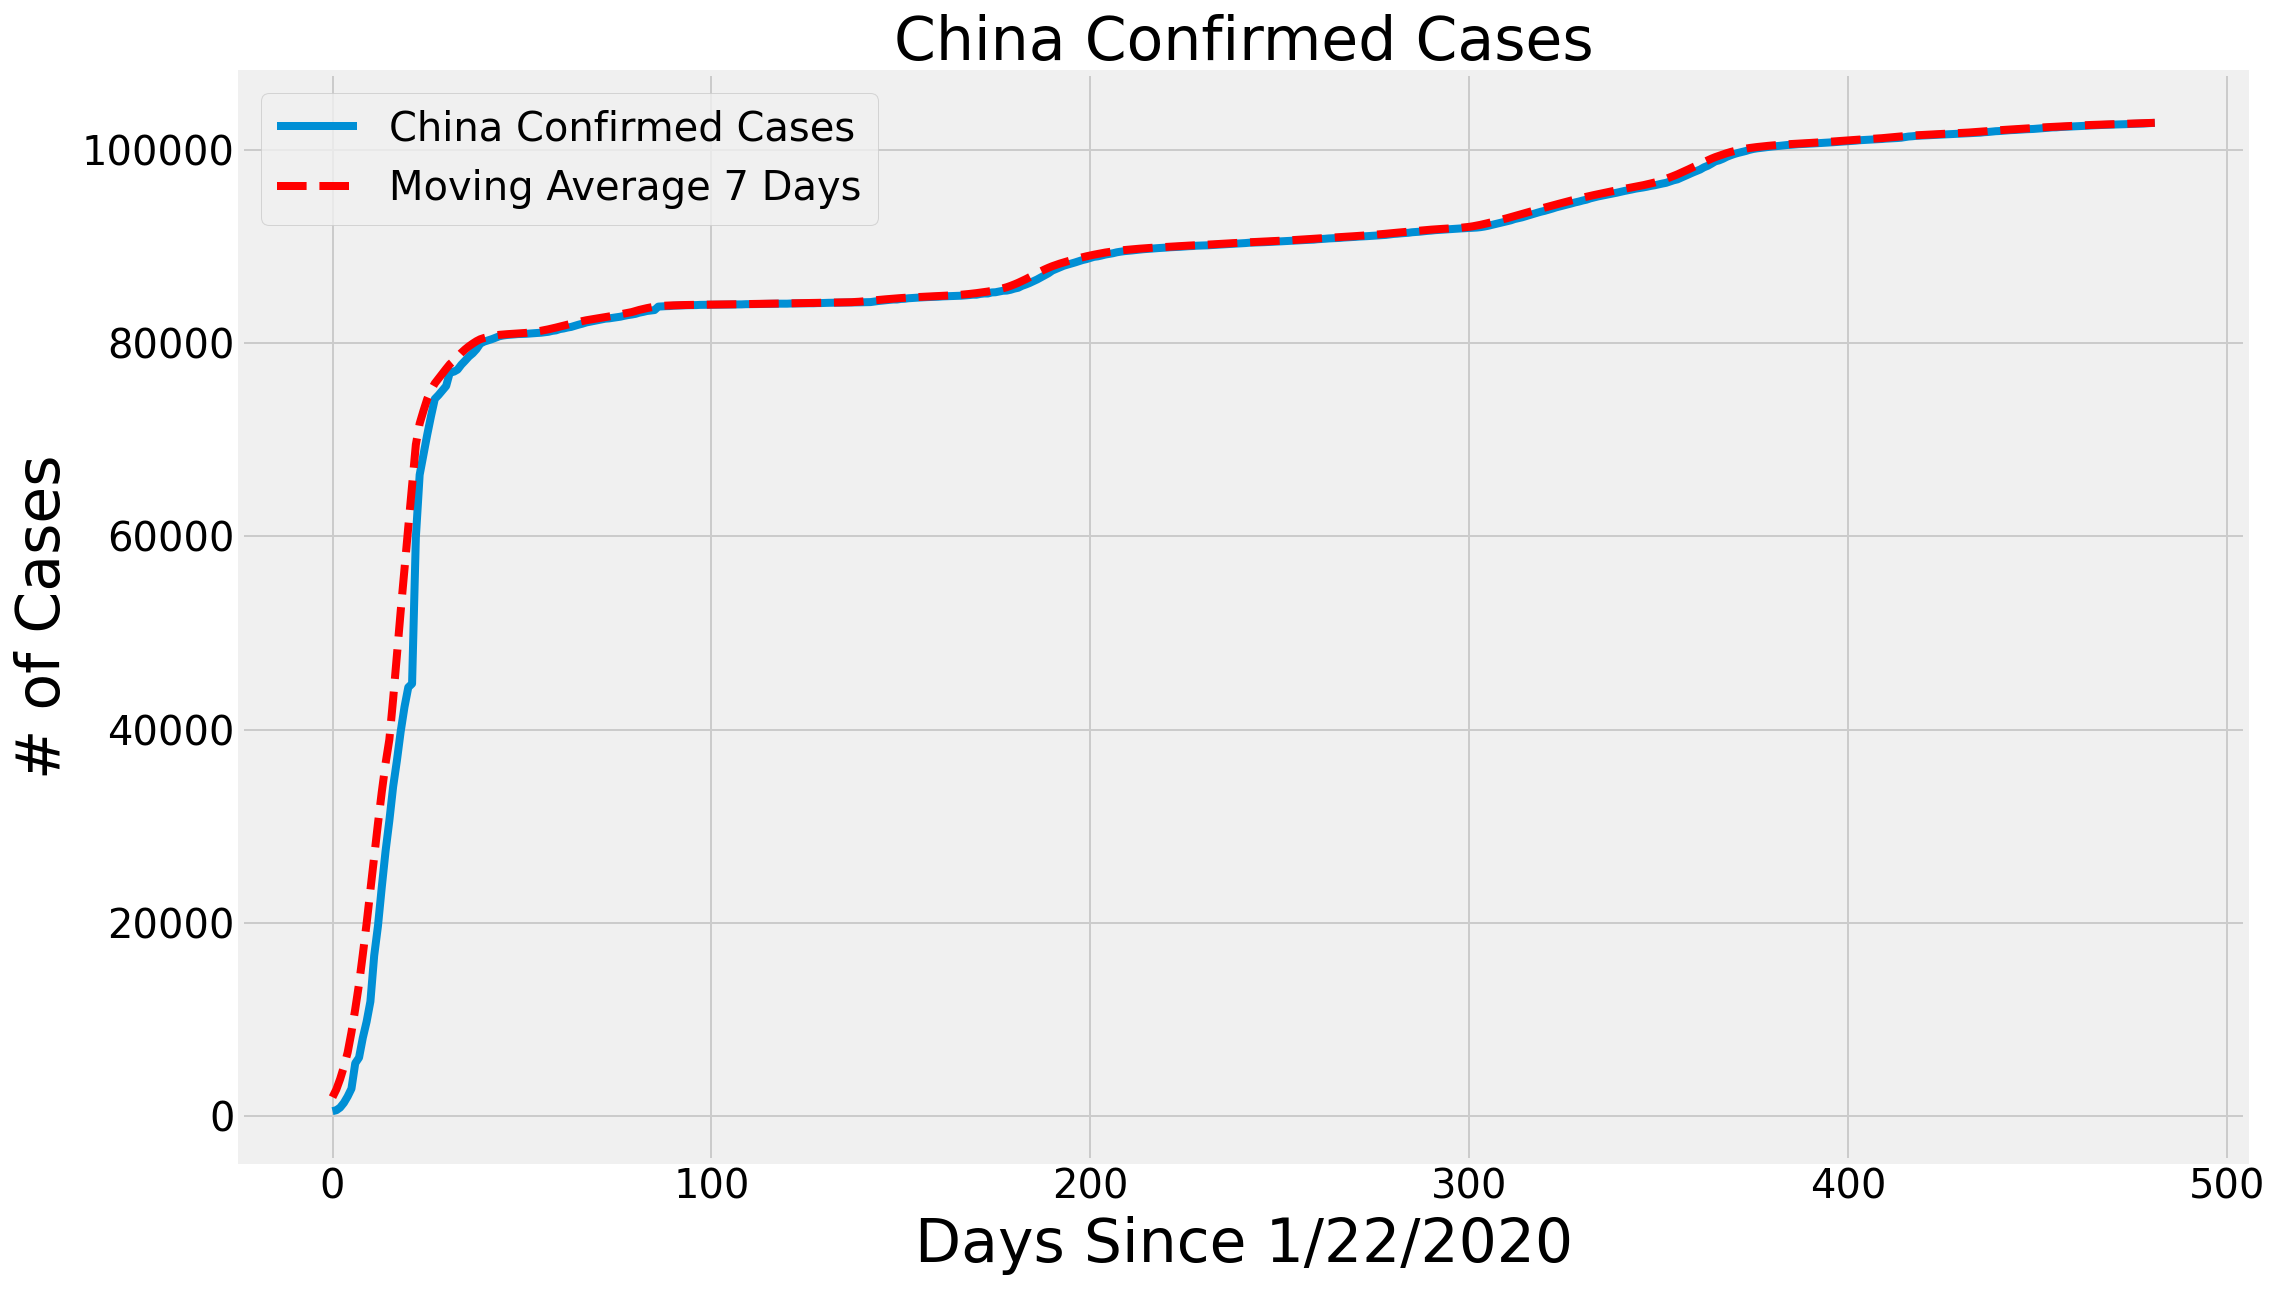

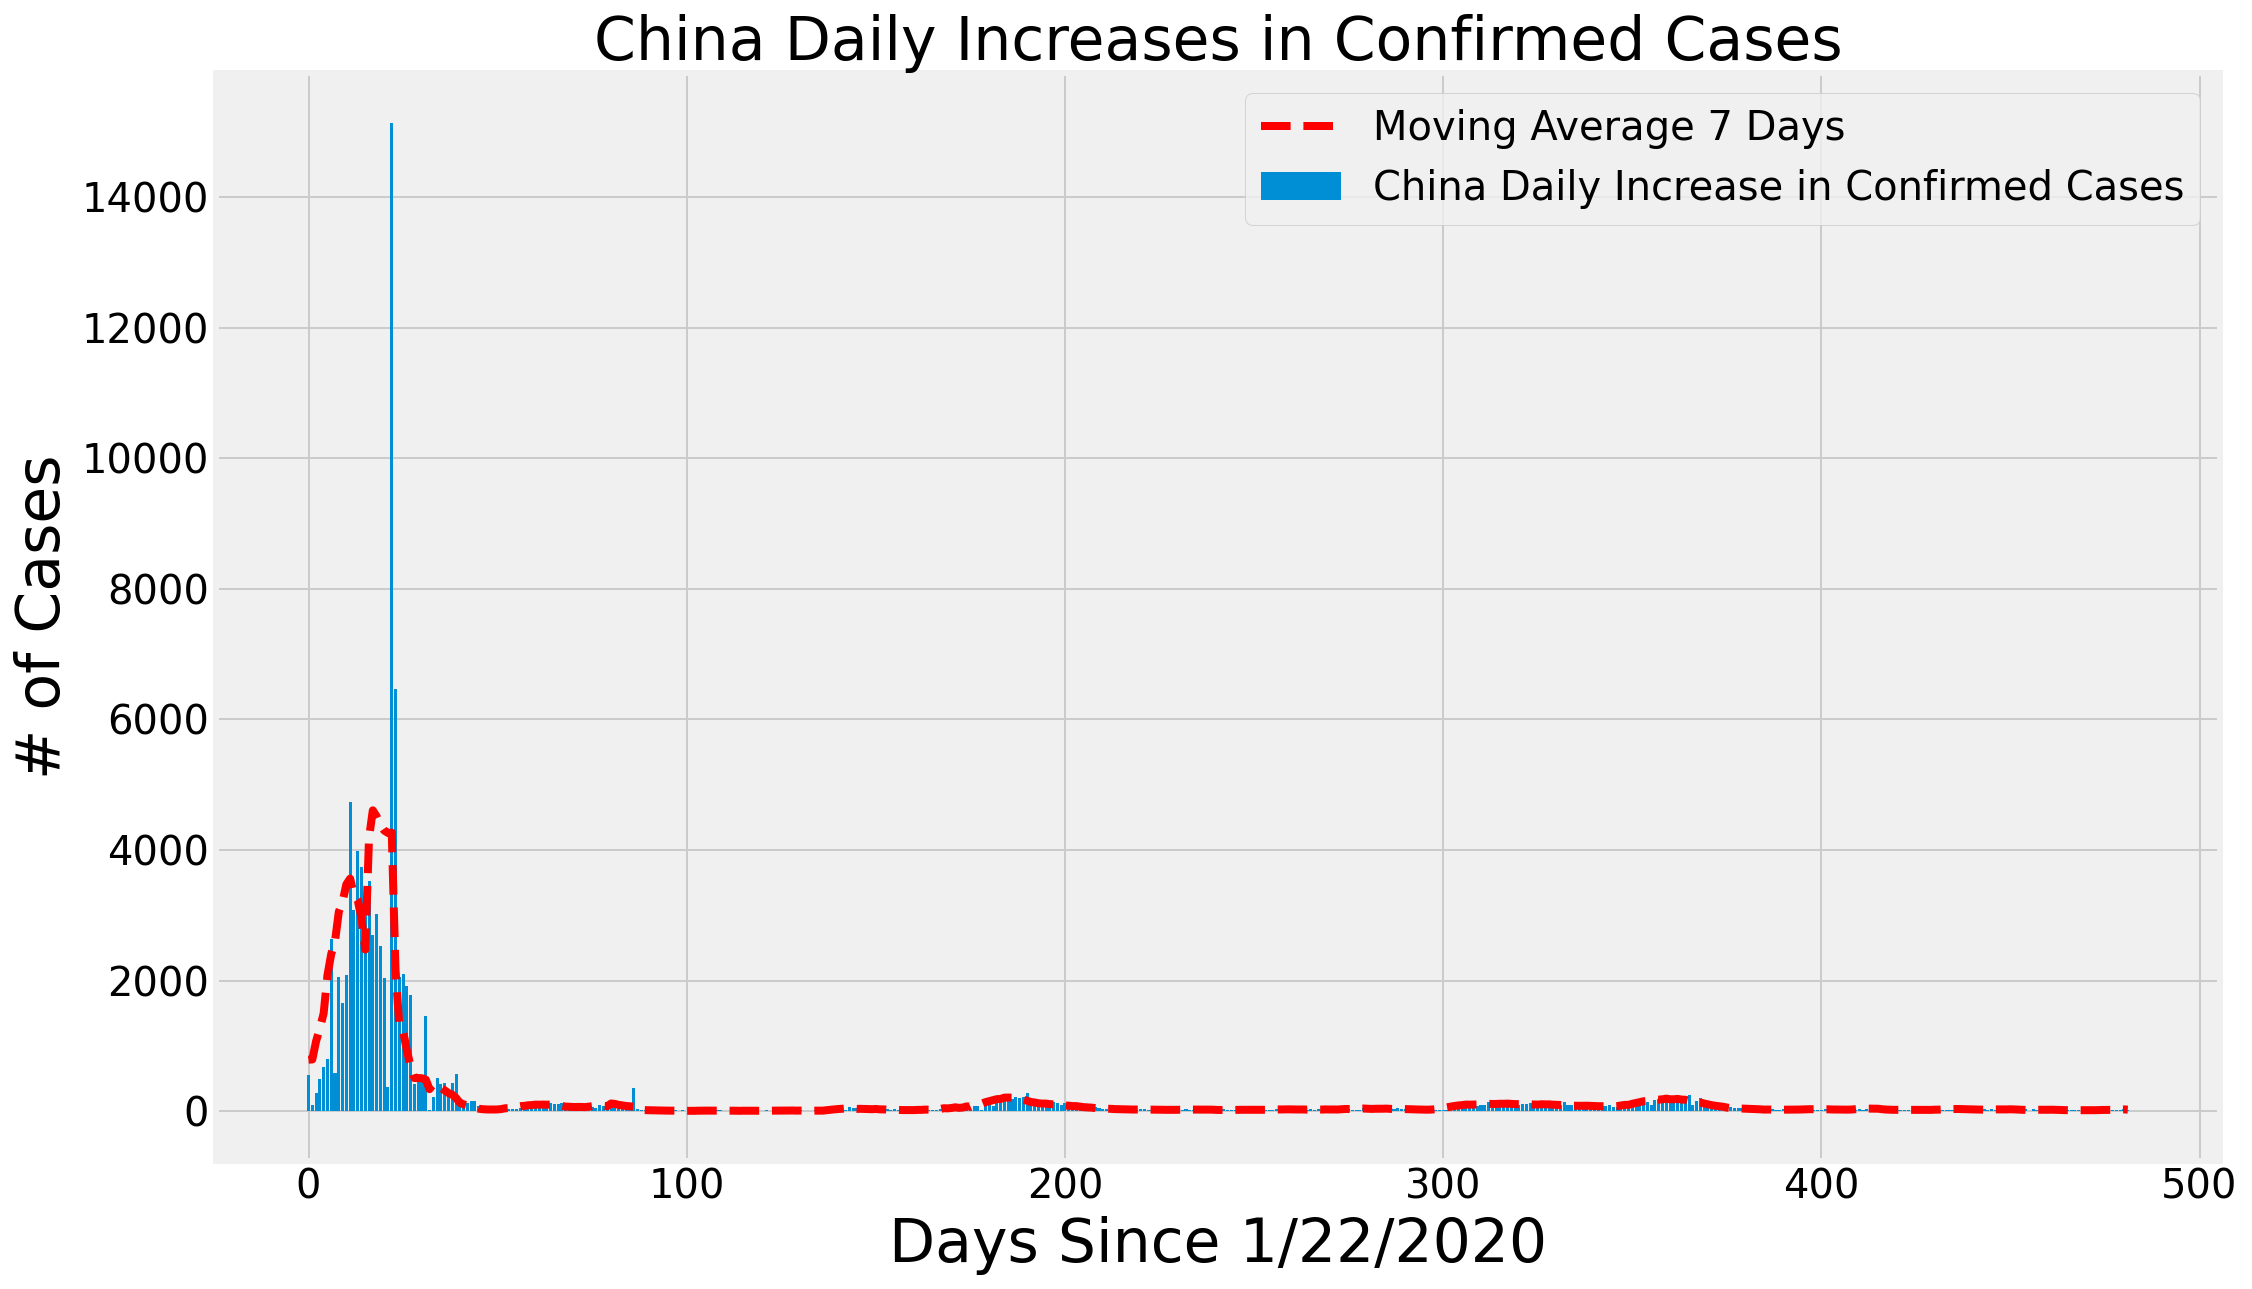

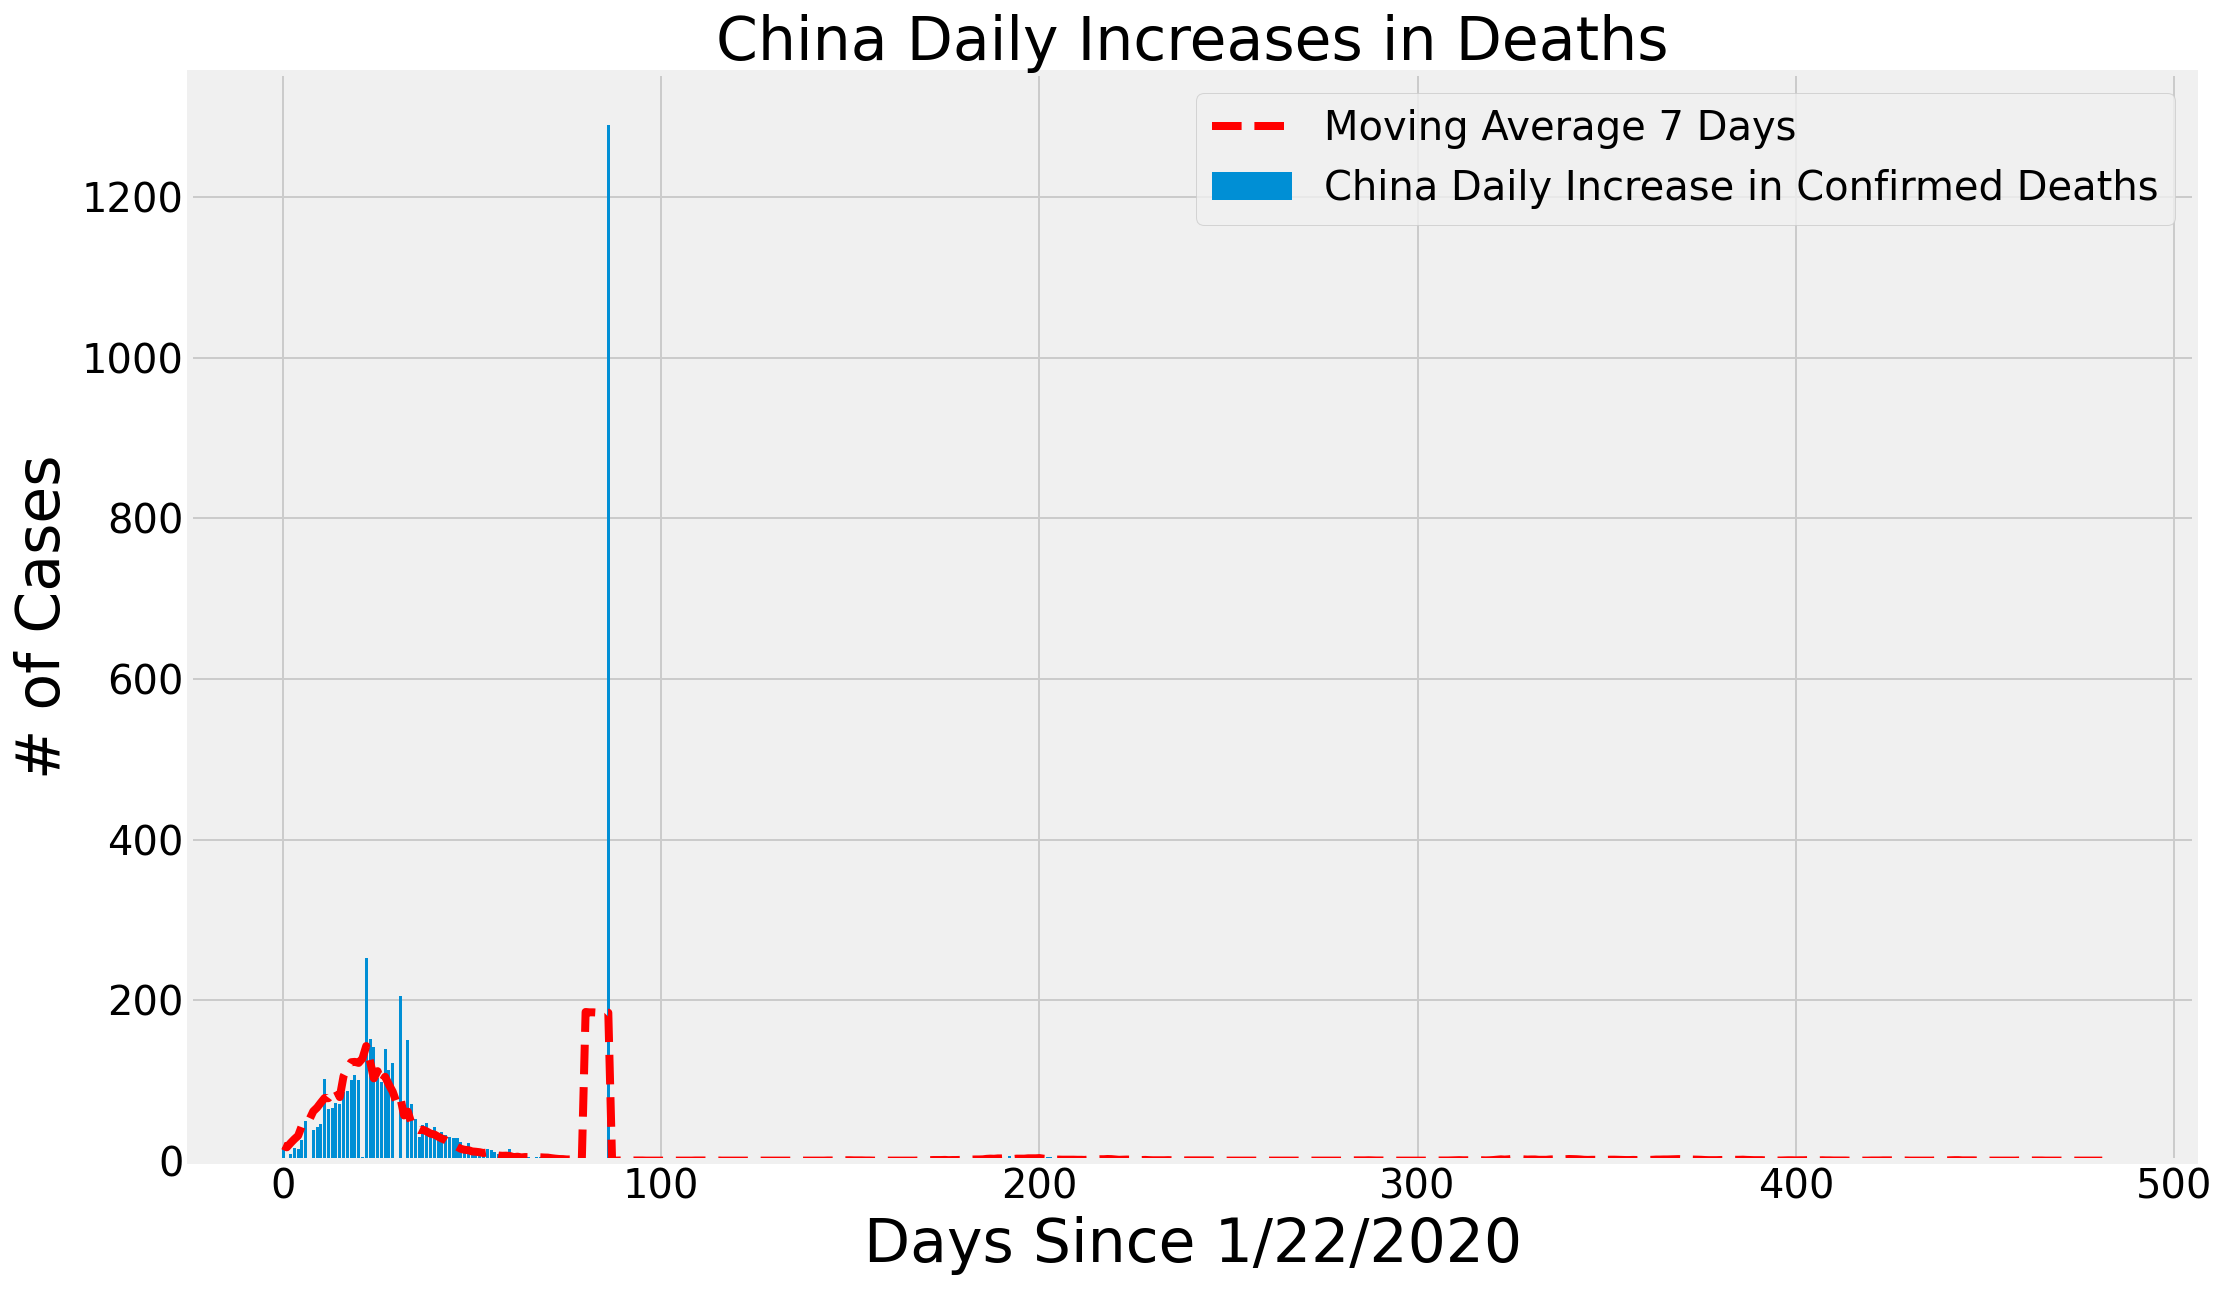

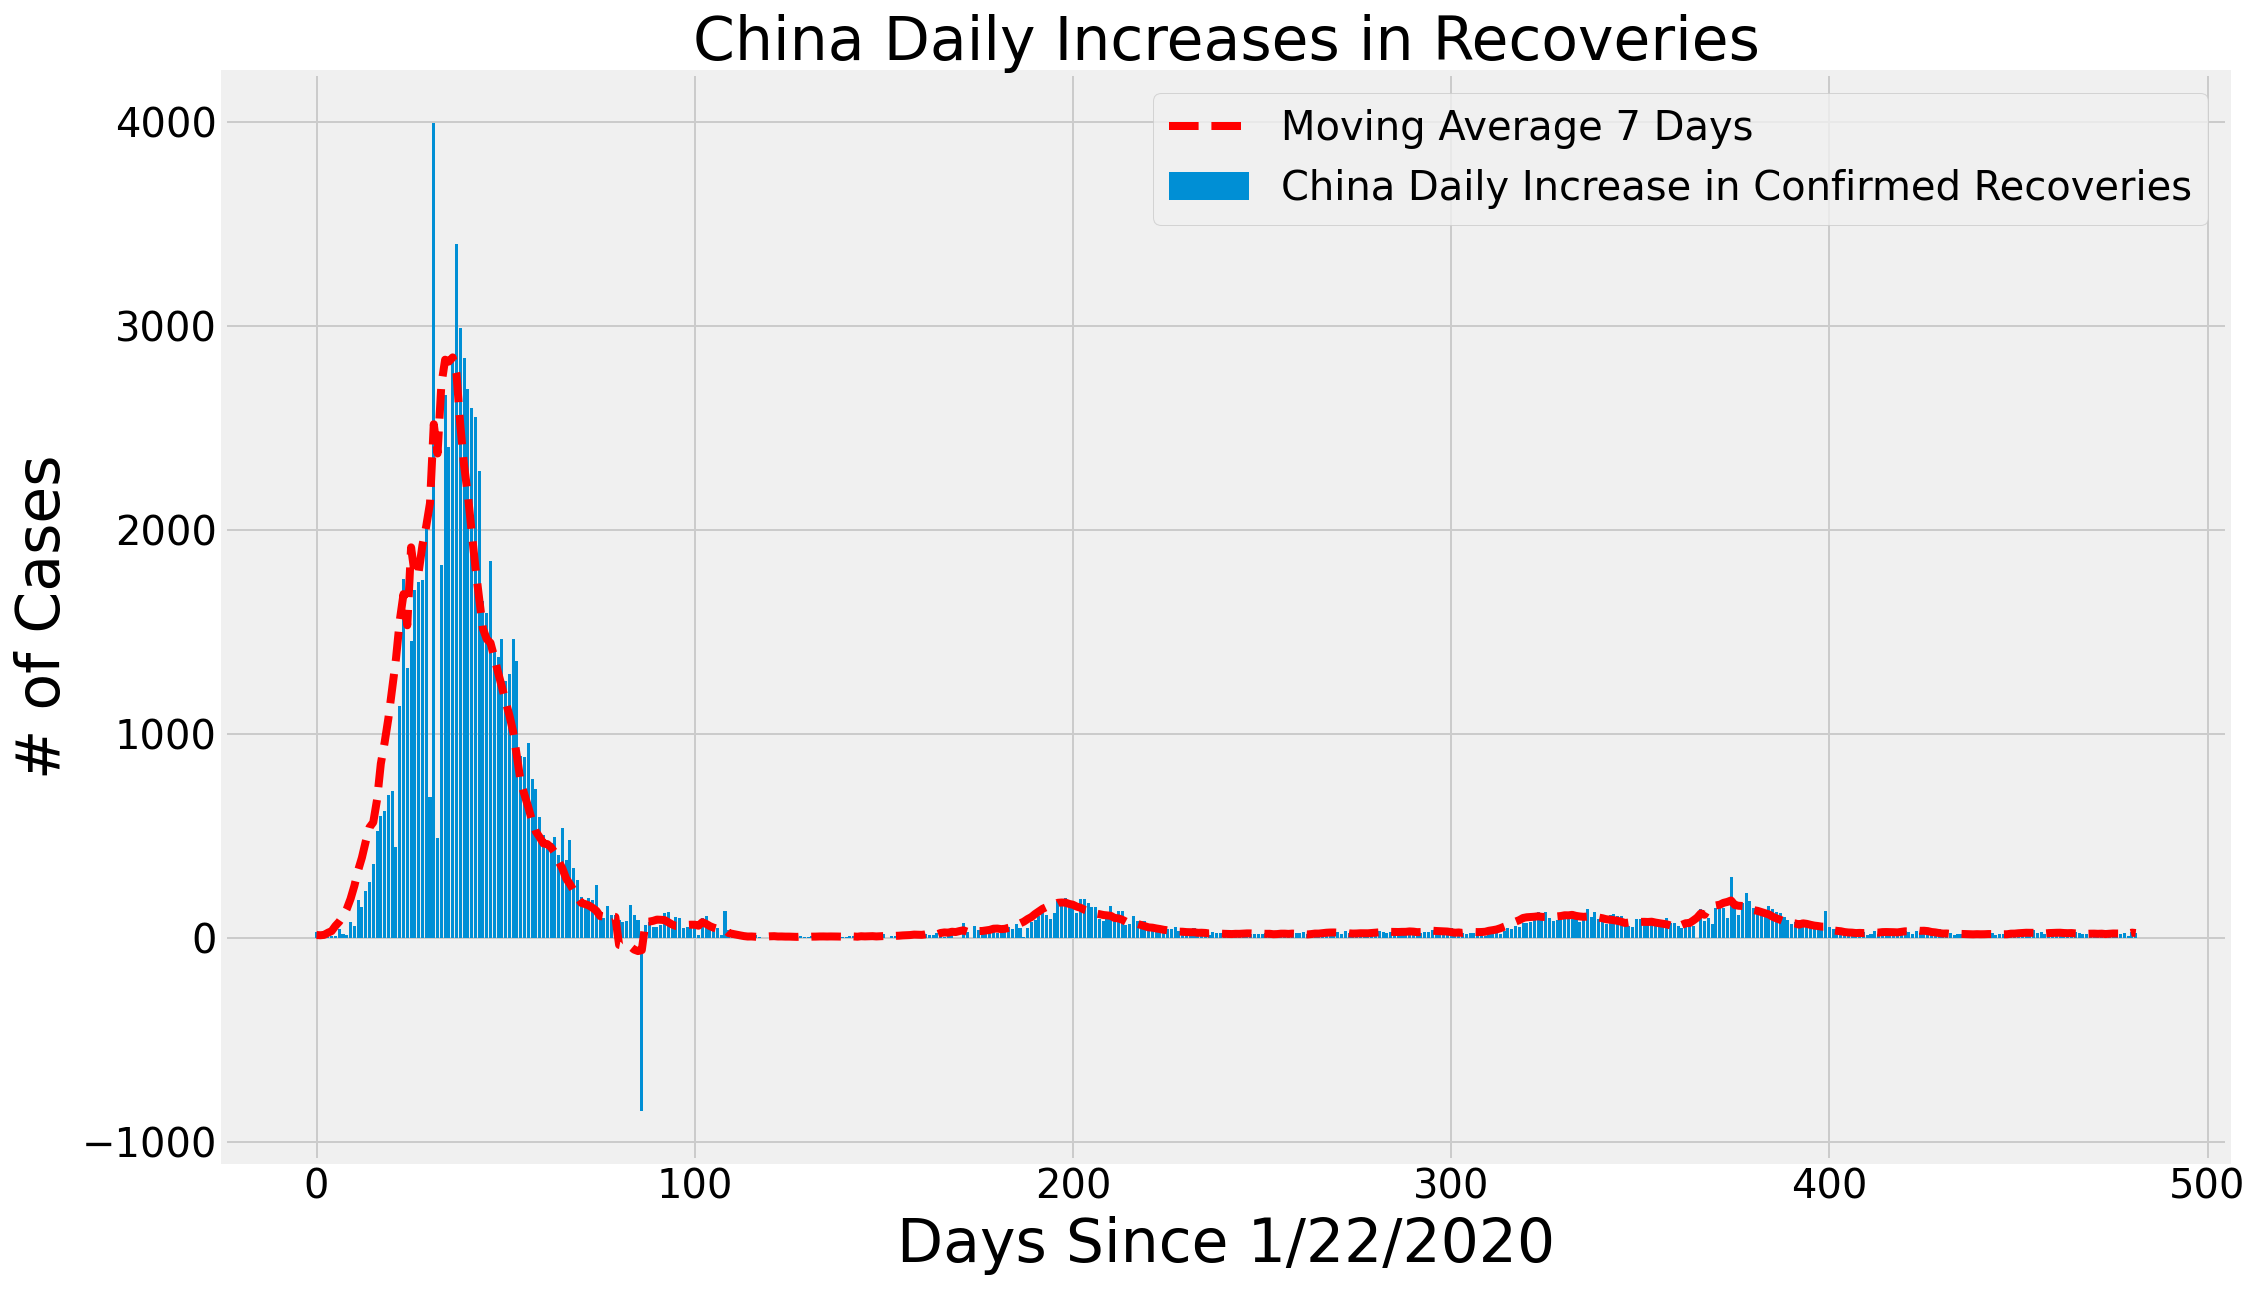

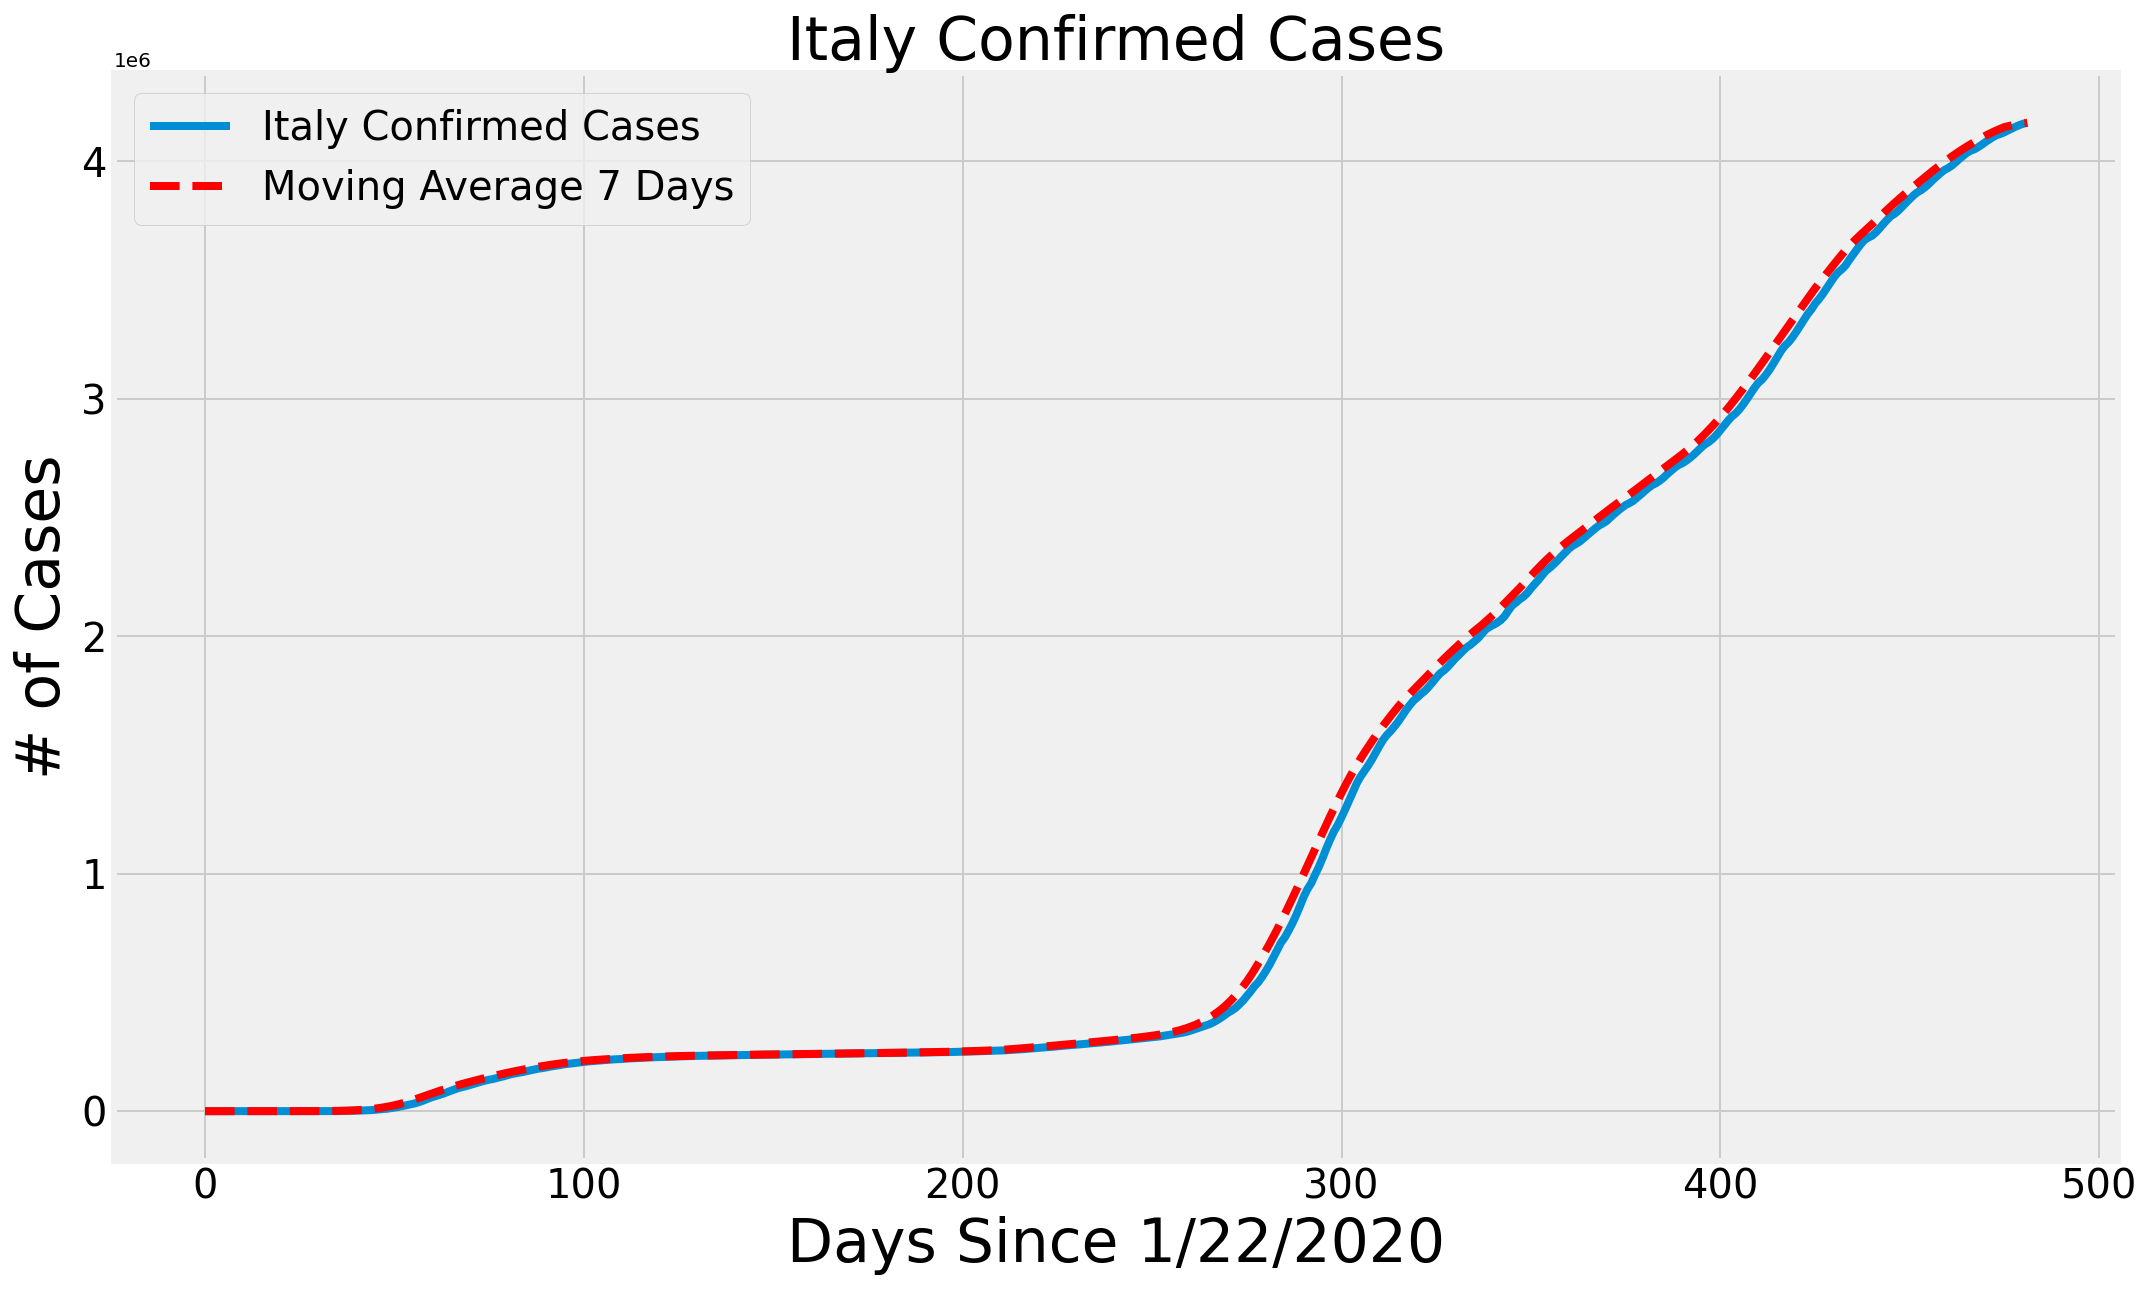

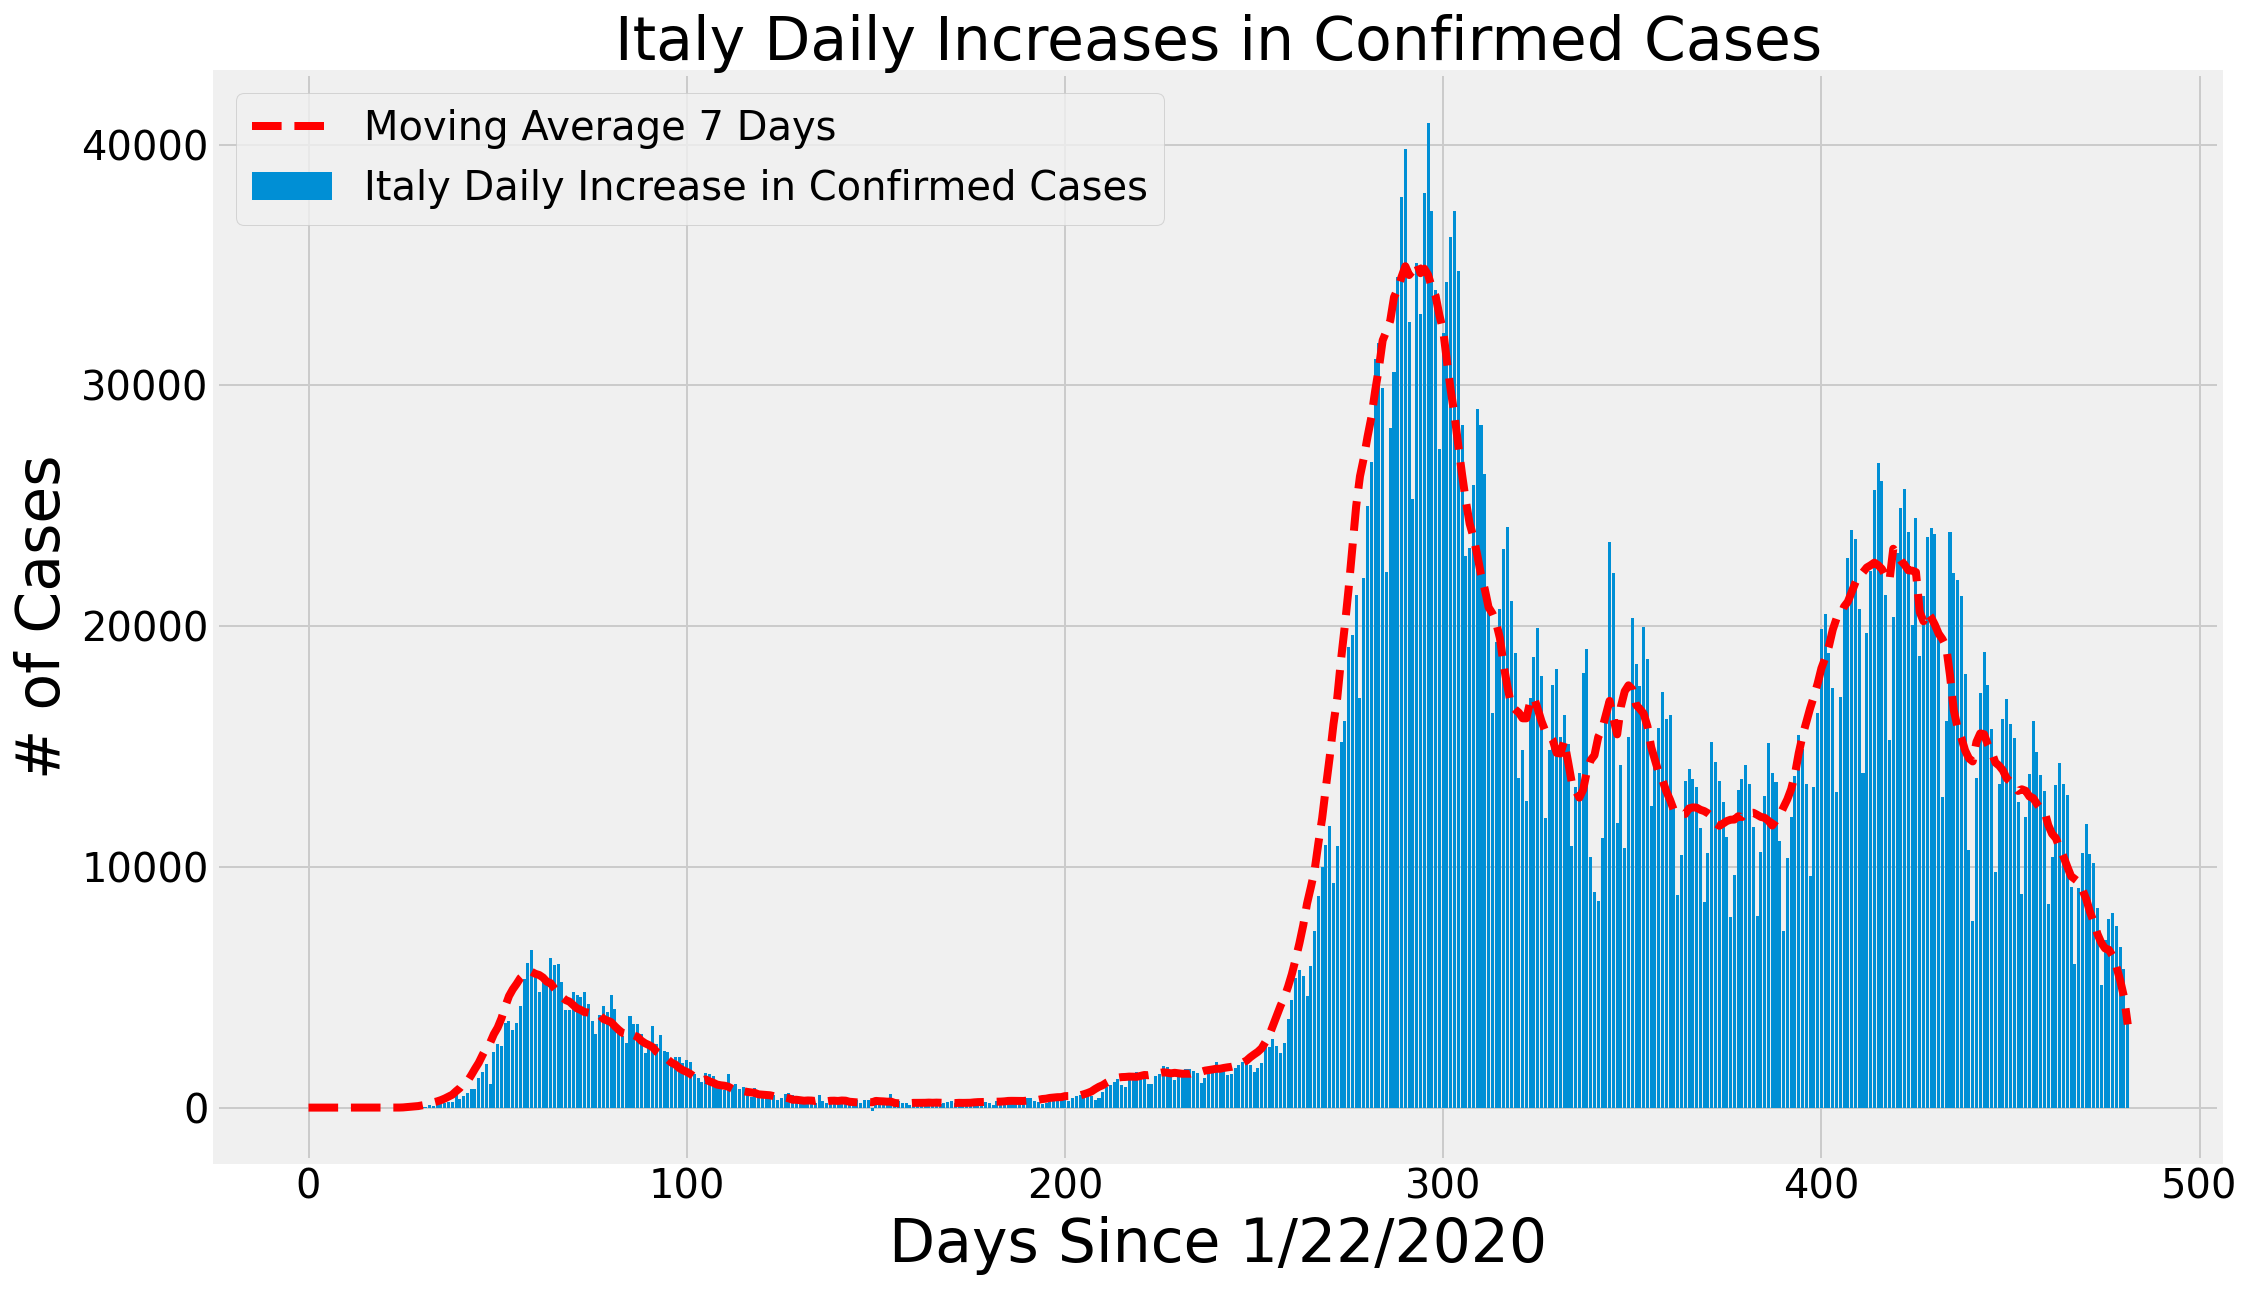

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x04471AD8> (for post_execute):


KeyboardInterrupt: 

In [77]:
countries = ['US', 'Russia', 'India', 'Brazil', 'South Africa', 'China', 'Italy',
             'Germany', 'Spain', 'France', 'United Kingdom', 'Peru', 'Mexico', 'Colombia', 'Argentina', 'Saudi Arabia', 'Iran', 'Bangladesh',
            'Pakistan', 'Turkey', 'Philippines', 'Iraq', 'Indonesia', 'Israel', 'Ukraine', 'Ecuador', 'Bolivia', 'Netherlands', 'Belgium', 'Poland', 'Czechia', 'Switzerland',
            'Romania', 'Morocco','Portugal', 'Austria', 'Sweden'] 

for country in countries:
    country_visualizations(country)

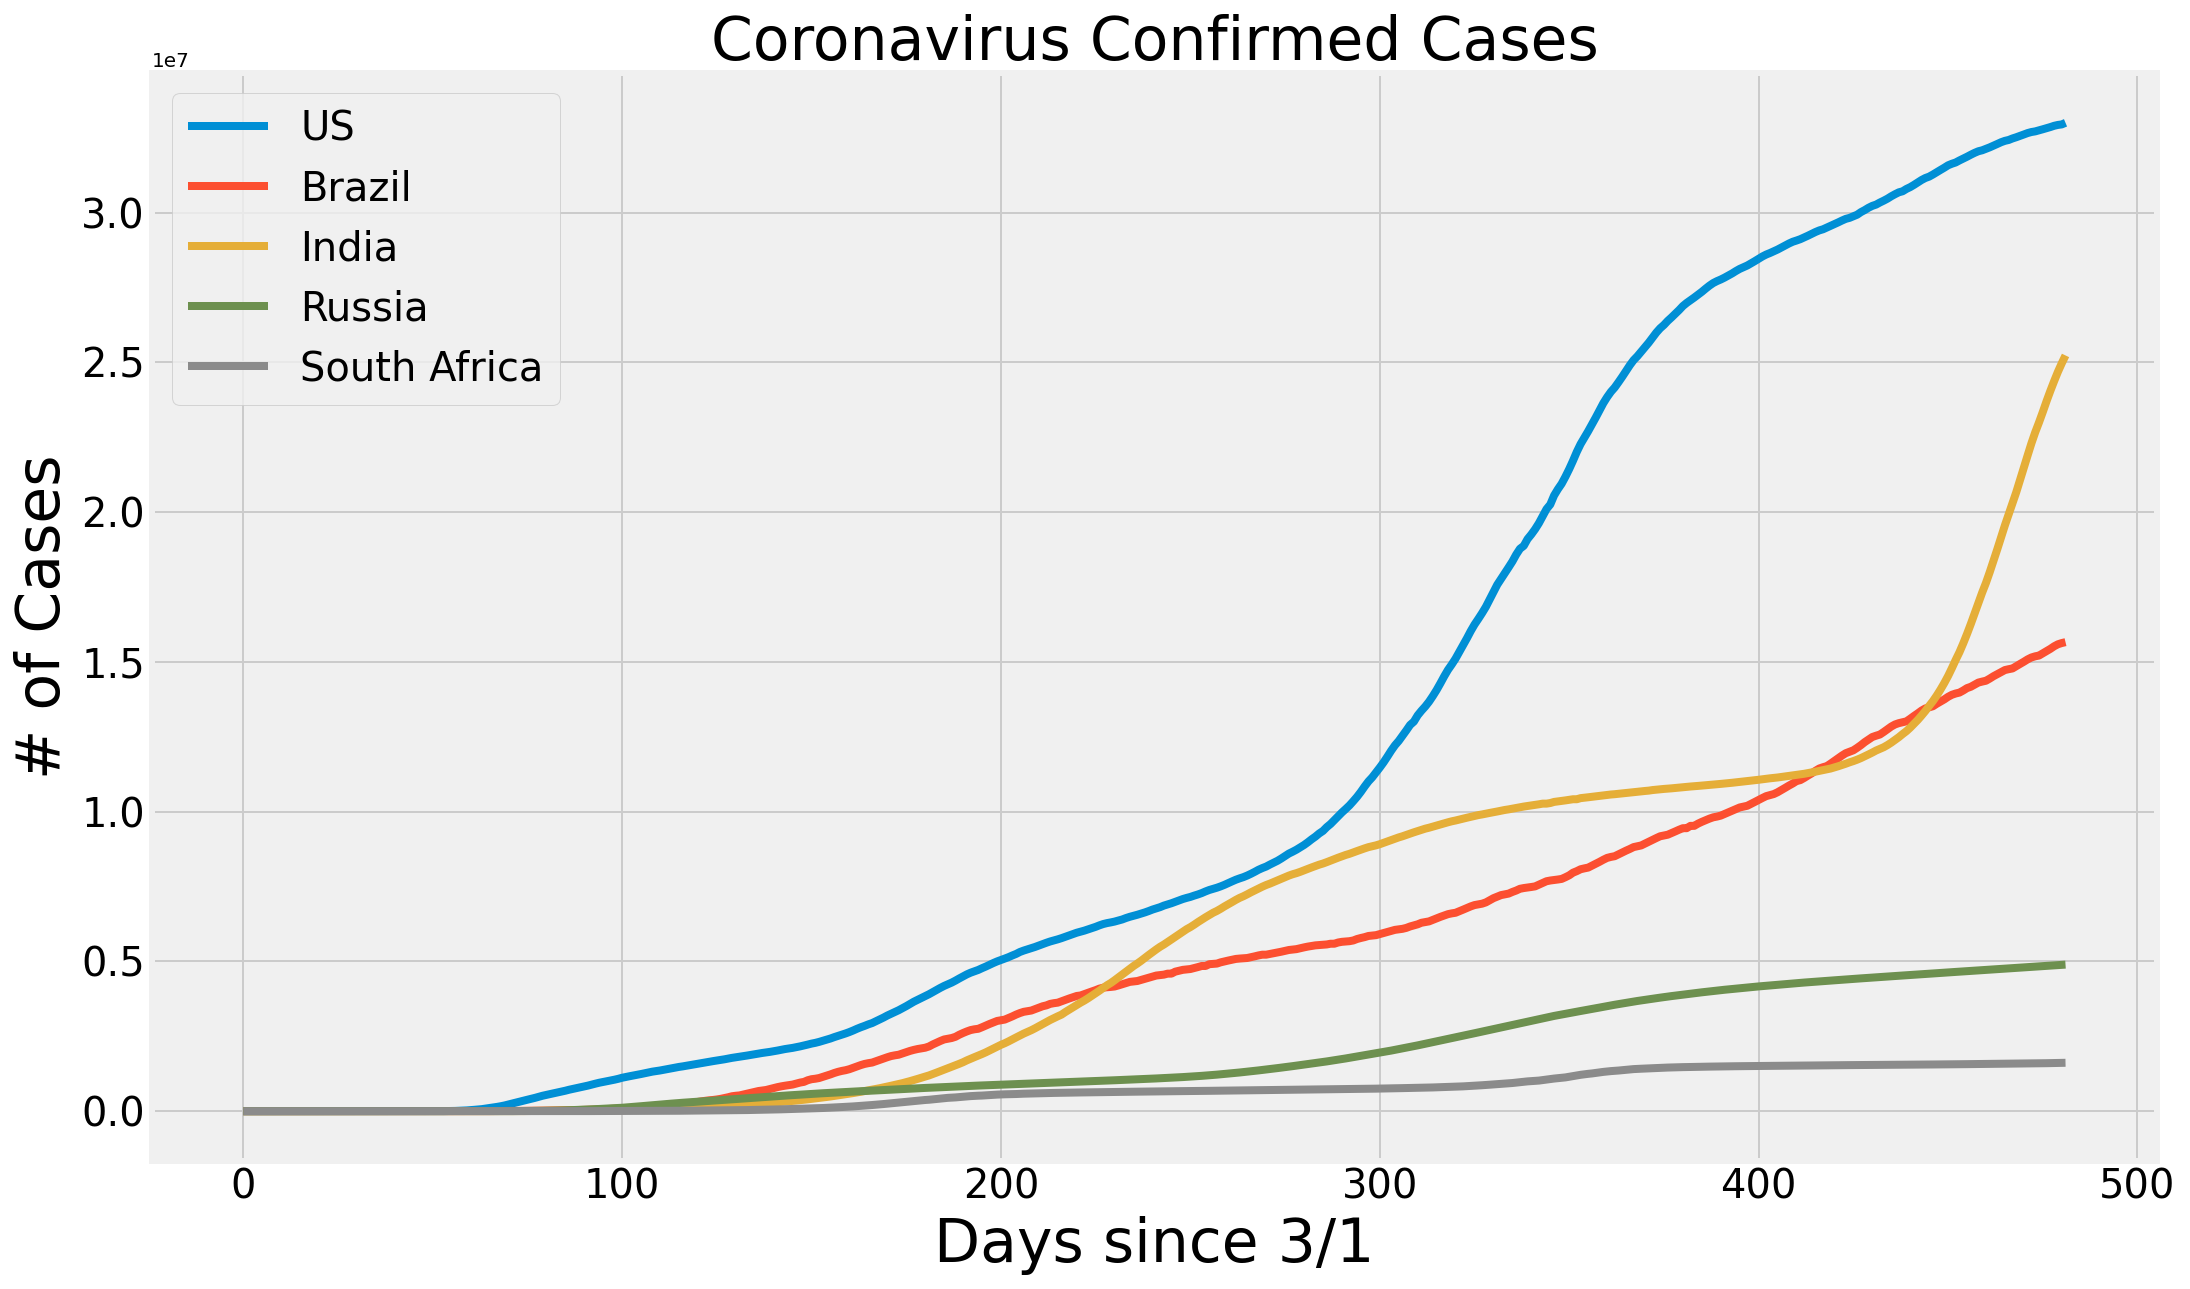

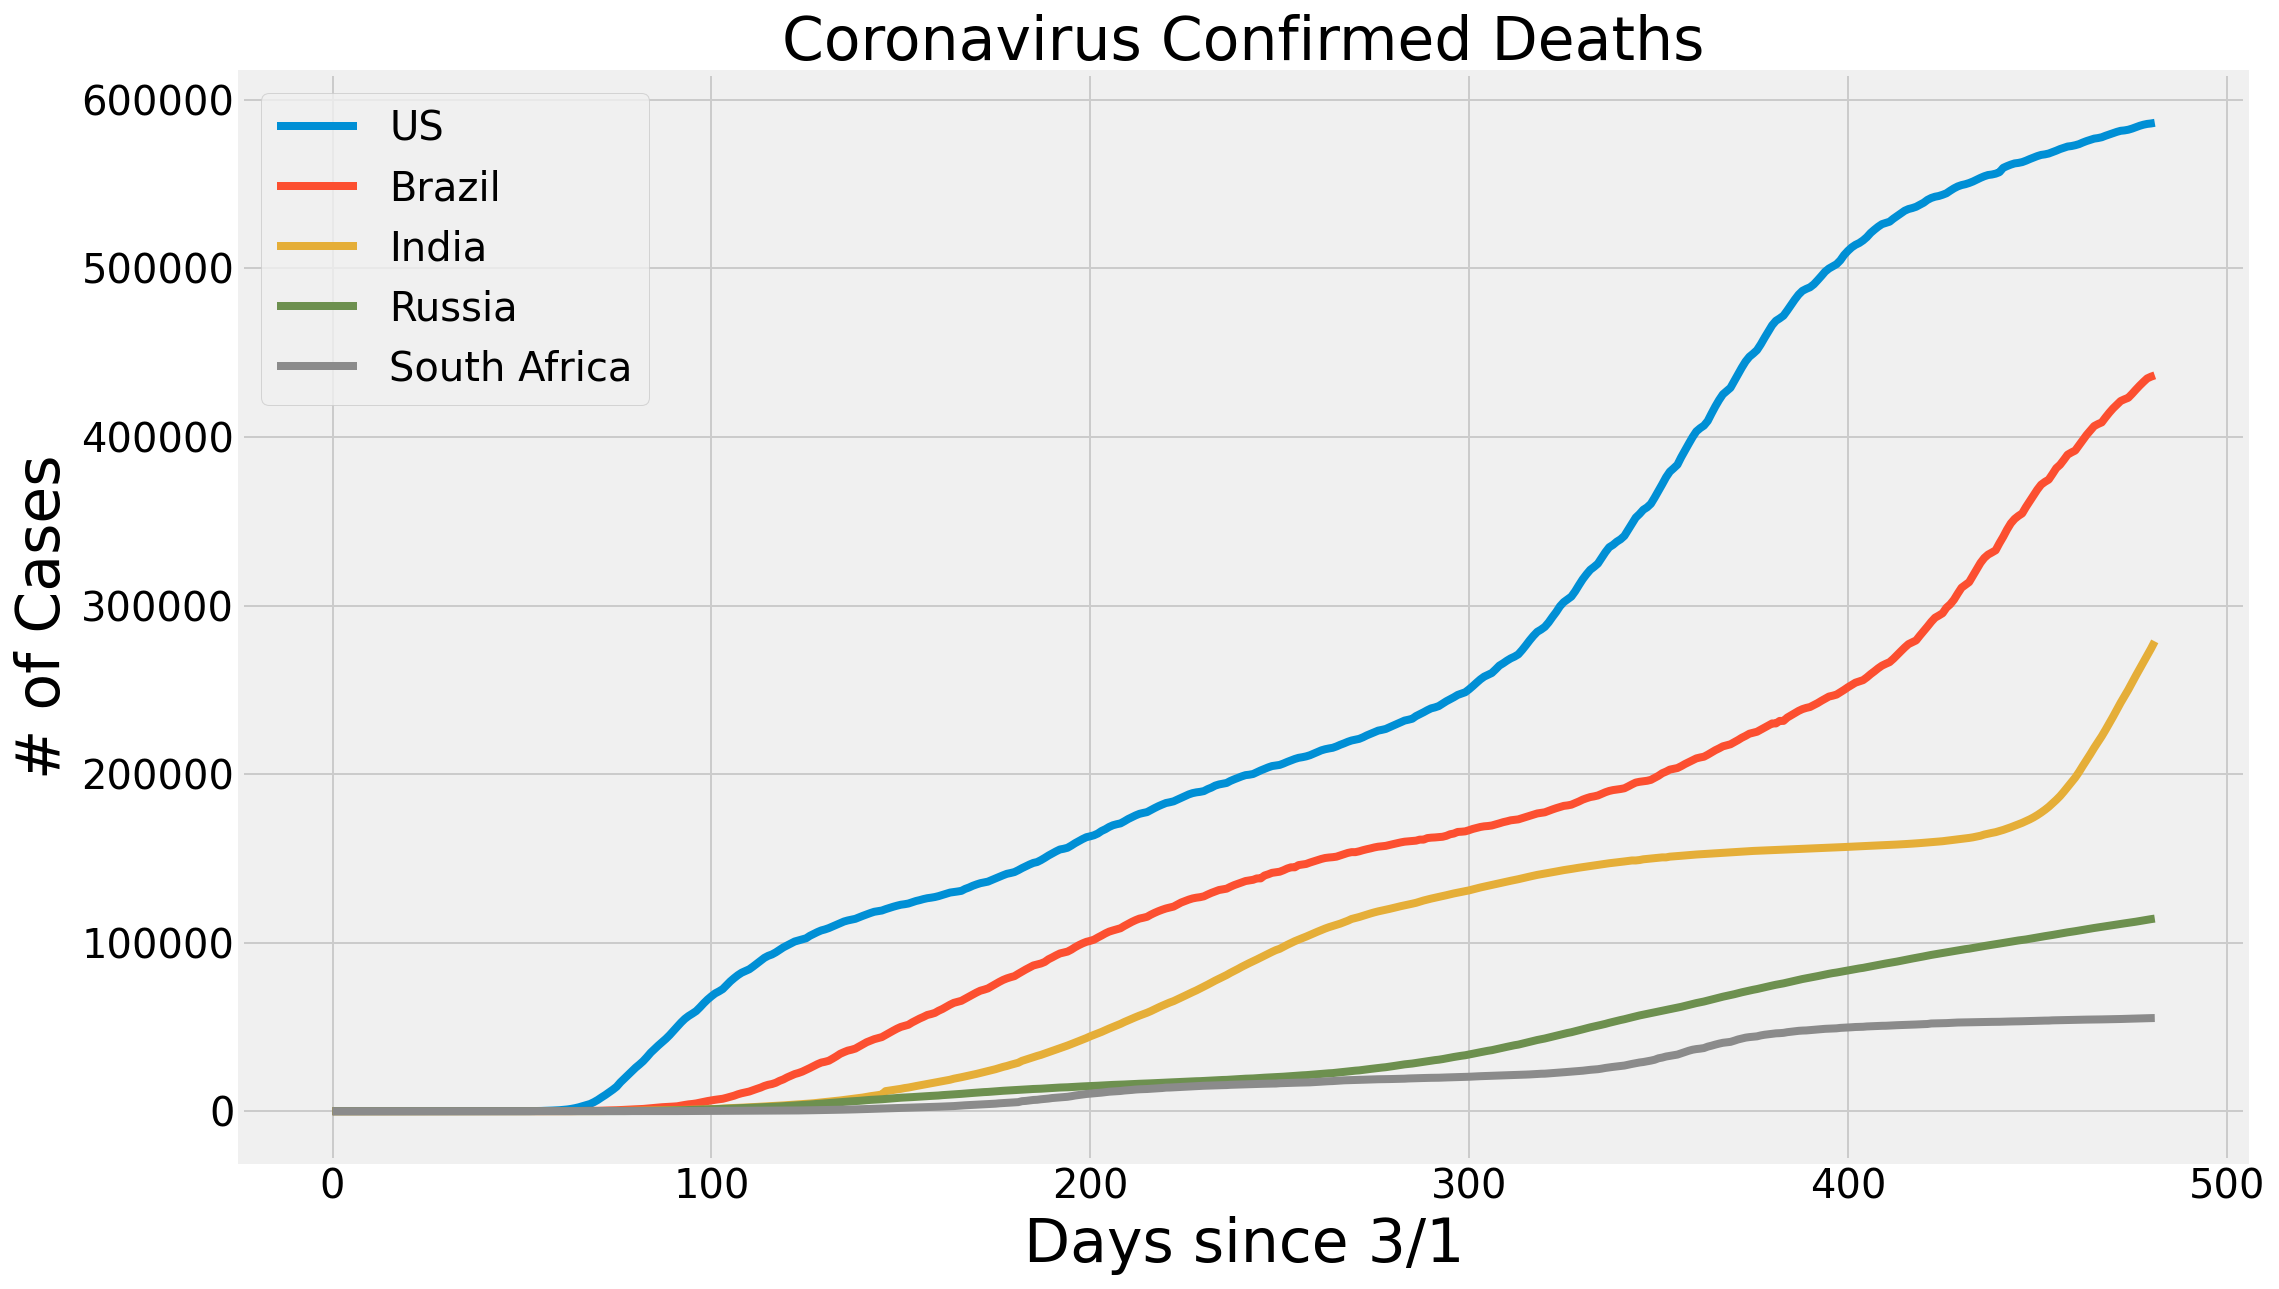

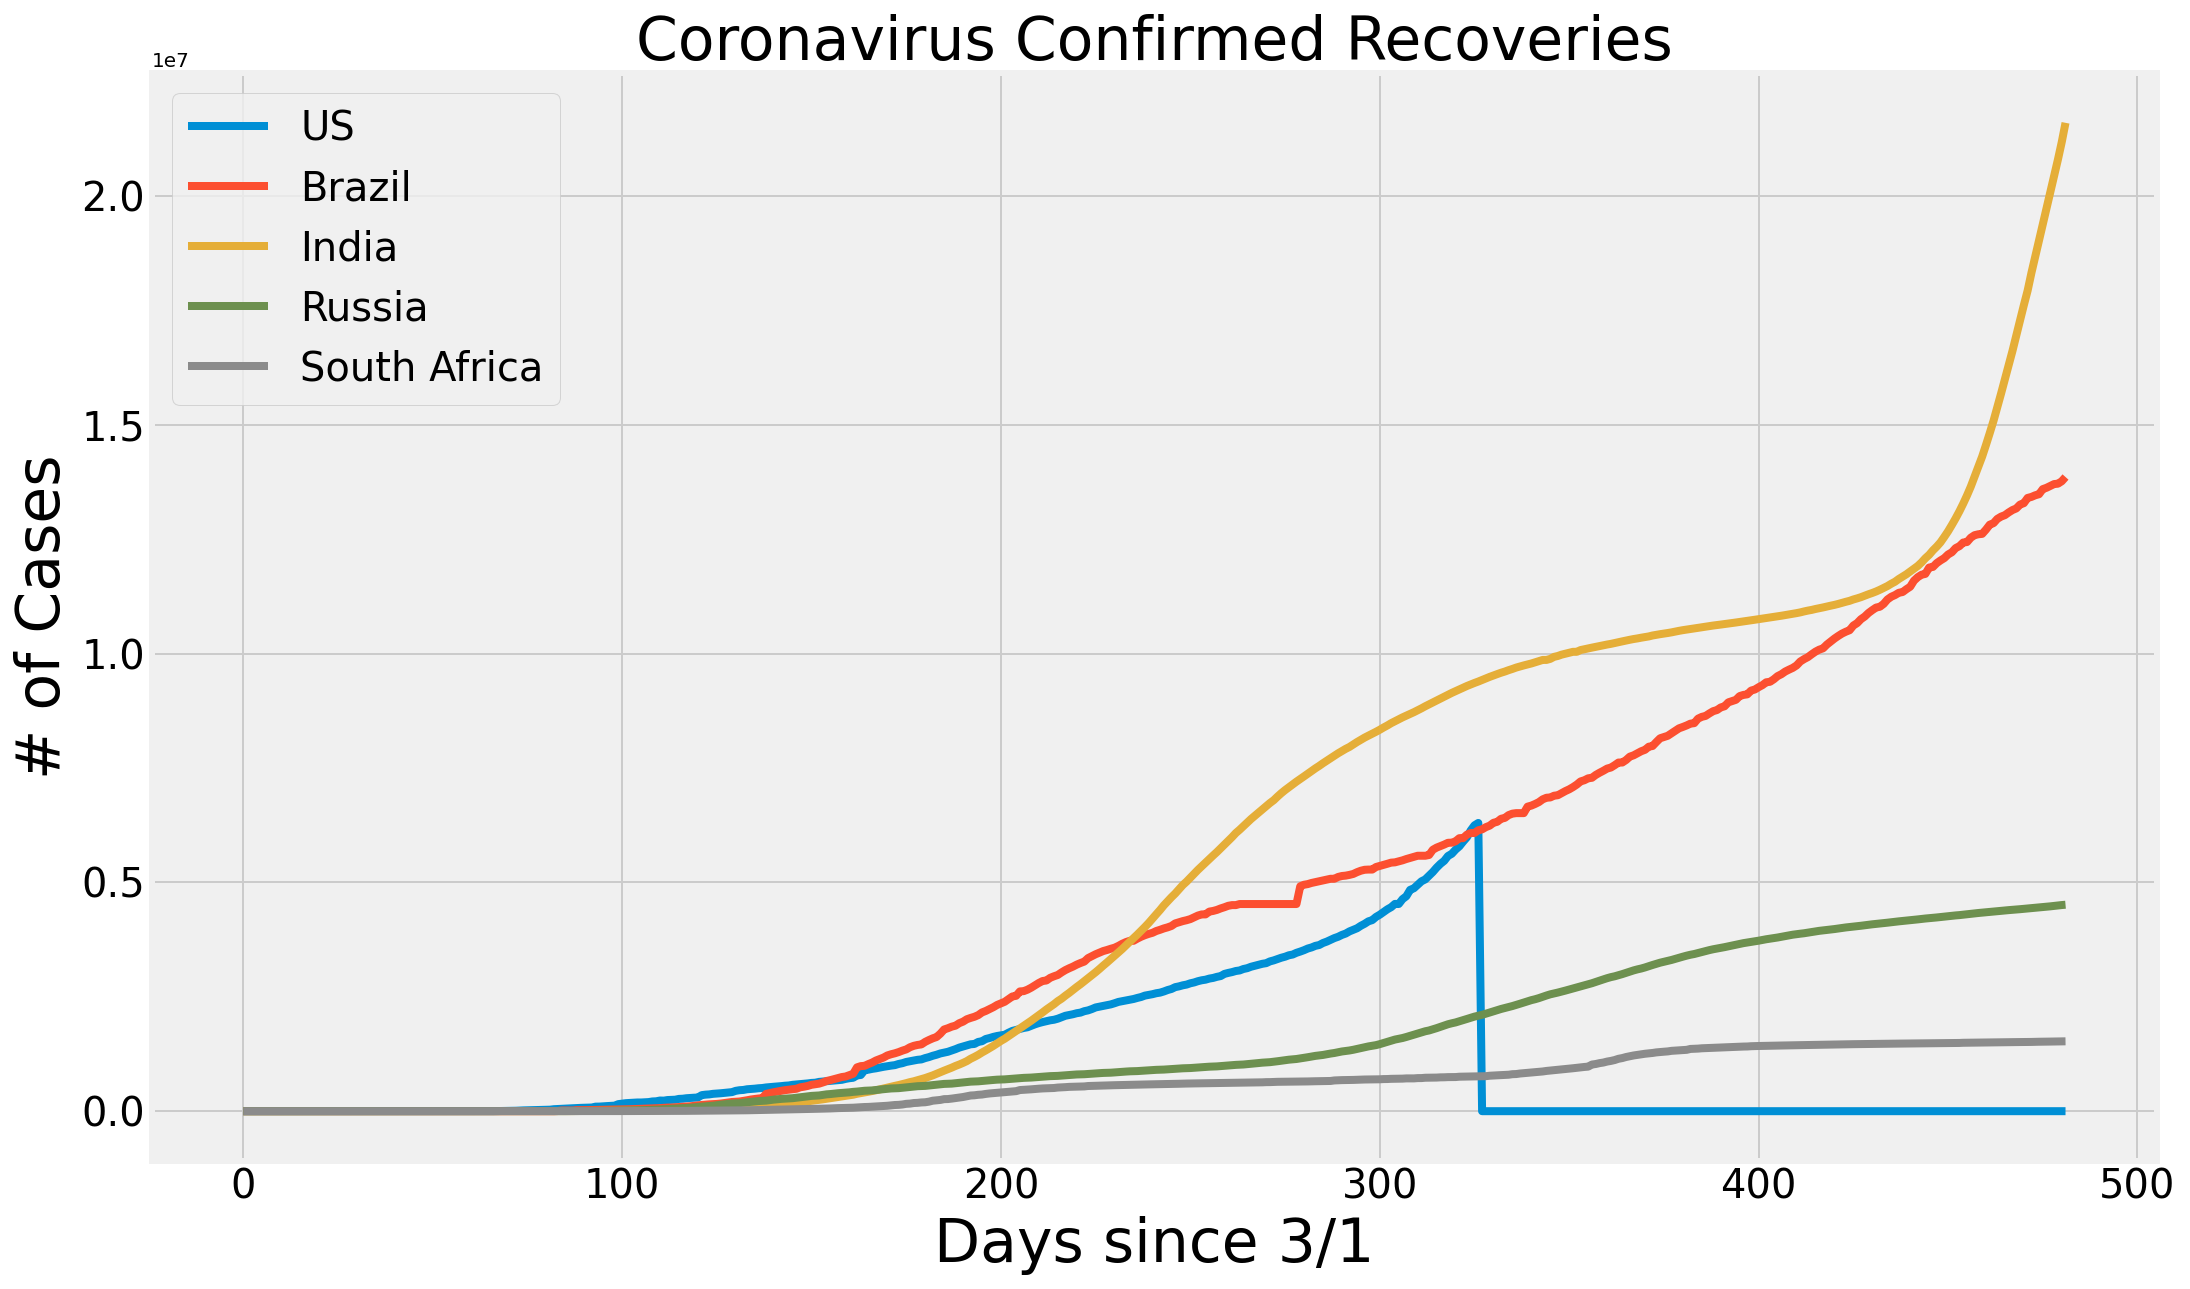

In [80]:
# Country Comparison
# removed redundant code

compare_countries = ['US', 'Brazil', 'India', 'Russia', 'South Africa'] 
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths', 'Coronavirus Confirmed Recoveries']

for num in range(3):
    plt.figure(figsize=(16, 10))
    for country in compare_countries:
        plt.plot(get_country_info(country)[num])
    plt.legend(compare_countries, prop={'size': 20})
    plt.xlabel('Days since 3/1', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.title(graph_name[num], size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [81]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

# Predictions for confirmed coronavirus cases worldwide
These three models predict future covid cases on a global level. 

The prediction models include 
* Support Vector Machine 
* Polynomial Regression 
* Bayesian Ridge Regression 

<a id='prediction'></a>

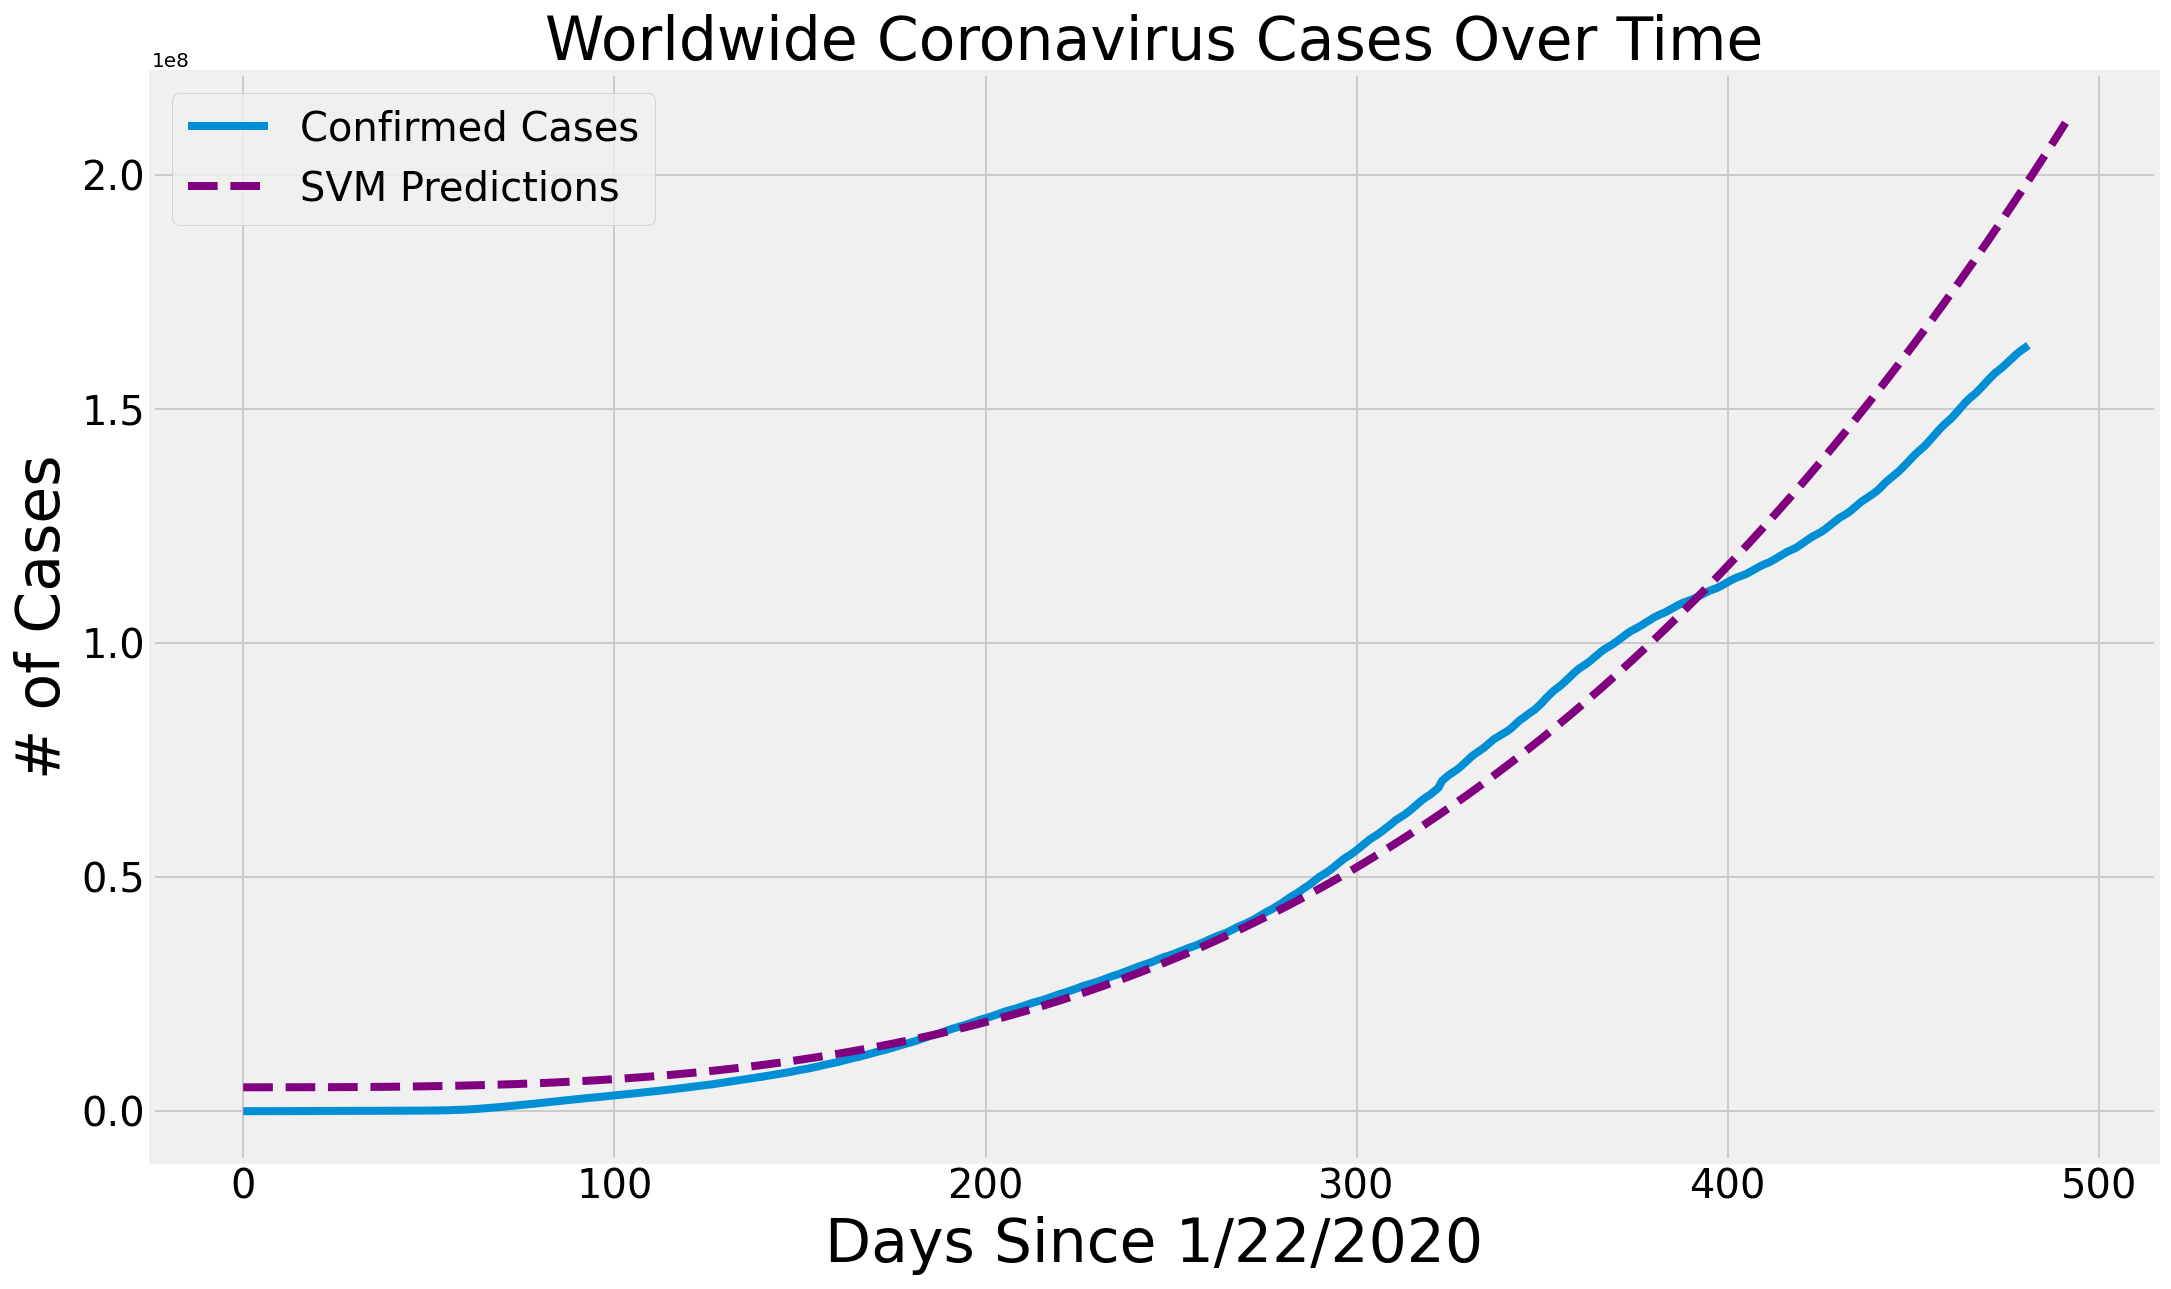

In [82]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

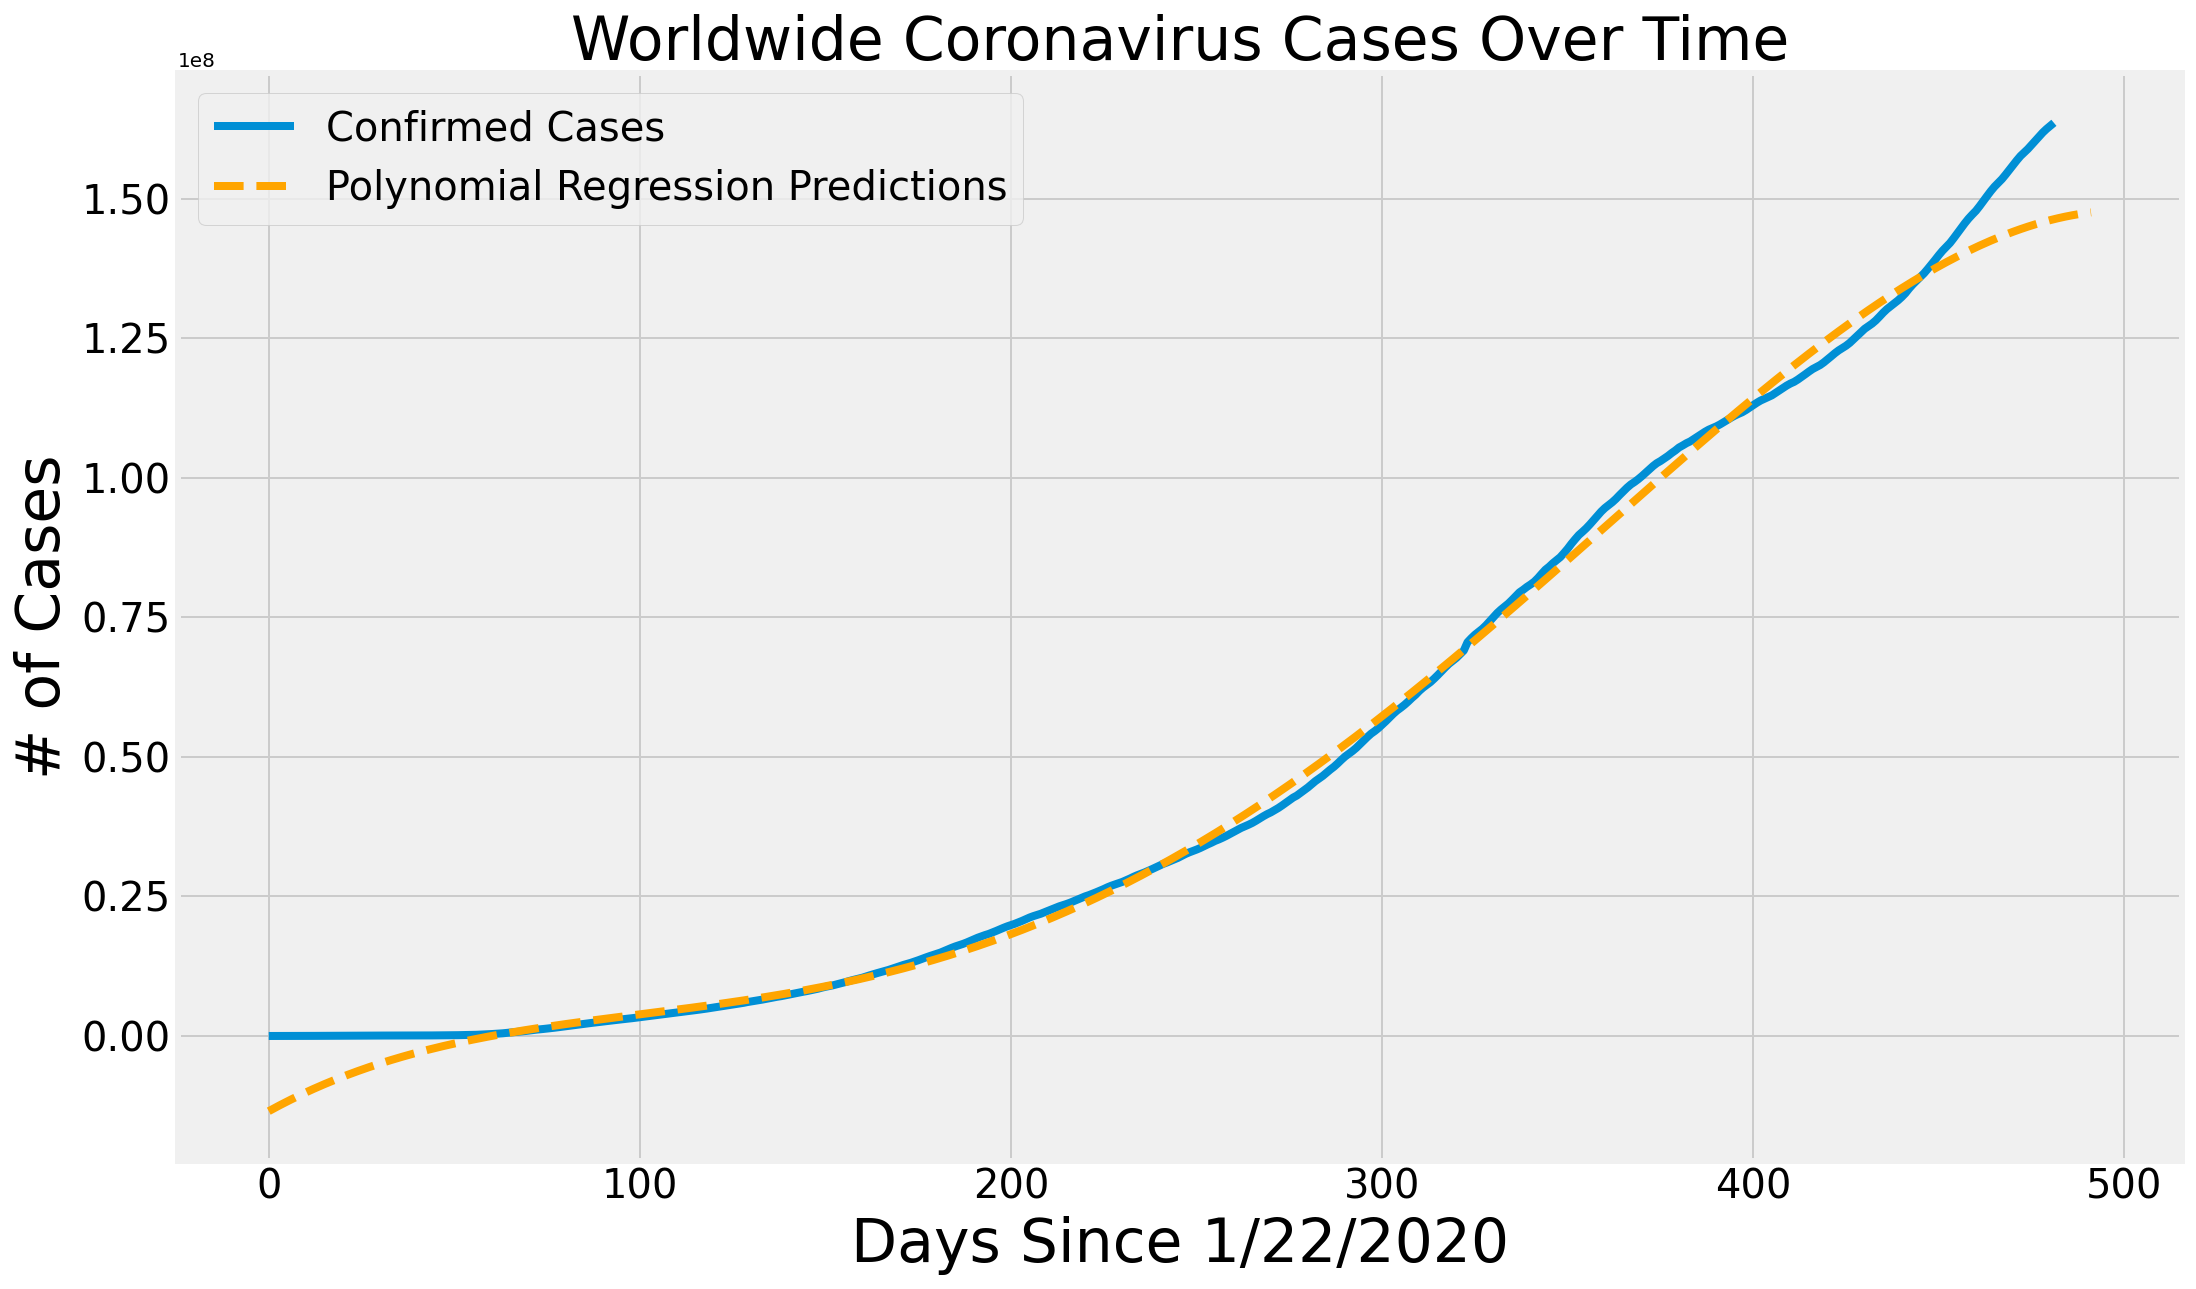

In [83]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

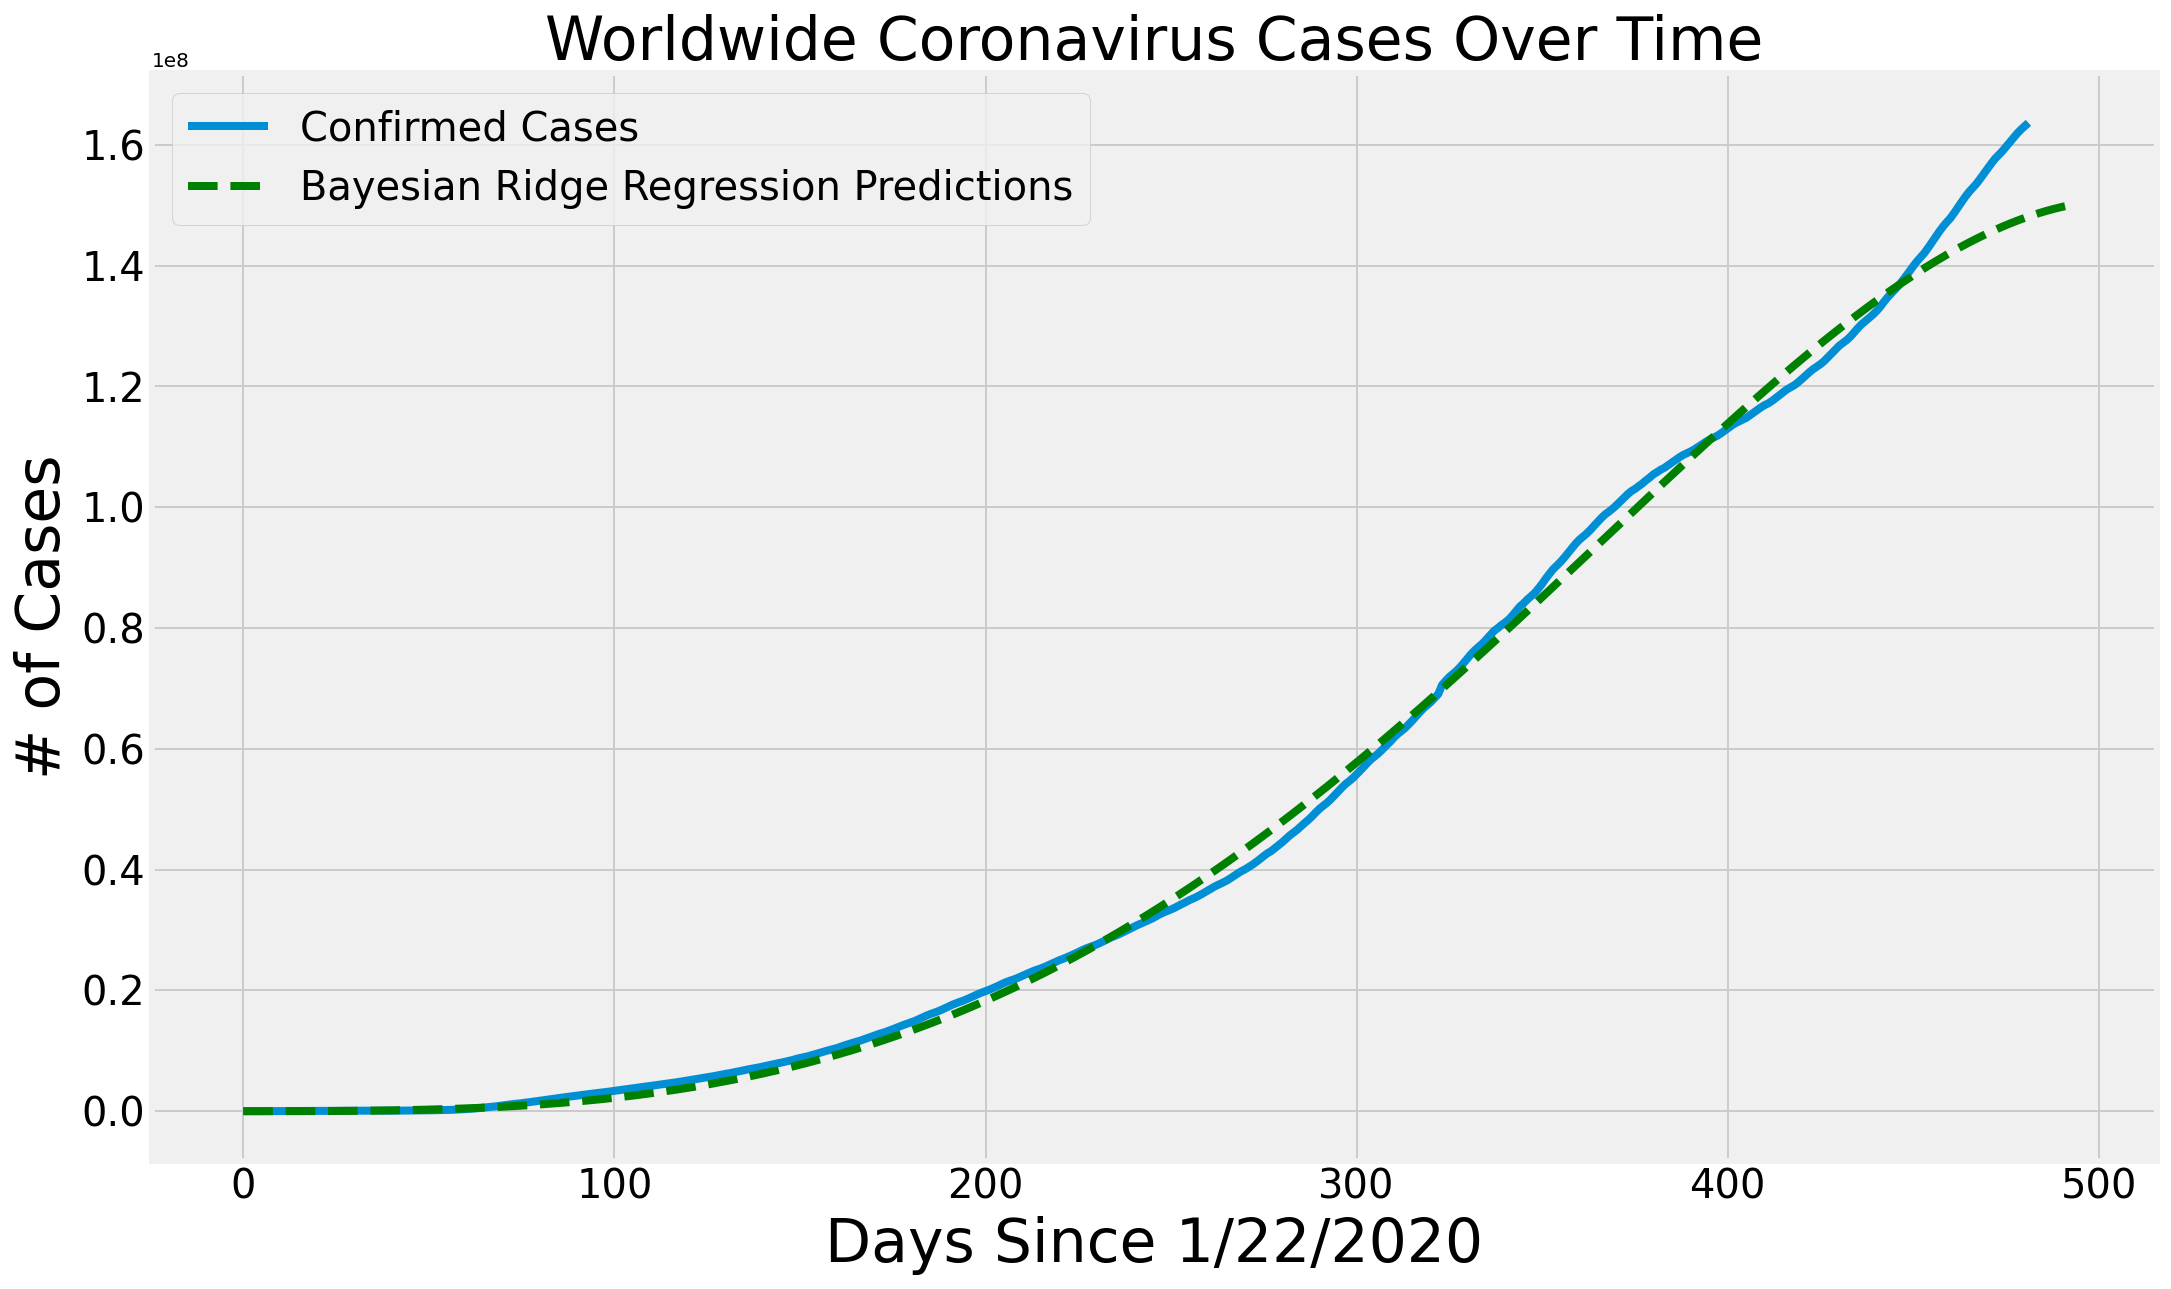

In [84]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

In [85]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-30:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-30:])})
svm_df.style.background_gradient(cmap='Reds')

In [86]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-30:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-30:])})
linear_df.style.background_gradient(cmap='Reds')

In [87]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-30:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-30:])})
bayesian_df.style.background_gradient(cmap='Reds')

Mortality Rate (worldwide) **susceptible to change **

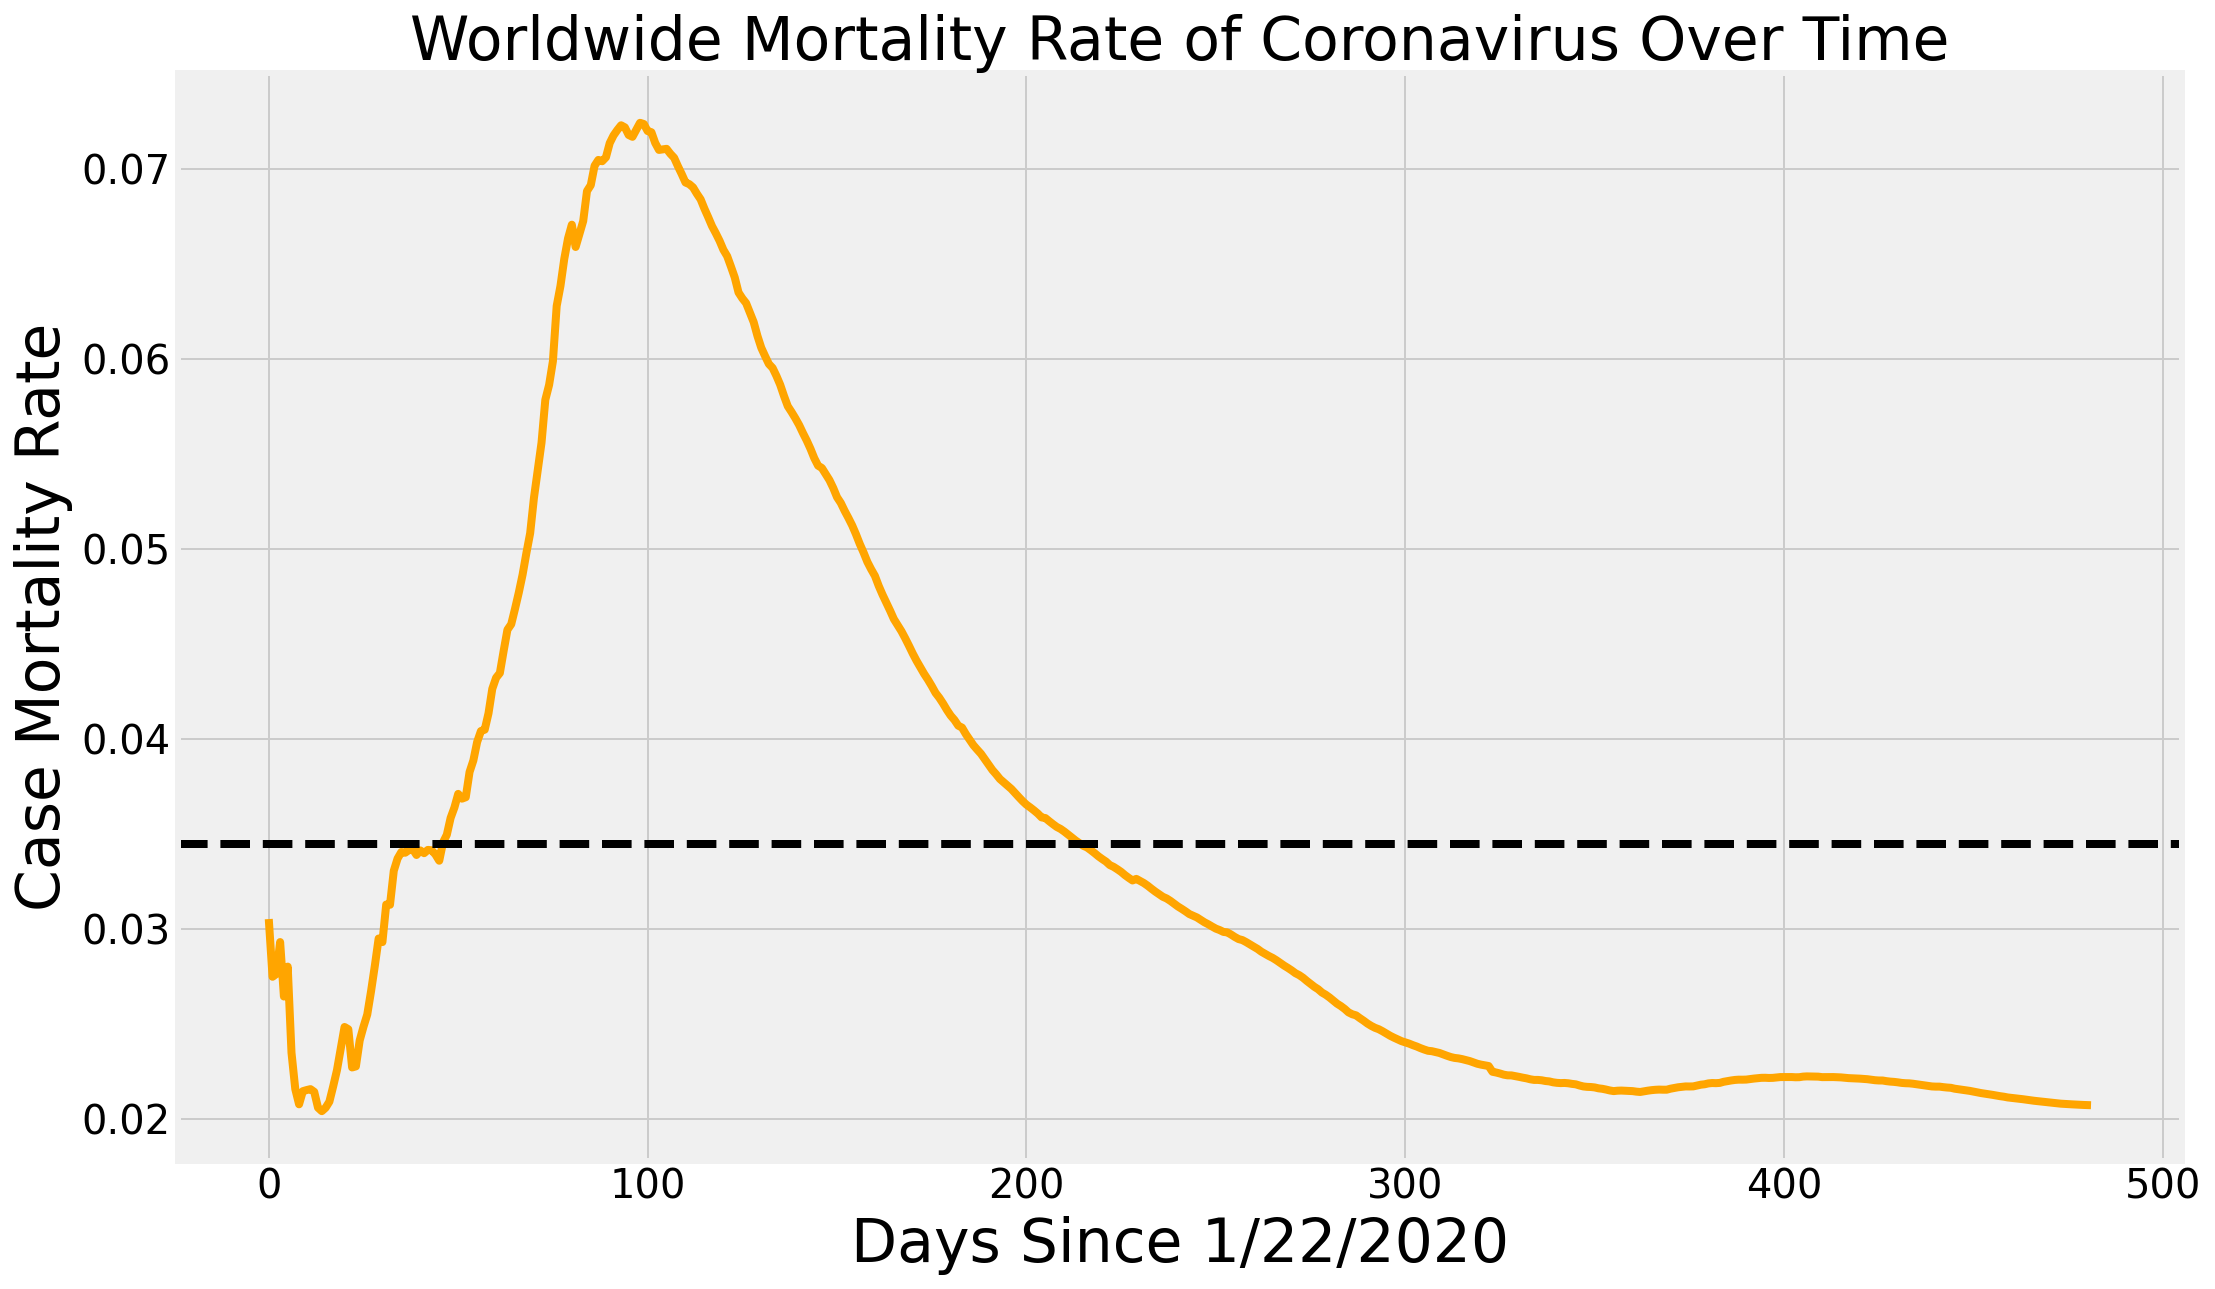

In [88]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Worldwide Mortality Rate of Coronavirus Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Recovery Rate (worldwide) **suceptible to change **

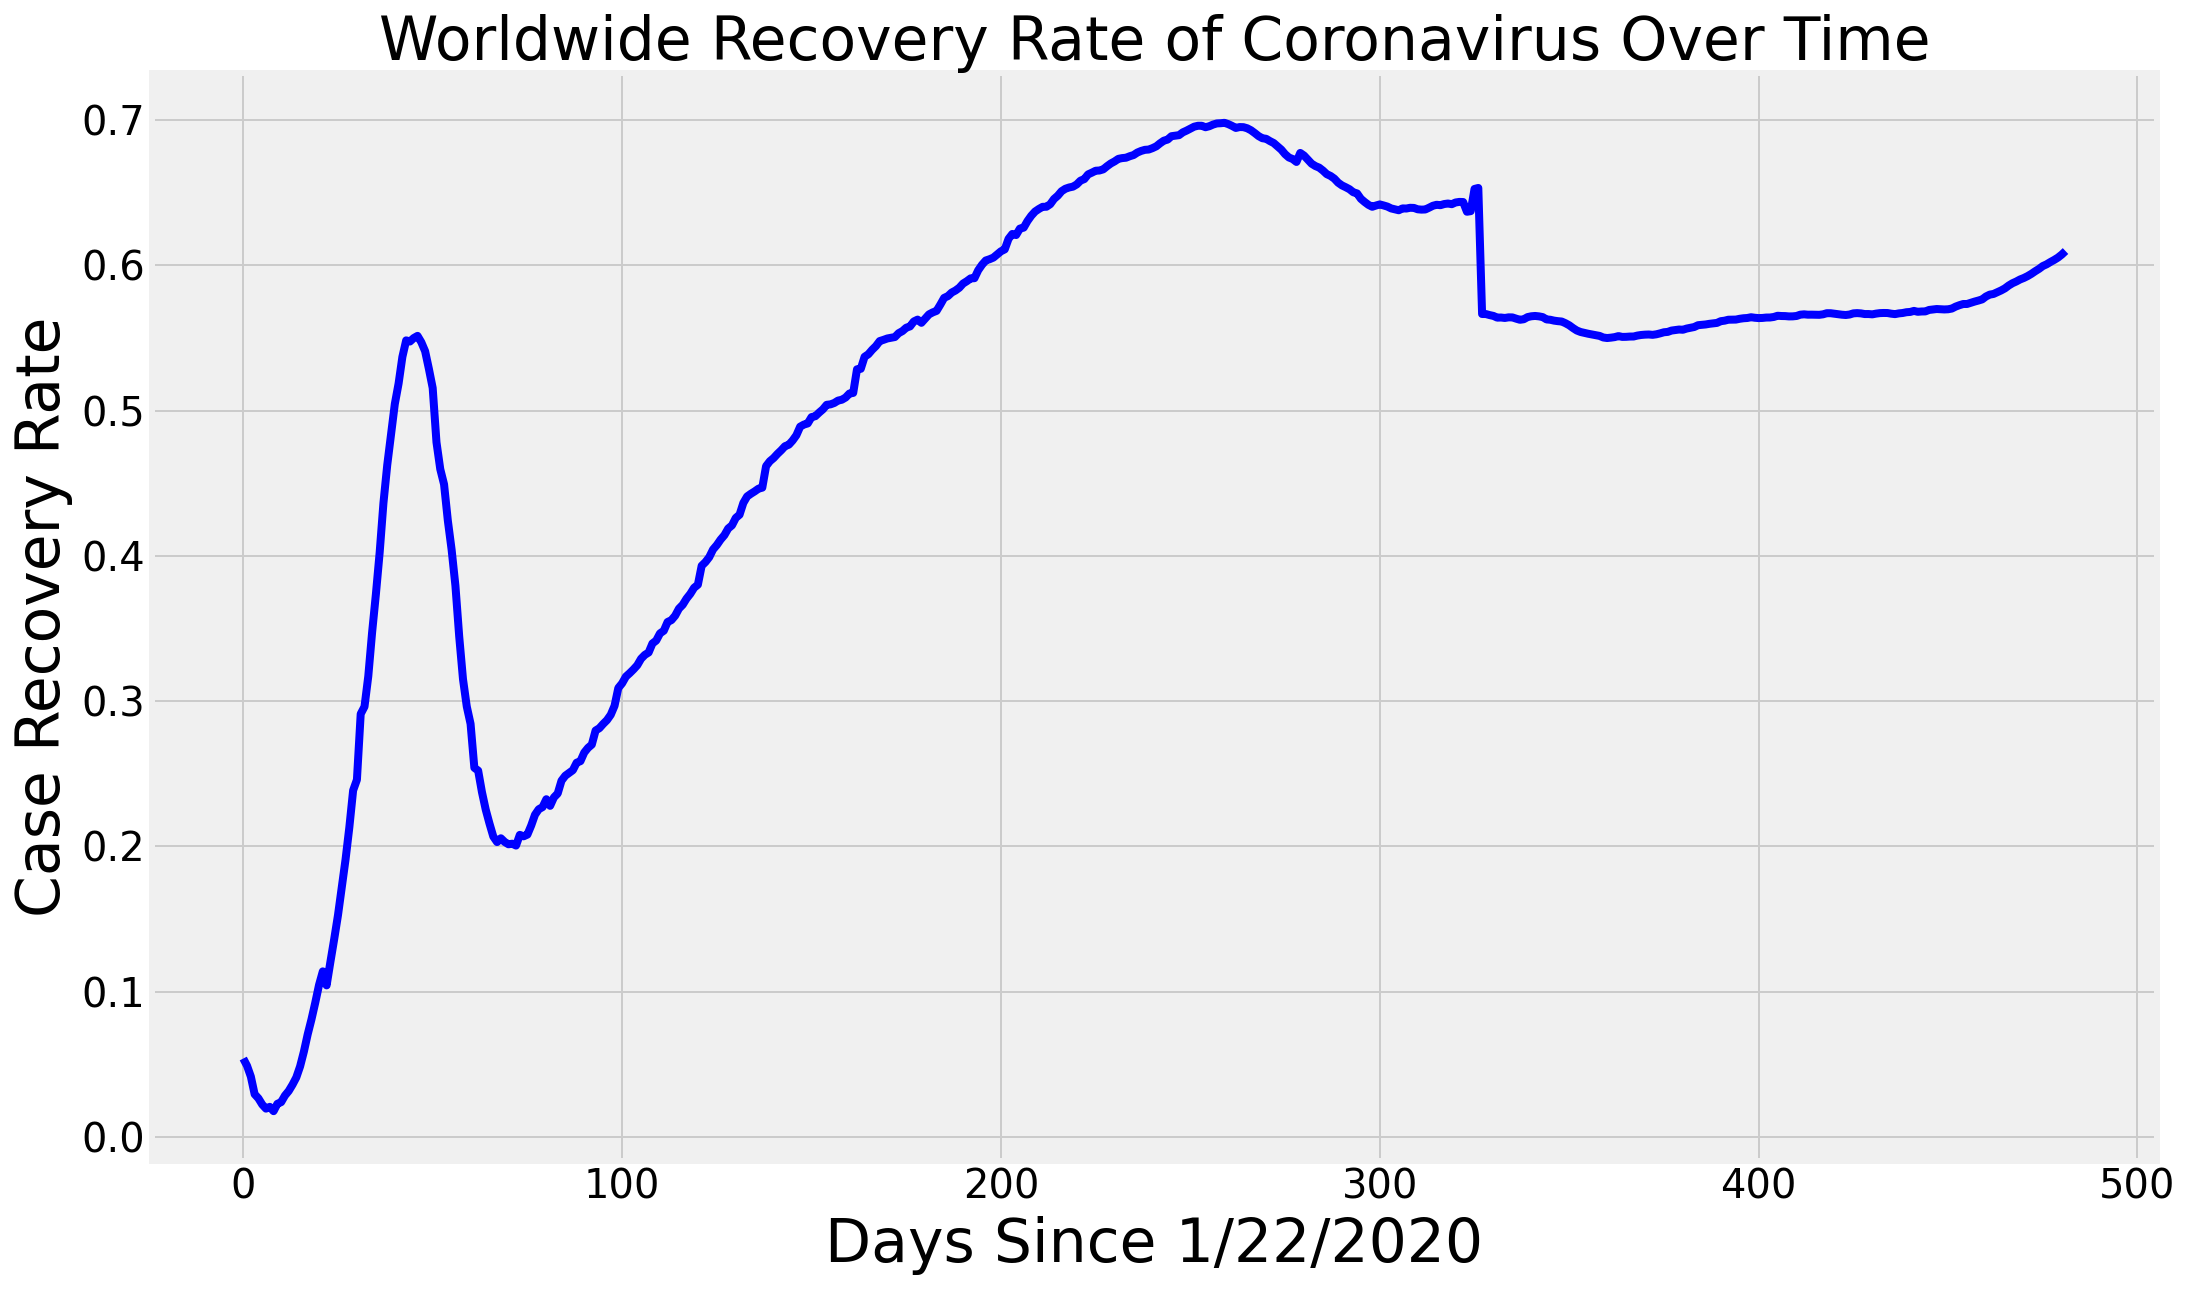

In [89]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.title('Worldwide Recovery Rate of Coronavirus Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Graphing deaths against recoveries

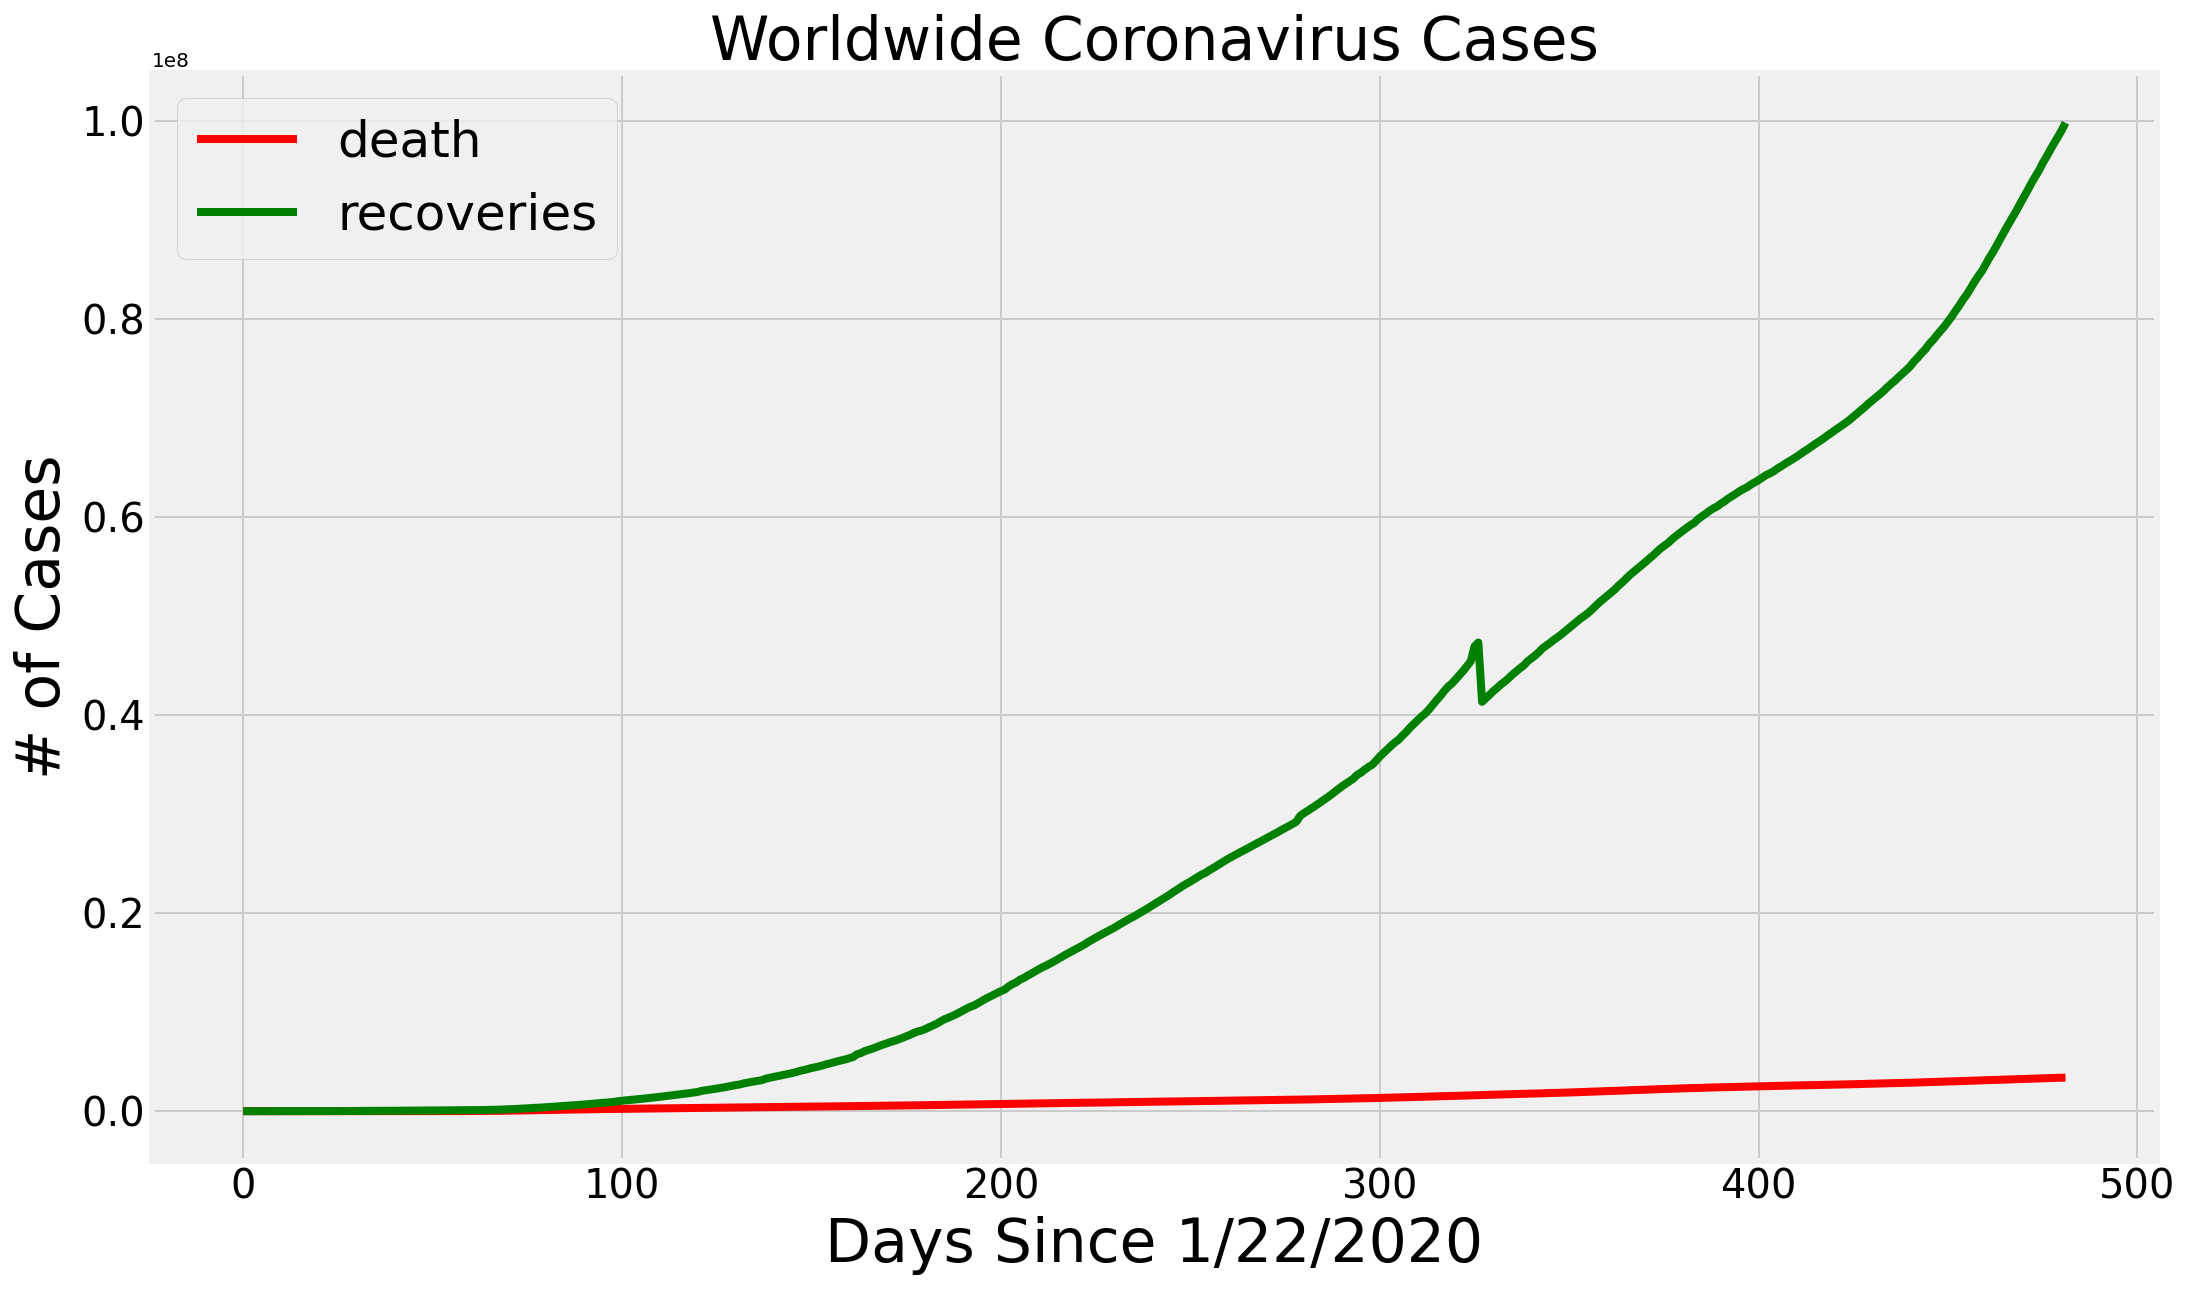

In [78]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=25)
plt.title('Worldwide Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()